# Predict CTR of an Email Campaign
#### To Predict The Click Through Rate (CTR) of an email campaign.

## Problem Statement Understanding

Most organizations today rely on email campaigns for effective communication with users. Email communication is one of the popular ways to pitch products to users and build trustworthy relationships with them.


Email campaigns contain different types of CTA (Call To Action). The ultimate goal of email campaigns is to maximize the Click Through Rate (CTR).


CTR is a measure of success for email campaigns. The higher the click rate, the better your email marketing campaign is. CTR is calculated by the no. of users who clicked on at least one of the CTA divided by the total no. of users the email was delivered to.


CTR =   No. of users who clicked on at least one of the CTA / No. of emails delivered


CTR depends on multiple factors like design, content, personalization, etc. 


    * How do you design the email content effectively?
    * What should your subject line look like?
    * What should be the length of the email?
    * Do you need images in your email template?

As a part of the Data Science team, in this hackathon, you will build a smart system to predict the CTR for email campaigns and therefore identify the critical factors that will help the marketing team to maximize the CTR.

## Business Objective

**Your task at hand is to build a machine learning-based approach to predict the CTR of an email campaign.**

## About Dataset

You are provided with the information of past email campaigns containing the email attributes like subject and body length, no. of CTA, date and time of an email, type of the audience, whether its a personalized email or not, etc and the target variable indicating the CTR of the email campaign.

You are provided with 3 files - train.csv, test.csv and sample_submission.csv

**Train and Test Set**

Train and Test set contains different sets of email campaigns containing information about the email campaign. Train set includes the target variable click_rate and you need to predict the click_rate of an email campaign in the test set.

**Evaluation metric**

The evaluation metric for this hackathon would be r2_score.

**Submission File Format**

|        |          |
| :--- | :--- |
|campaign_id|Unique Identifier of a campaign id|
|click_rate (Target Variable)|Click rate of an email campaign|


## Variable Description

|        |          |
| :--- | :--- |
|campaign_id|Unique identifier of a campaign|
|sender|Sender of an e-mail|
|subject_len|No. of characters in a subject|
|body_len|No. of characters in an email body|
|mean_paragraph_len|Average no. of characters in paragraph of an email|
|day_of_week|Day on which email is sent|
|is_weekend|Boolean flag indicating if an email is sent on weekend or not|
|times_of_day|Times of day when email is sent: Morning, Noon, Evening|
|category|Category of the product an email is related to|
|product|Type of the product an email is related to|
|no_of_CTA|No. of Call To Actions in an email|
|mean_CTA_len|Average no. of characters in a CTA |
|is_image|No. of images in an email|
|is_personalised|Boolean flag indicating if an email is personalized to the user or not|
|is_quote|No. of quotes in an email|
|is_timer|Boolean flag indicating if an email contains a timer or not|
|is_emoticons|No. of emoticons in an email|
|is_discount|Boolean flag indicating if an email contains a discount or not|
|is_price|Boolean flag indicating if an email contains price or not|
|is_urgency|Boolean flag indicating if an email contains urgency or not|
|target_audience|Cluster label of the target audience|
|click_rate (Target Variable)|Click rate of an email campaign|

---
---
***

# Data Understanding

## Import Libraries

In [137]:
#Handle table-like data and matrices
import numpy as np
import pandas as pd

# Visualisation
import matplotlib as mpl
import matplotlib.pylab as pylab
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly
import plotly.express as px
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
cf.go_offline()
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from statsmodels.graphics.gofplots import qqplot
import plotly.offline as py

# Configure visualisations
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Configure visualisations
%matplotlib inline

#For Information Value & WOE
import os
import gc
import time
import psutil
import numpy as np
import pandas as pd
import random as rn
import seaborn as sns

from tqdm import tqdm
from matplotlib import pyplot as plt
from contextlib import contextmanager

rn.seed(5)
np.random.seed(7)
os.environ['PYTHONHASHSEED'] = '3'

#For Learning Curve
from yellowbrick.model_selection import learning_curve

#For VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For Feature Importance
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from scipy.stats import norm, skew

# Modelling Algorithms
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, RANSACRegressor, Ridge, Lasso, ElasticNetCV, SGDRegressor,LassoCV, RidgeCV  
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn import ensemble
from sklearn.utils import shuffle
import lightgbm as lgb
from lightgbm import LGBMRegressor

#for model Accuracy # Modelling Helpers
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold # for repeated K-fold cross validation
from sklearn.model_selection import cross_val_score # score evaluation
from sklearn.model_selection import cross_val_predict # prediction
from sklearn.metrics import mean_squared_error
SEED = 42

# Load Data

In [138]:
df_train= pd.read_csv('train_data.csv')
df_train

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,1884,3,88,1451,75,2,0,Noon,2,11,...,0,0,1,0,0,0,0,0,10,0.350746
1884,1885,3,58,10537,40,2,0,Evening,2,11,...,0,0,0,0,0,0,0,0,11,0.004728
1885,1886,3,89,11050,26,1,0,Evening,15,9,...,0,0,0,0,0,0,0,0,6,0.008289
1886,1887,3,58,10537,40,1,0,Evening,2,11,...,0,0,0,0,0,0,0,0,16,0.012014


In [139]:
df_test= pd.read_csv('test_dat.csv')
df_test

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,Noon,6,26,...,37,1,0,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,Morning,2,11,...,22,0,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
3,1892,3,88,1473,78,3,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
4,1893,3,78,9020,29,3,0,Noon,6,26,...,40,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,2646,3,72,9081,46,0,0,Evening,15,9,...,28,0,0,0,0,0,0,0,0,7
758,2647,3,58,10537,40,3,0,Evening,2,11,...,27,0,0,0,0,0,0,0,0,16
759,2648,3,100,9132,19,2,0,Evening,15,9,...,23,0,0,0,0,0,0,0,0,15
760,2649,3,88,1451,75,1,0,Noon,2,11,...,22,0,0,1,0,0,0,0,0,10


# Data Acquisition & Description (Statistical summaries and visualisations)

In [140]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_timer            1888 non-null   int64  
 16  is_emo

#### Inference:
- We are given with 22 columns.
- We are said that some of the categorical variable are in boolean but here they are given in int dtypes. But it's Ok.
- We will convert times_of_day to label.
- We have 21 numerical features and 1 categorical features. Since we have a lot of categorical features and a regression problem, we have to pay attention to multicolinearities after the categorical encoding.
- Somes of these numerical features are actually categorical (is_weekend,is_personalised,is_timer,is_discount,is_price,is_urgency and times_of_day).

In [141]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
campaign_id,1888.0,944.500000,545.162973,1.0,472.750000,944.500000,1416.250000,1888.000000
sender,1888.0,4.395657,3.277927,0.0,3.000000,3.000000,3.000000,15.000000
subject_len,1888.0,86.246292,30.143206,9.0,69.000000,83.000000,98.000000,265.000000
body_len,1888.0,14185.780191,7327.615307,23.0,9554.500000,12689.000000,17351.500000,44491.000000
mean_paragraph_len,1888.0,35.239407,28.139498,4.0,21.000000,29.000000,40.000000,286.000000
day_of_week,1888.0,2.828390,1.763193,0.0,1.000000,3.000000,4.000000,6.000000
is_weekend,1888.0,0.199682,0.399867,0.0,0.000000,0.000000,0.000000,1.000000
category,1888.0,9.949682,5.300719,0.0,6.000000,10.000000,15.000000,15.000000
product,1888.0,17.525424,12.369526,0.0,9.000000,12.000000,27.250000,43.000000
no_of_CTA,1888.0,4.222458,4.628348,0.0,2.000000,3.000000,5.000000,49.000000


In [142]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
campaign_id,762.0,2269.500000,220.114743,1889.0,2079.25,2269.5,2459.75,2650.0
sender,762.0,4.249344,3.131927,1.0,3.00,3.0,3.00,15.0
subject_len,762.0,86.509186,30.586394,11.0,68.00,83.0,98.00,265.0
body_len,762.0,14184.263780,7179.056026,23.0,9697.25,12740.5,16746.00,44491.0
mean_paragraph_len,762.0,33.185039,26.889537,4.0,20.00,27.5,39.00,498.0
day_of_week,762.0,2.850394,1.791697,0.0,1.00,3.0,4.00,6.0
is_weekend,762.0,0.209974,0.407557,0.0,0.00,0.0,0.00,1.0
category,762.0,9.590551,5.314579,0.0,6.00,10.0,15.00,15.0
product,762.0,17.872703,11.786908,0.0,9.00,13.0,26.00,44.0
no_of_CTA,762.0,4.212598,3.911229,0.0,2.00,3.0,5.00,42.0


#### Inference:
- We are seeing a lot of features average are very less and body_len feature average is very high. We need to lower down these number so it will help in model prepration.
- std of body_len and is_price is quite large this shows there must be outliers.
- Most of the variables minimum are near to zero. We have to be very careful for multicollinearity.
- We will drop of the is_timer column as there are no data means there are no resemblance with other features.

In [143]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(df_train.shape))
print("The test data size before dropping Id feature is : {} ".format(df_test.shape))

#Save the 'Id' column
train_ID = df_train['campaign_id']
test_ID = df_test['campaign_id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
df_train.drop("campaign_id", axis = 1, inplace = True)
df_test.drop("campaign_id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(df_train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(df_test.shape))

The train data size before dropping Id feature is : (1888, 22) 
The test data size before dropping Id feature is : (762, 21) 

The train data size after dropping Id feature is : (1888, 21) 
The test data size after dropping Id feature is : (762, 20) 


#### Inference:
- We dont need campaign_id feature so we drop it. And we will use it at the time of submission.
- After dropping we are left with 21 features in training dataset and 20 features in testing dataset.

In [144]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(df_train.shape))
print("The test data size before dropping Id feature is : {} ".format(df_test.shape))

#Now drop the  'is_timer' colum since it's unnecessary for  the prediction process.
df_train.drop("is_timer", axis = 1, inplace = True)
df_test.drop("is_timer", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping is_timer feature is : {} ".format(df_train.shape)) 
print("The test data size after dropping is_timer feature is : {} ".format(df_test.shape))

The train data size before dropping Id feature is : (1888, 21) 
The test data size before dropping Id feature is : (762, 20) 

The train data size after dropping is_timer feature is : (1888, 20) 
The test data size after dropping is_timer feature is : (762, 19) 


#### Inference:
- We have drop of the is_timer column as it is irrelevant.
- After dropping we are left with 20 feature under train and 19 feature under test.

In [145]:
#Encode categorical variables
df_train['times_of_day_ID'] = df_train['times_of_day'].factorize()[0]
df_test['times_of_day_ID'] = df_test['times_of_day'].factorize()[0]

In [146]:
# Create a new pandas dataframe "category", which only has unique Categories, also sorting this list in order of CategoryId values
category1 = df_train[['times_of_day', 'times_of_day_ID']].drop_duplicates().sort_values('times_of_day_ID')
category2 = df_test[['times_of_day', 'times_of_day_ID']].drop_duplicates().sort_values('times_of_day_ID')

print('train data \n',category1)
print('test data \n', category2)

train data 
   times_of_day  times_of_day_ID
0         Noon                0
1      Morning                1
3      Evening                2
test data 
   times_of_day  times_of_day_ID
0         Noon                0
1      Morning                1
2      Evening                2


In [147]:
#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
df_train.drop("times_of_day", axis = 1, inplace = True)
df_test.drop("times_of_day", axis = 1, inplace = True)

#### Inference:
- We have convert the times_of_day to times_of_day_ID to get much more closer look of the variable with the others.

In [148]:
#As we are told is_price is boolean but the dataset consist alot of numbers under so we will convert it to boolean
df_train['is_price_bool']=np.where(df_train['is_price']==0, 0, 1)
df_test['is_price_bool'] =np.where(df_test['is_price']==0, 0, 1)

In [149]:
#Now drop the  'is_price' column.
df_train.drop("is_price", axis = 1, inplace = True)
df_test.drop("is_price", axis = 1, inplace = True)

In [150]:
# Finding the relations between the variables.
df_train.corr().T

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_urgency,target_audience,click_rate,times_of_day_ID,is_price_bool
sender,1.000000,-0.102559,0.197929,0.056891,-0.046928,-0.059499,0.188444,0.070689,0.100454,0.016604,-0.093244,0.147959,0.020928,-0.105279,-0.046900,-0.071096,-0.132554,-0.031398,-0.027433,-0.008099
subject_len,-0.102559,1.000000,0.427326,-0.224770,-0.033574,-0.056666,0.012601,-0.007108,0.400213,0.144261,-0.002214,-0.293446,0.120273,0.080303,0.125134,0.100584,-0.021855,-0.180143,-0.027600,0.038215
body_len,0.197929,0.427326,1.000000,-0.496146,-0.089146,-0.079255,0.026781,-0.027747,0.559353,0.083468,-0.021254,-0.220696,0.184035,-0.043931,0.051123,0.023734,-0.075754,-0.247866,-0.114029,-0.006388
mean_paragraph_len,0.056891,-0.224770,-0.496146,1.000000,0.003221,-0.012964,0.037475,-0.054066,-0.170012,0.064632,-0.091250,0.162480,-0.096086,-0.043173,-0.032096,-0.037435,-0.110896,0.178042,0.036178,0.019783
day_of_week,-0.046928,-0.033574,-0.089146,0.003221,1.000000,0.720599,-0.058760,0.000249,-0.037789,-0.003614,0.019365,-0.069705,-0.032476,-0.013571,-0.037122,0.012735,0.081693,0.086372,-0.163978,-0.013695
is_weekend,-0.059499,-0.056666,-0.079255,-0.012964,0.720599,1.000000,-0.063763,-0.015759,-0.033464,-0.032421,0.036626,-0.065130,-0.033968,-0.007504,-0.033757,-0.009789,0.046638,0.114138,-0.199161,-0.041592
category,0.188444,0.012601,0.026781,0.037475,-0.058760,-0.063763,1.000000,0.007144,-0.023931,0.127554,-0.028794,0.132441,-0.101411,0.100071,0.166200,0.189839,-0.026602,-0.167756,0.193709,0.074520
product,0.070689,-0.007108,-0.027747,-0.054066,0.000249,-0.015759,0.007144,1.000000,0.027486,0.043223,0.027952,0.047566,-0.104653,0.013122,-0.018291,-0.110753,0.058073,0.121602,-0.060394,-0.051707
no_of_CTA,0.100454,0.400213,0.559353,-0.170012,-0.037789,-0.033464,-0.023931,0.027486,1.000000,0.170387,-0.005971,-0.145453,0.092320,-0.037244,0.041797,-0.015649,-0.007979,-0.172637,-0.076592,-0.017846
mean_CTA_len,0.016604,0.144261,0.083468,0.064632,-0.003614,-0.032421,0.127554,0.043223,0.170387,1.000000,-0.021751,-0.123560,0.023271,0.032827,0.029194,0.100071,0.007170,-0.031162,0.001171,0.022694


In [151]:
#Correlation with target variable and others
df_train.corr()['click_rate'].sort_values()

body_len             -0.247866
subject_len          -0.180143
no_of_CTA            -0.172637
category             -0.167756
times_of_day_ID      -0.125569
is_urgency           -0.114284
is_quote             -0.098402
is_emoticons         -0.094305
is_discount          -0.086105
is_price_bool        -0.031621
sender               -0.031398
mean_CTA_len         -0.031162
is_image             -0.021527
is_personalised       0.032922
target_audience       0.038713
day_of_week           0.086372
is_weekend            0.114138
product               0.121602
mean_paragraph_len    0.178042
click_rate            1.000000
Name: click_rate, dtype: float64

#### Inference:
- So,we see there is no high correlation with target variables with others but let us check on other variables.

<AxesSubplot:>

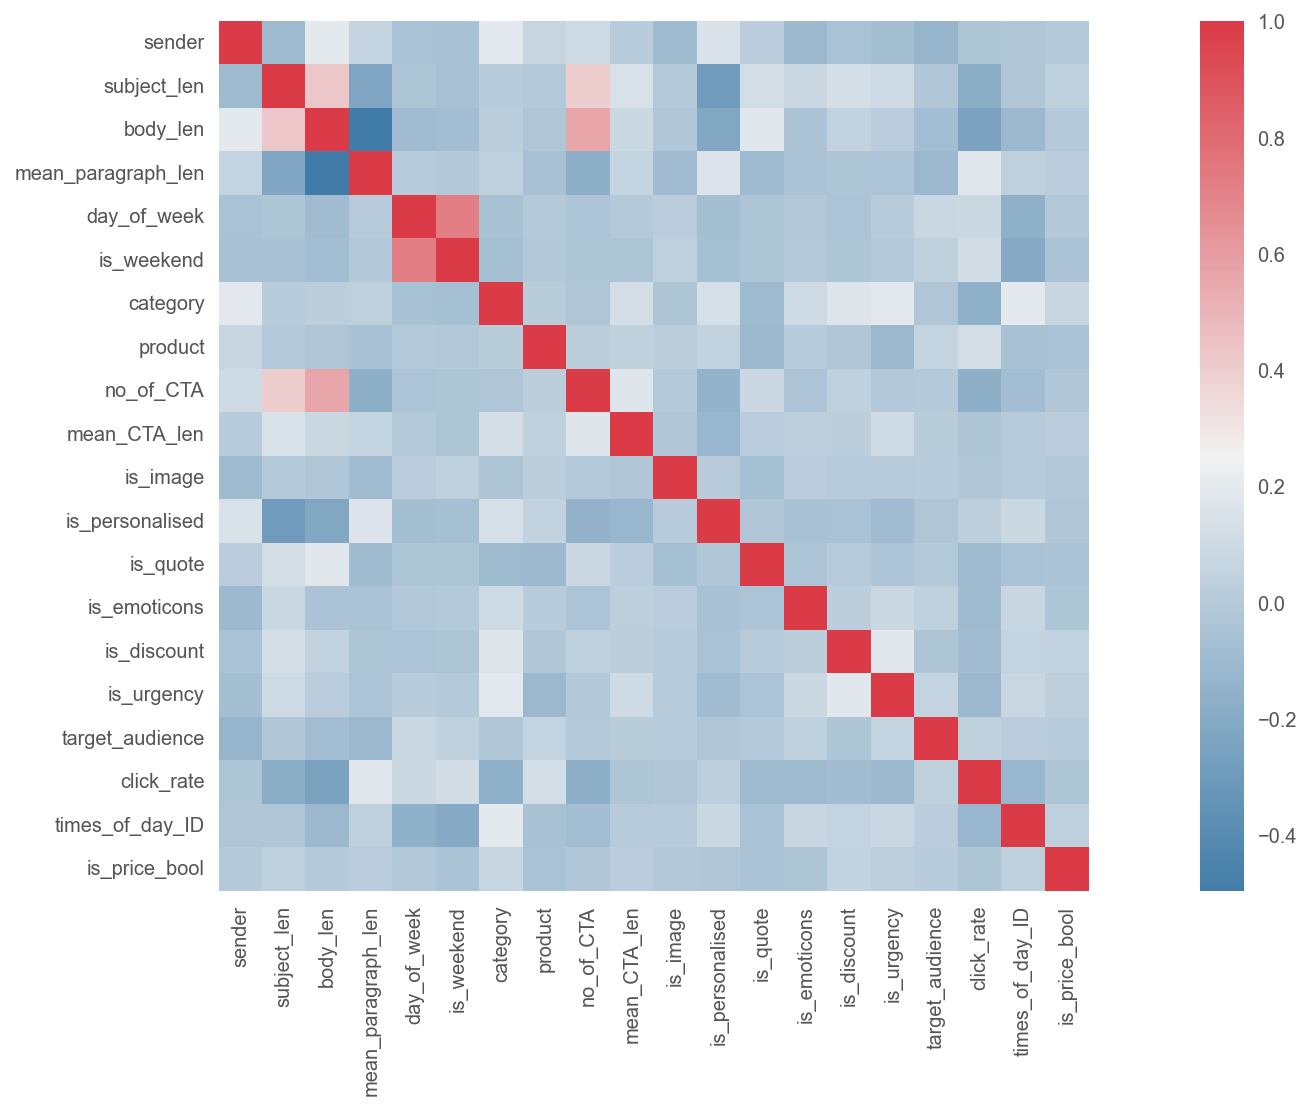

In [152]:
f, ax = plt.subplots(figsize=(20, 8))
corr = df_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

#### Inference:
- Strong correlation is there between no_of_CTA and body_len, subject_len is moderately correlated with body_len and no_of_CTA.
- mean_paragraph_len is highly negative correlated with body_len  

<AxesSubplot:>

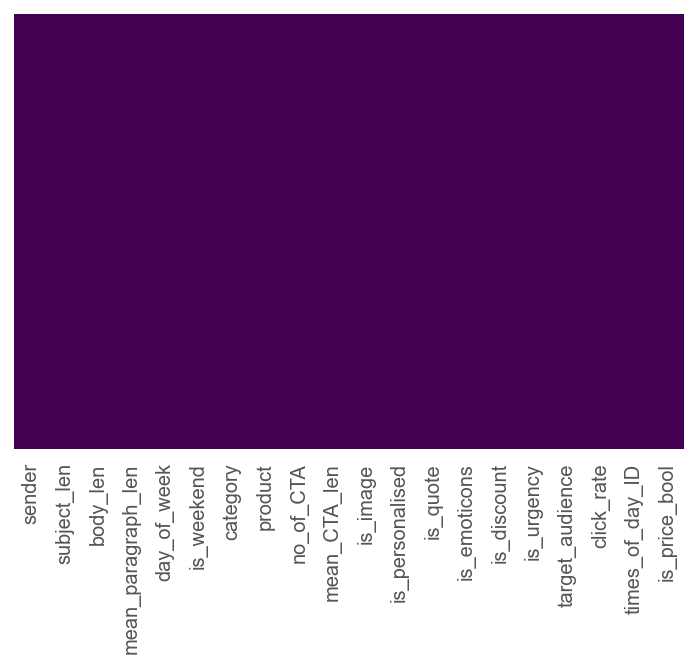

In [153]:
#To check missing value
sns.heatmap(df_train.isnull(),cbar=False,yticklabels=False,cmap='viridis')

<AxesSubplot:>

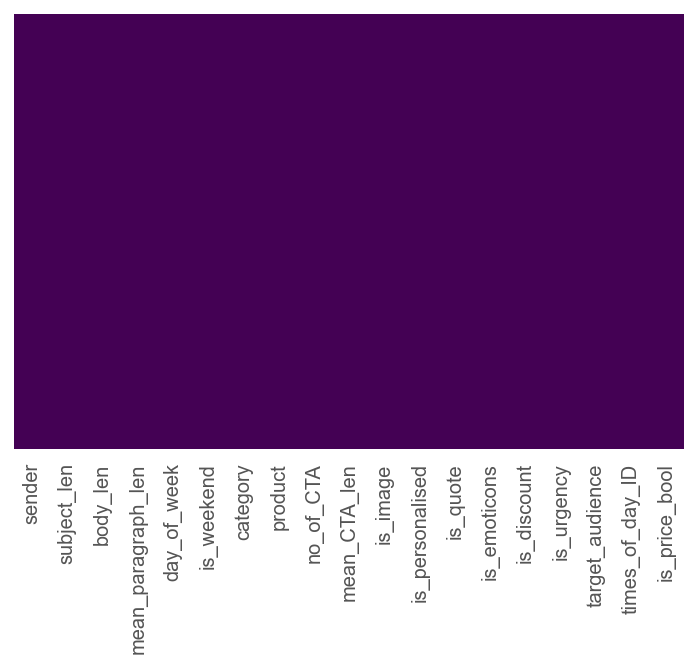

In [154]:
#To check missing value
sns.heatmap(df_test.isnull(),cbar=False,yticklabels=False,cmap='viridis')

#### Inference:
- We have finally check for null values.

# Data Processing

### Feature Checking Outlier

List of data visualization plots to spot the outliers.

1. Box and whisker plot (box plot).
2. Scatter plot.
3. Histogram.
4. Distribution Plot.
5. QQ plot.

We have used Box and Whisker plot Distribution Plot and QQ plot for visualization of outliers

* Outliers badly affect mean and standard deviation of the dataset. These may statistically give erroneous results.
* It increases the error variance and reduces the power of statistical tests.
* If the outliers are non-randomly distributed, they can decrease normality.
* Most machine learning algorithms do not work well in the presence of outlier. So it is desirable to detect and remove outliers.
* They can also impact the basic assumption of Regression, ANOVA and other statistical model assumptions.

With all these reasons we must be careful about outlier and treat them before build a statistical/machine learning model. There are some techniques used to deal with outliers.

1. Deleting observations.
2. Transforming values.
3. Imputation.
4. Separately treating

From these all we will use TRANSFORMING VALUES.

**TRANSFORMING VALUES**

Transforming variables can also eliminate outliers. These transformed values reduces the variation caused by extreme values.
1. Scalling
2. Log transformation
3. Cube Root Normalization
4. Box-Cox transformation

* These techniques convert values in the dataset to smaller values.
* If the data has to many extreme values or skewed, this method helps to make your data normal.
* But These technique not always give you the best results.
* There is no lose of data from these methods.
* In all these method boxcox transformation gives the best result.

We will use Box-Cox transformation as we cannot delete outliers as dataset is small and removing outliers may affect badly our models if ever there were also outliers in the test data.  

In [155]:
def dist_box(x):
    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.title(x)
    sns.distplot(df_train[x])

    plt.subplot(1,2,2)
    plt.title(x)
    sns.boxplot(y=df_train[x])

    plt.show()

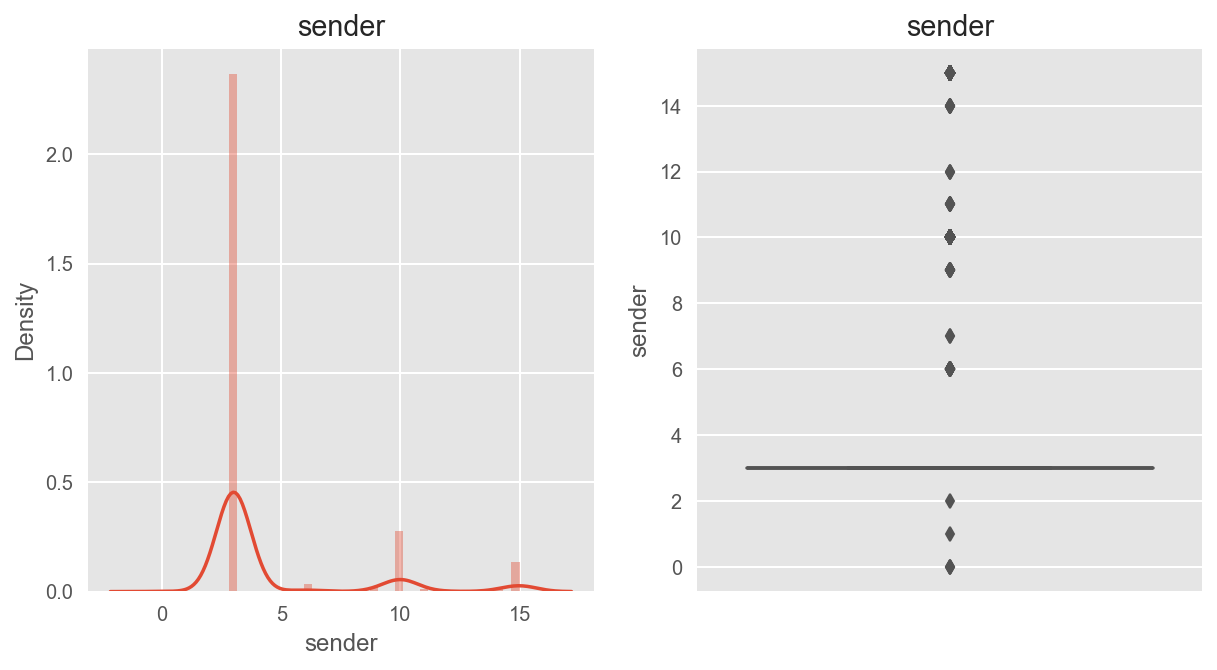

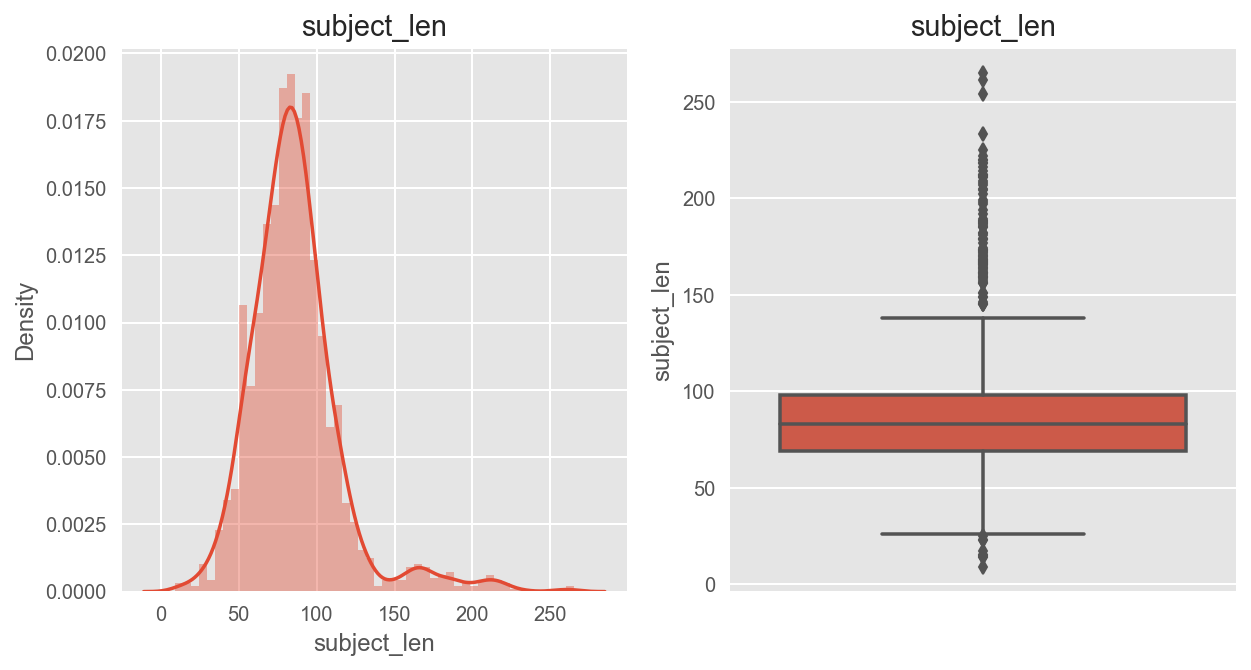

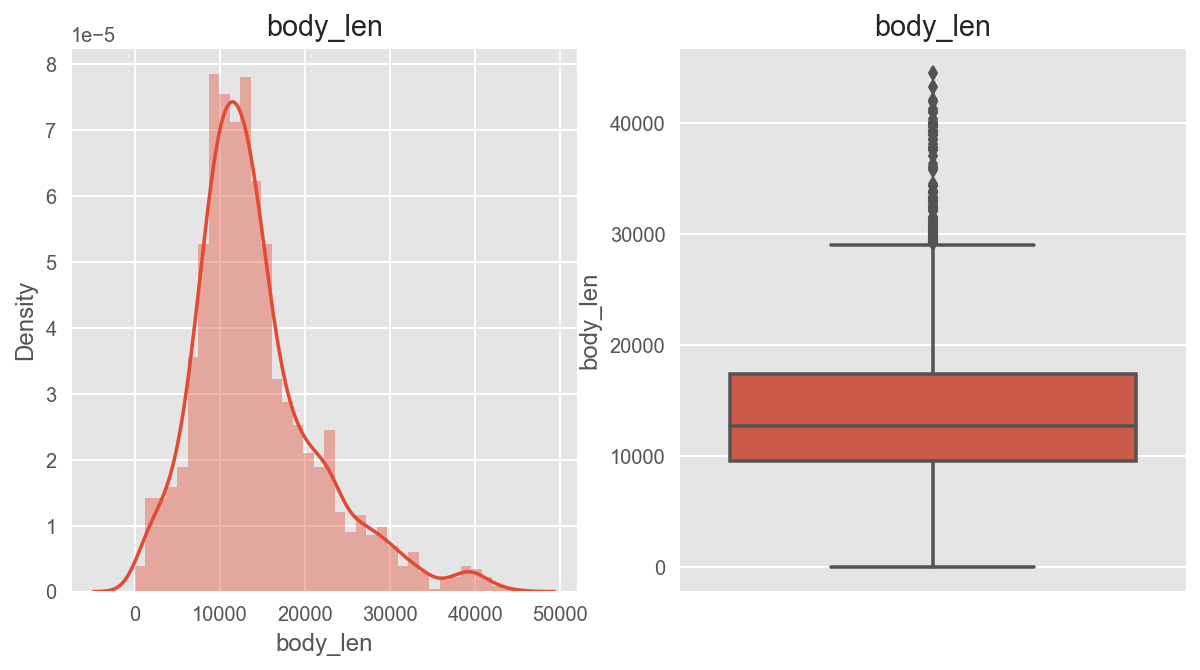

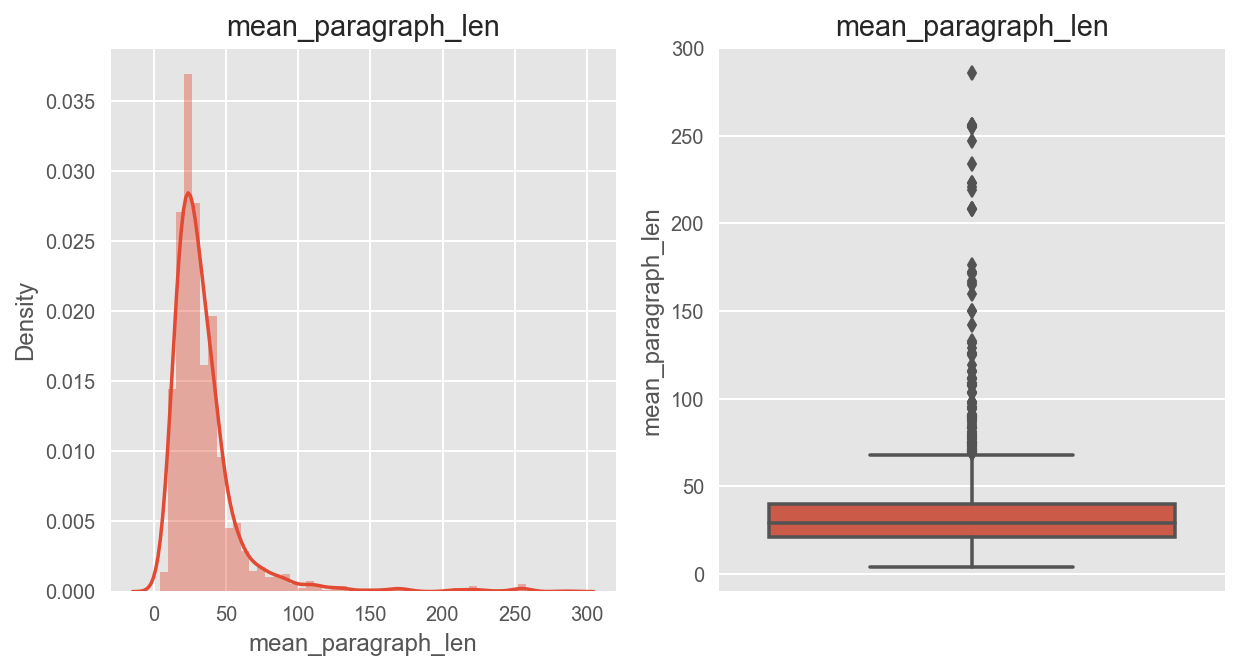

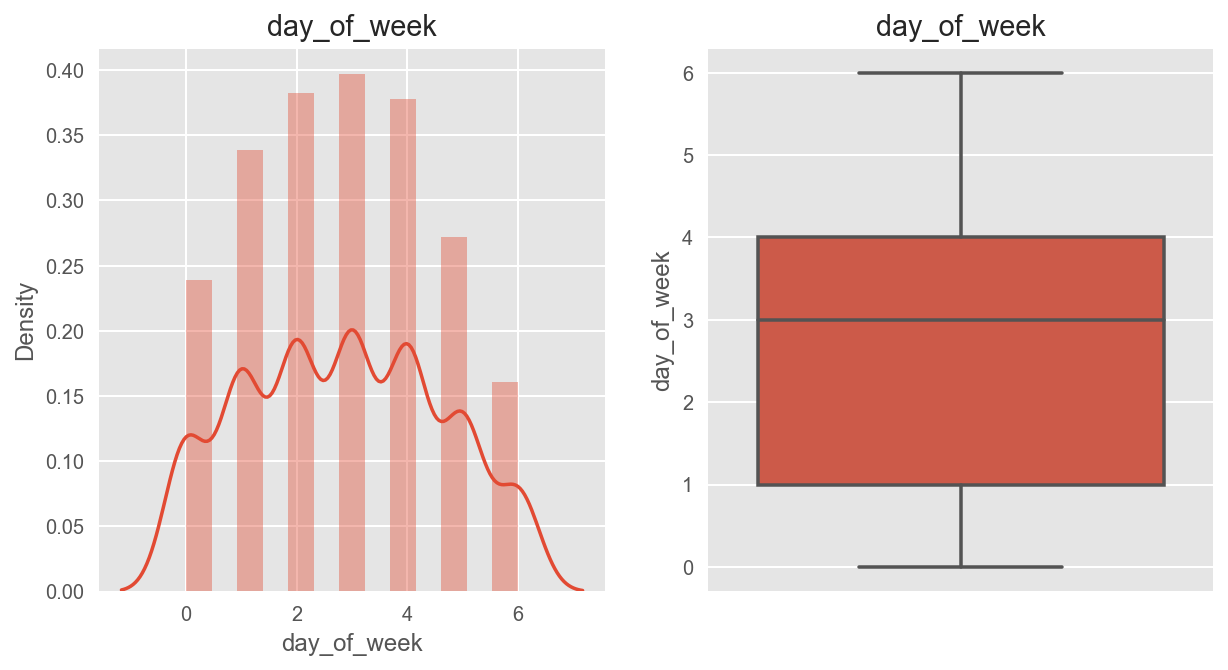

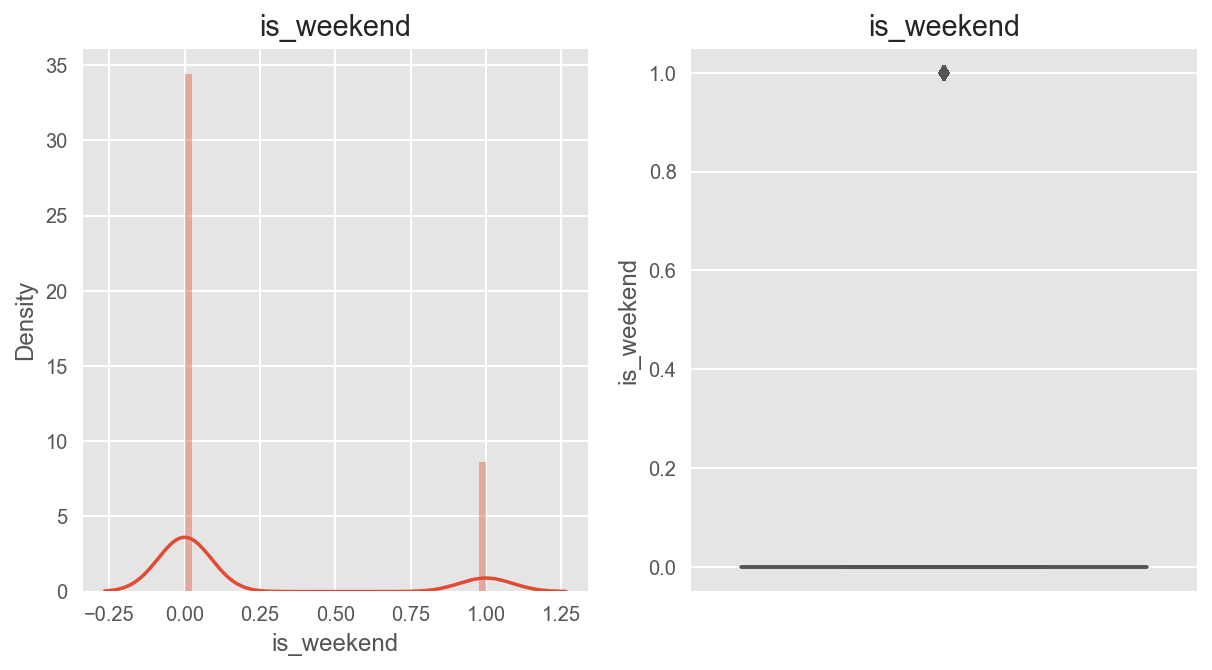

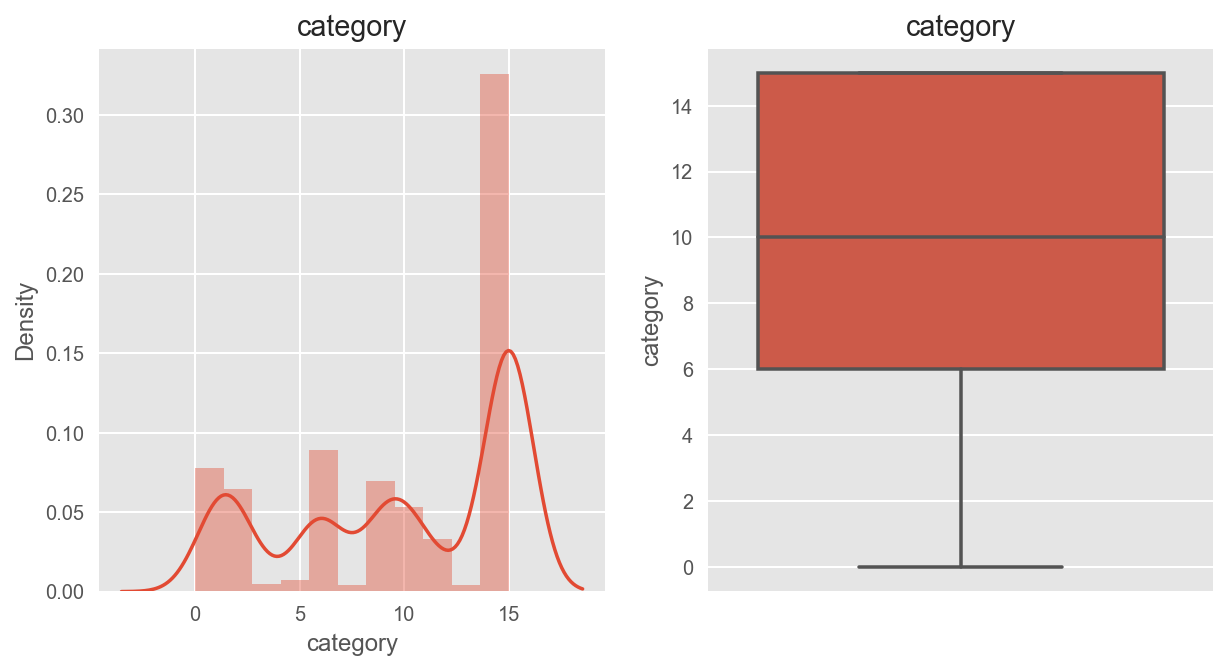

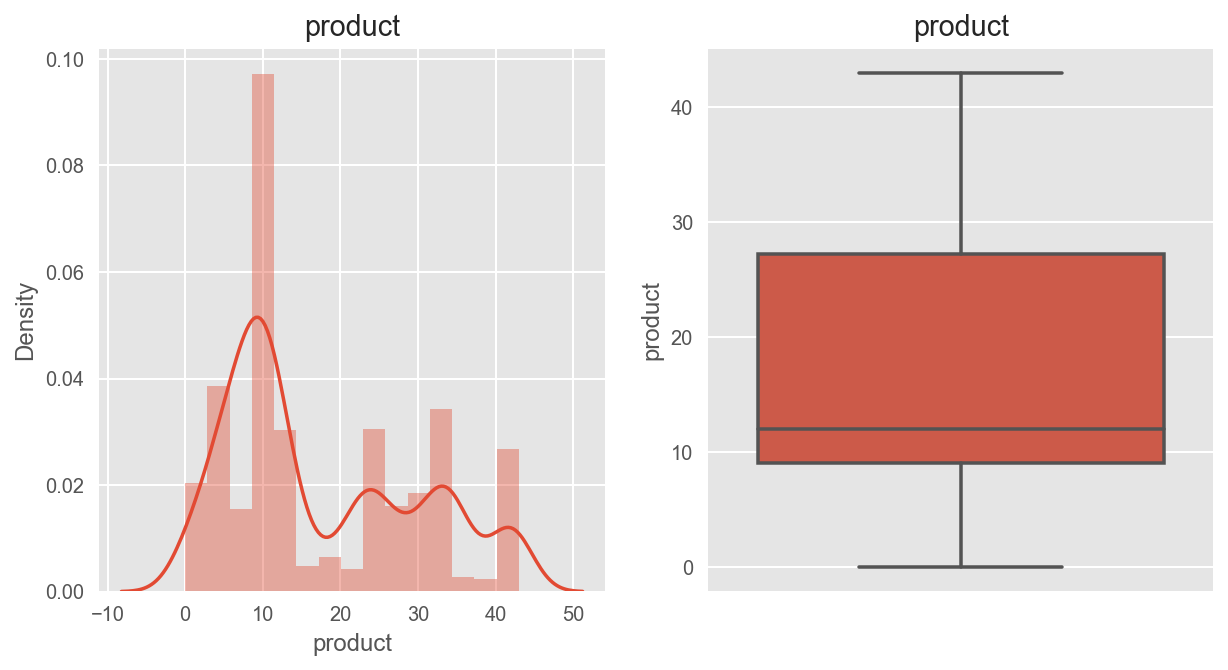

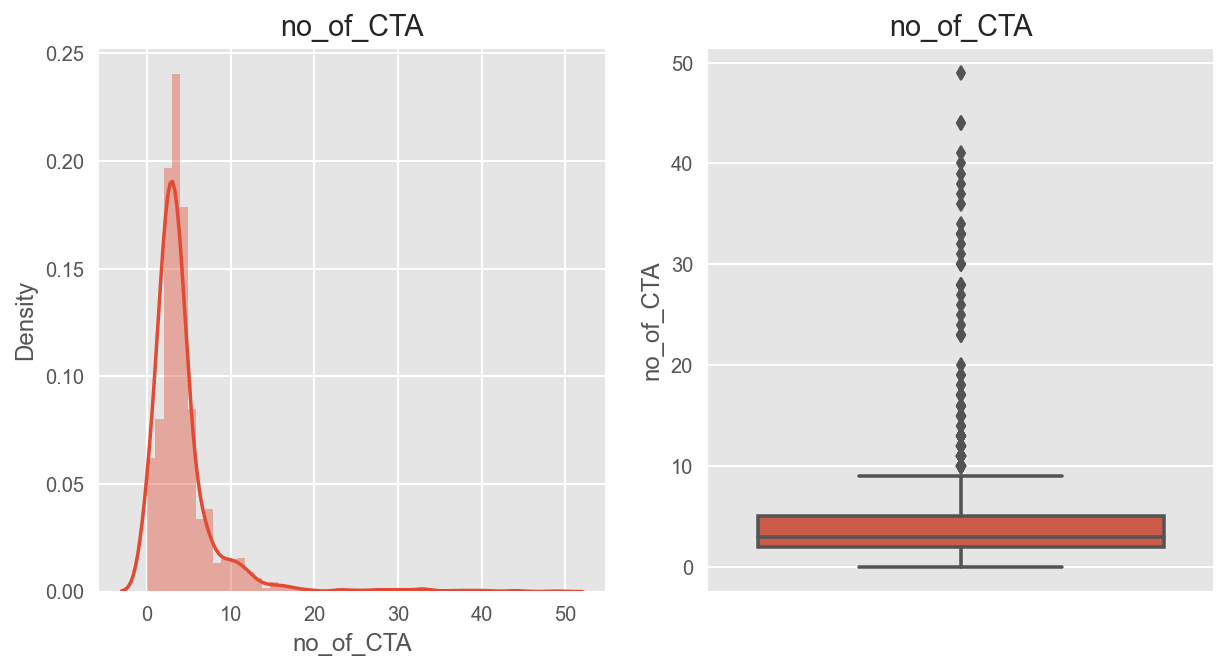

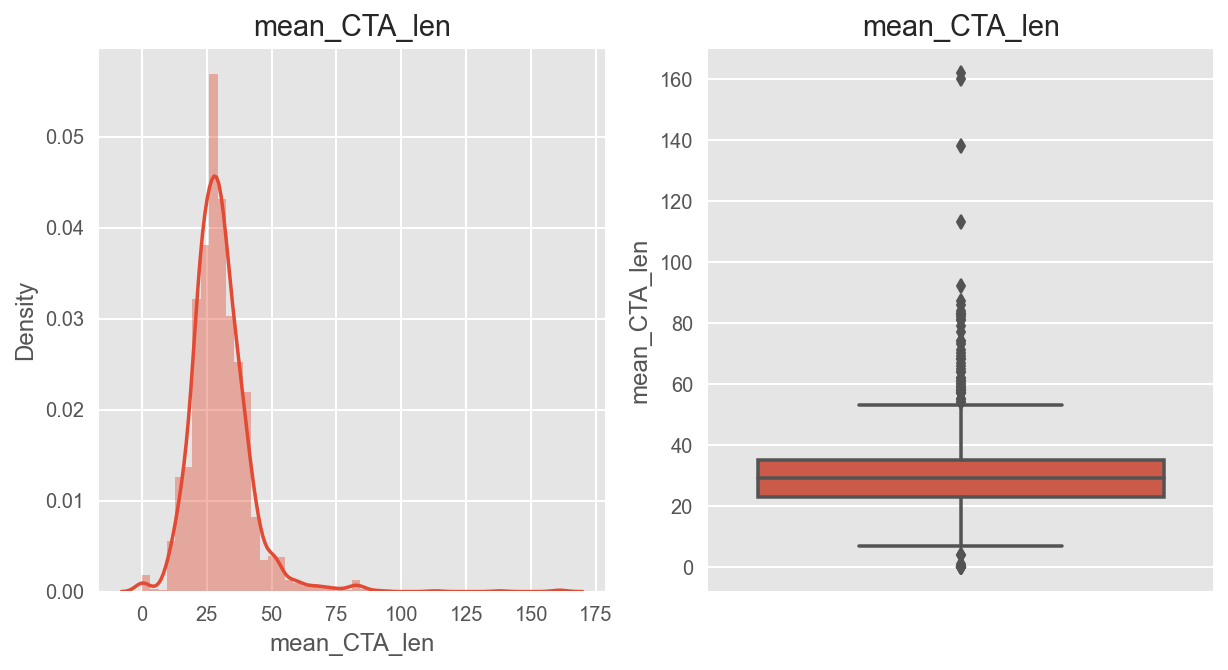

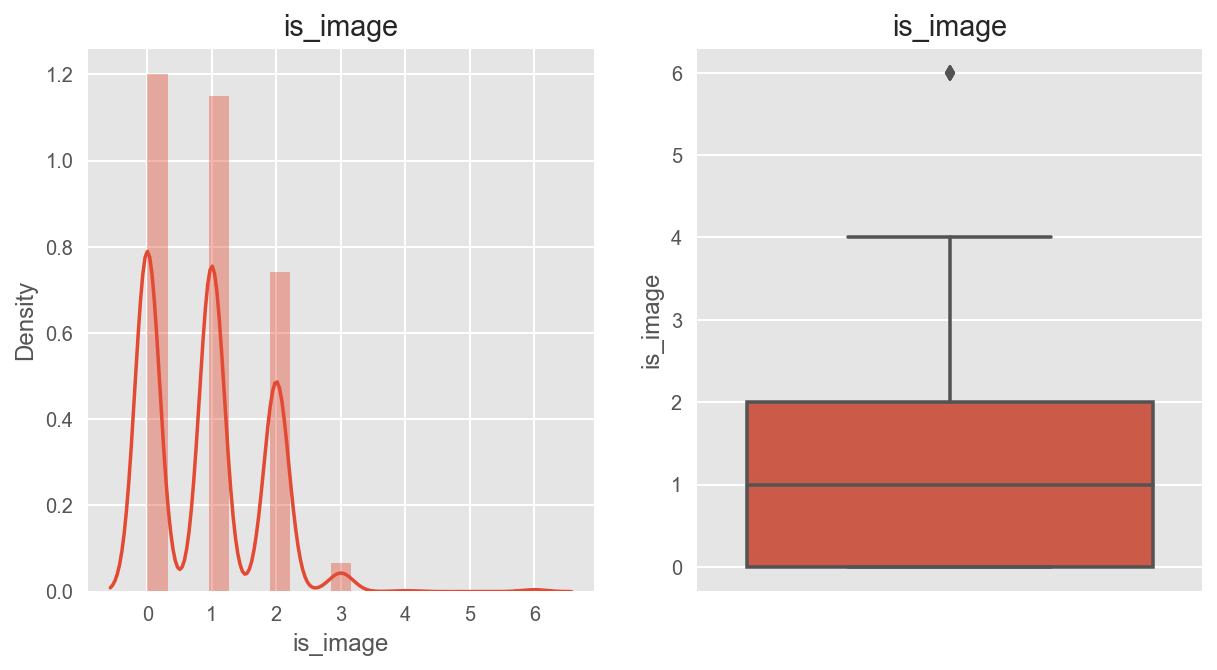

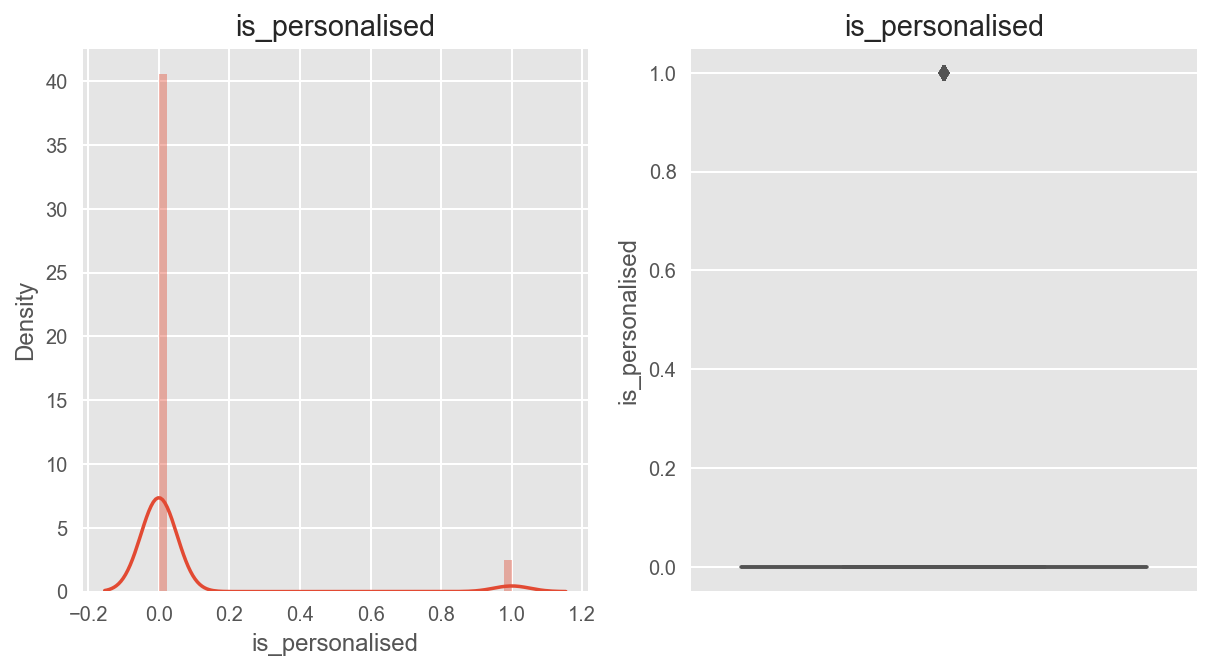

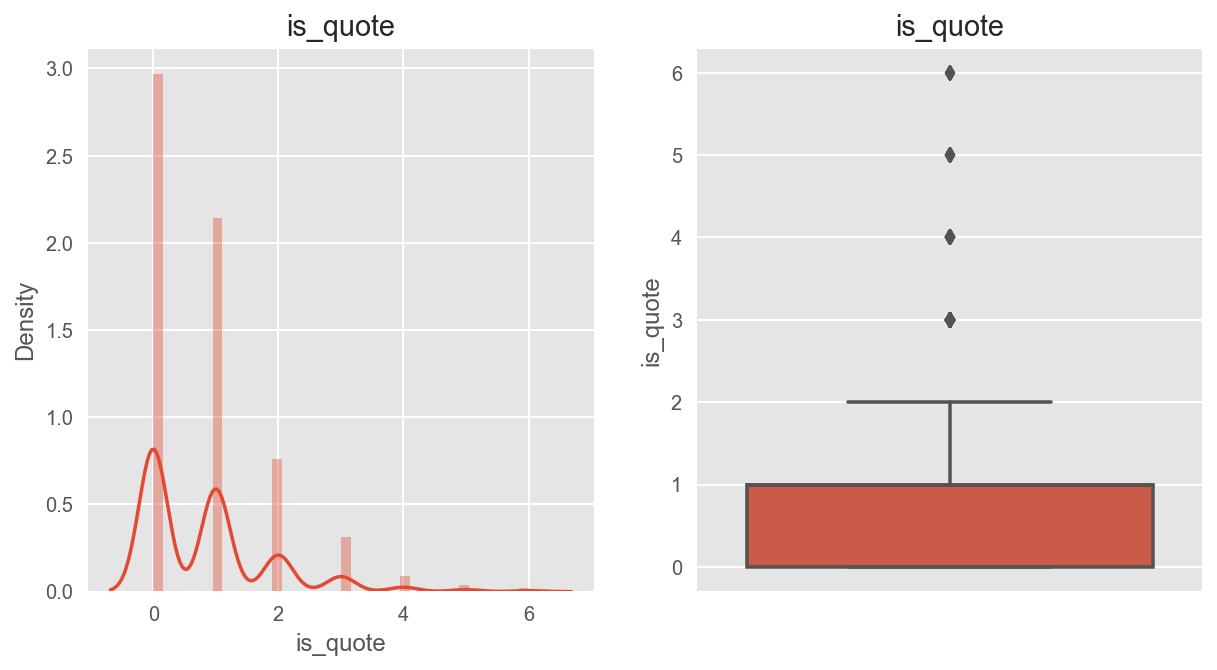

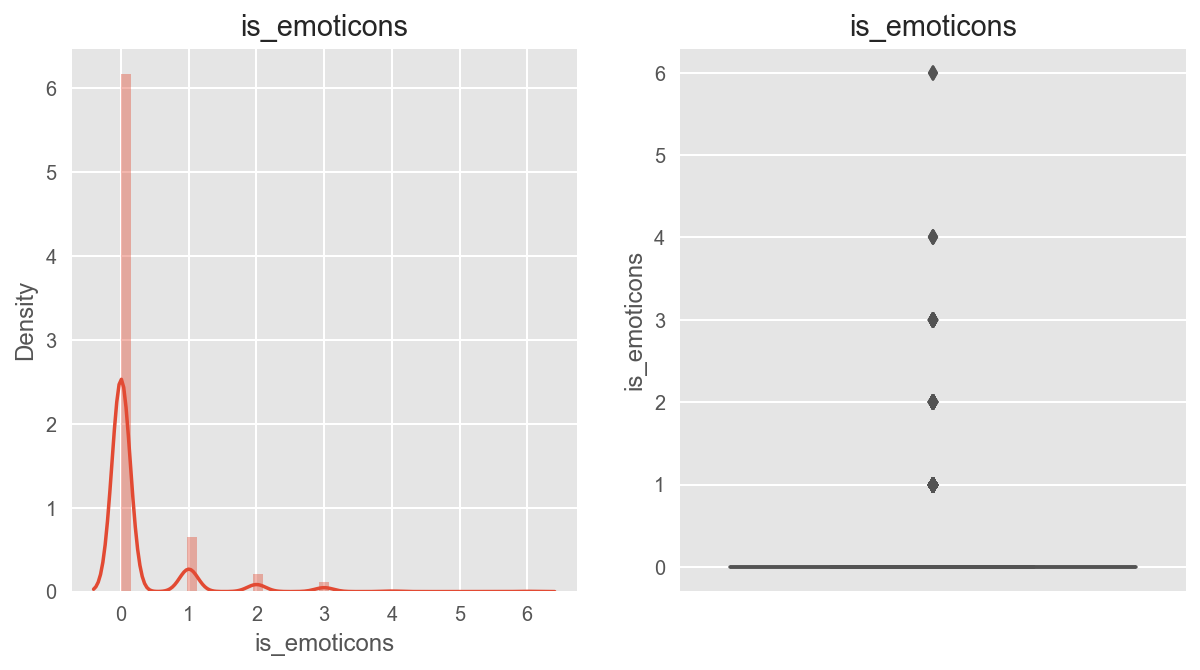

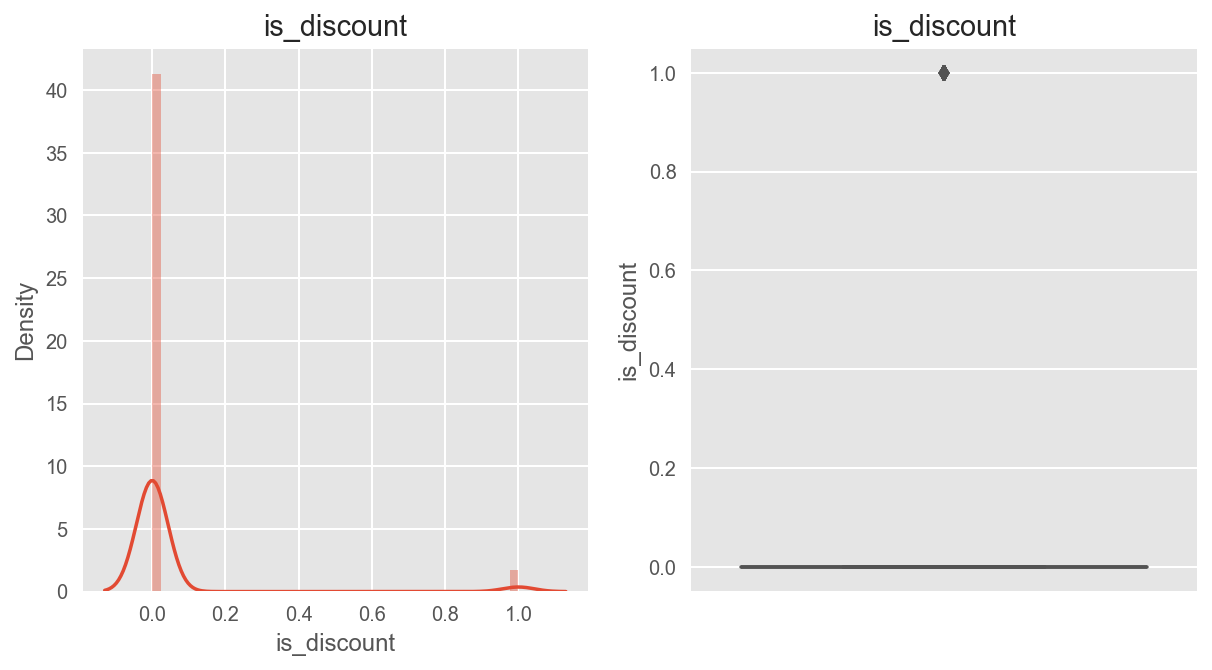

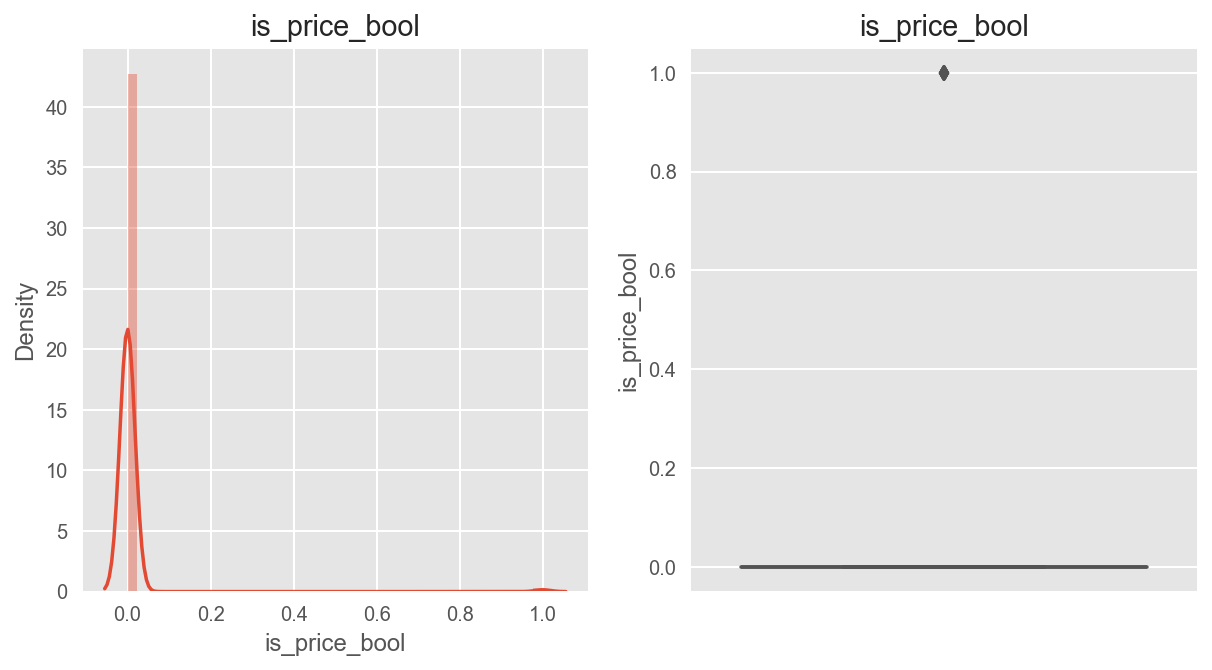

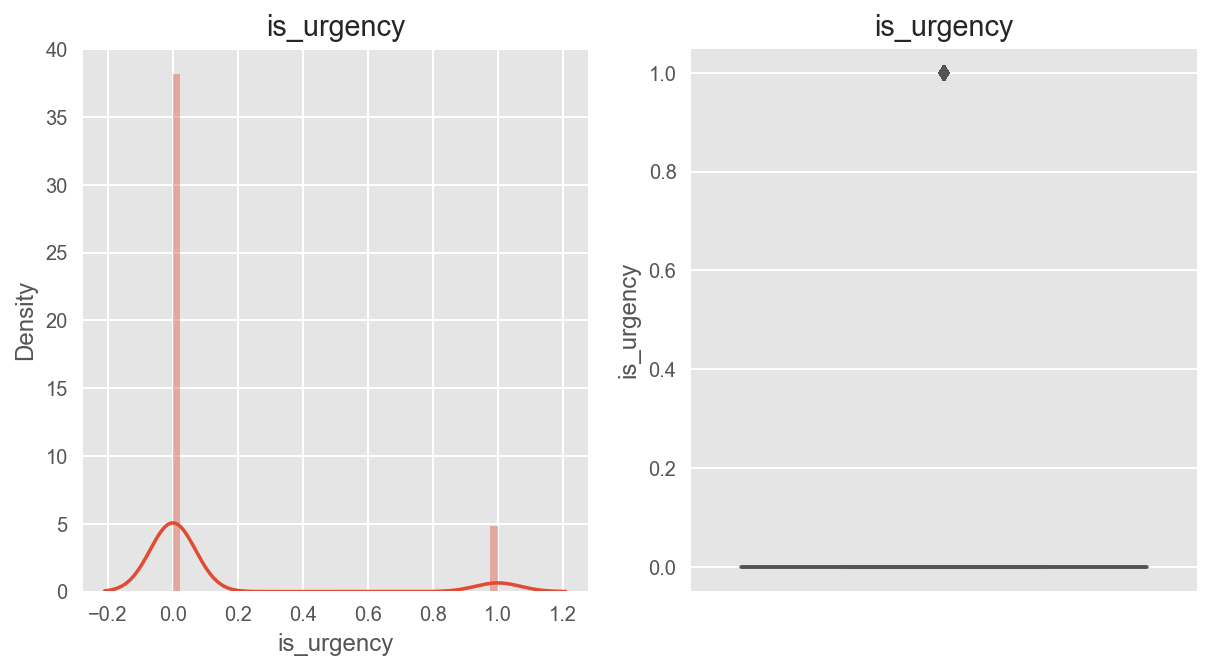

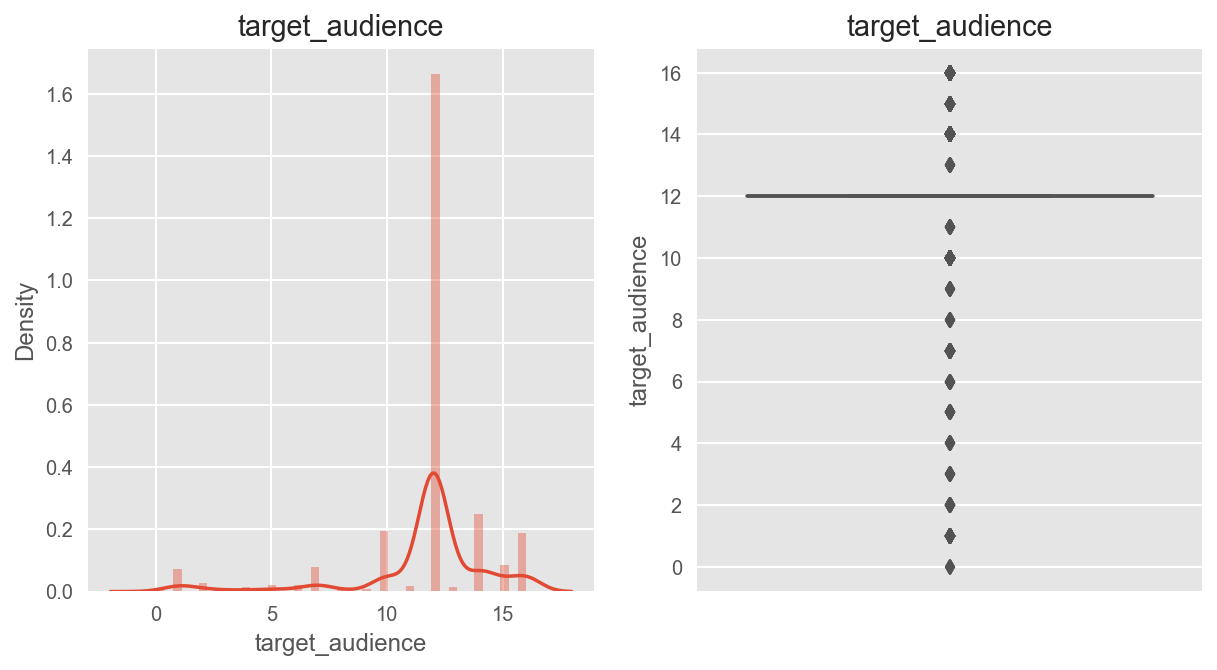

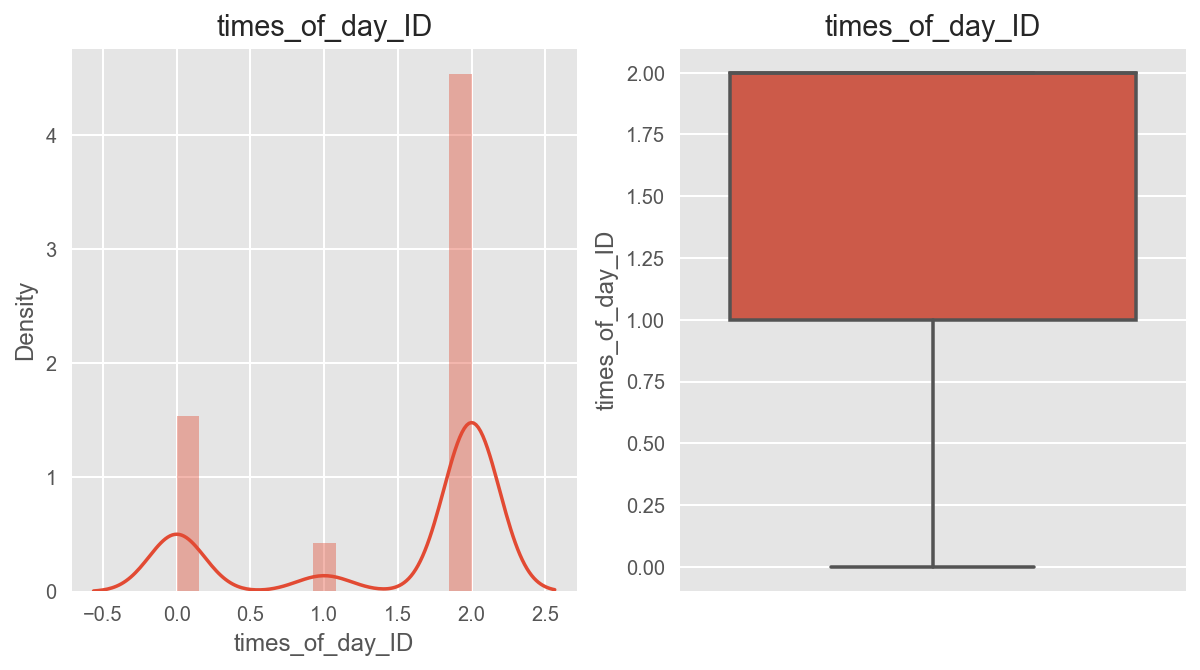

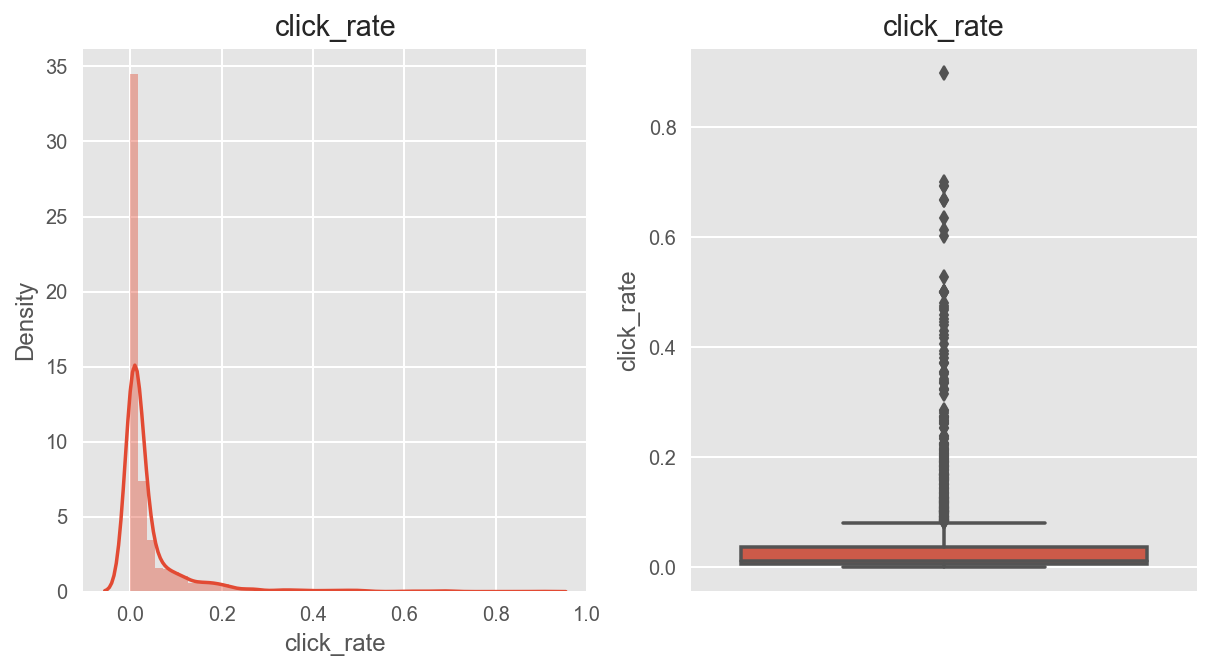

In [156]:
#Visualizing Outliers on Continuous Numerical Feature
feats= ['sender', 'subject_len', 'body_len', 'mean_paragraph_len',
       'day_of_week', 'is_weekend', 'category', 'product', 'no_of_CTA',
       'mean_CTA_len', 'is_image', 'is_personalised', 'is_quote',
       'is_emoticons', 'is_discount', 'is_price_bool', 'is_urgency',
       'target_audience','times_of_day_ID','click_rate']
for i in feats:
    dist_box(i)

<Figure size 720x288 with 0 Axes>

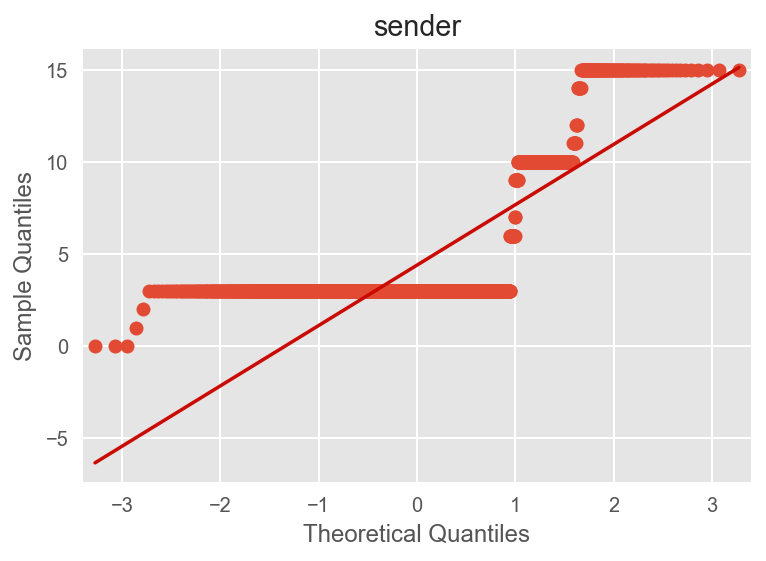

<Figure size 720x288 with 0 Axes>

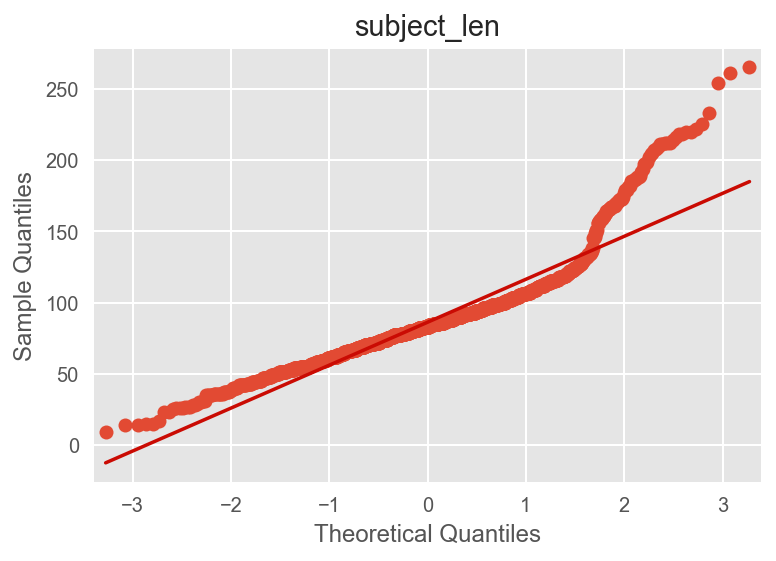

<Figure size 720x288 with 0 Axes>

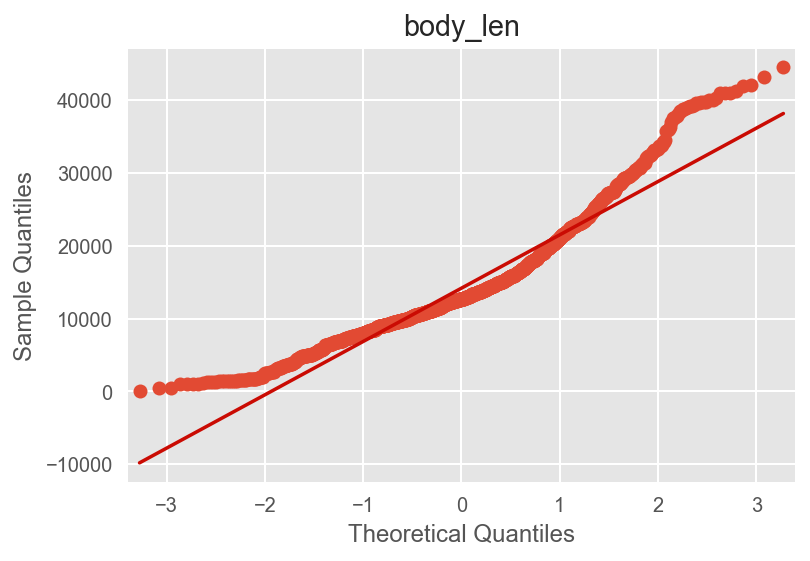

<Figure size 720x288 with 0 Axes>

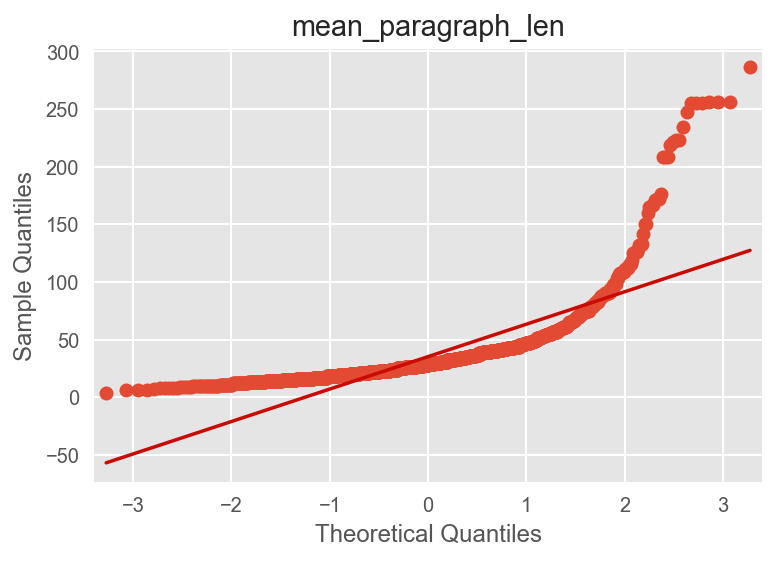

<Figure size 720x288 with 0 Axes>

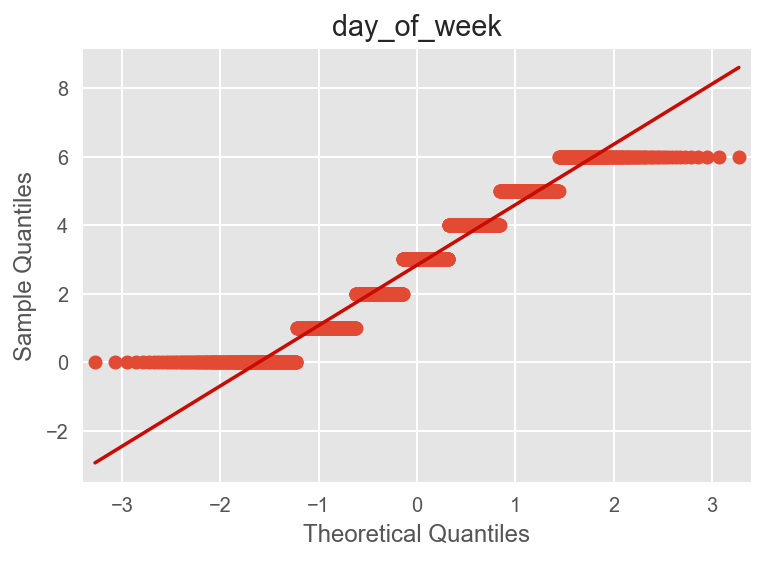

<Figure size 720x288 with 0 Axes>

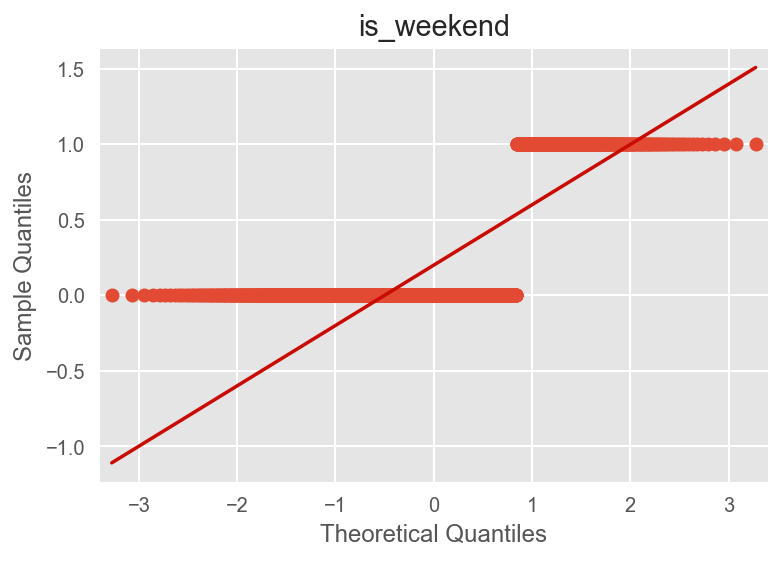

<Figure size 720x288 with 0 Axes>

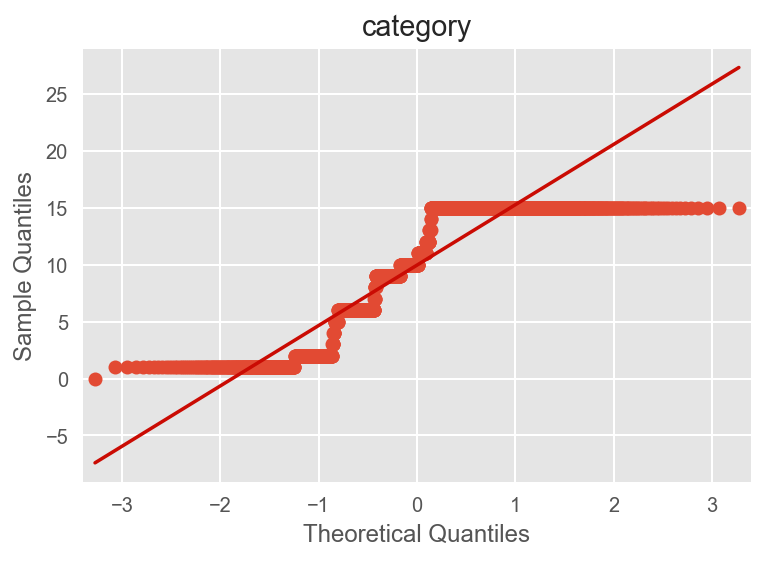

<Figure size 720x288 with 0 Axes>

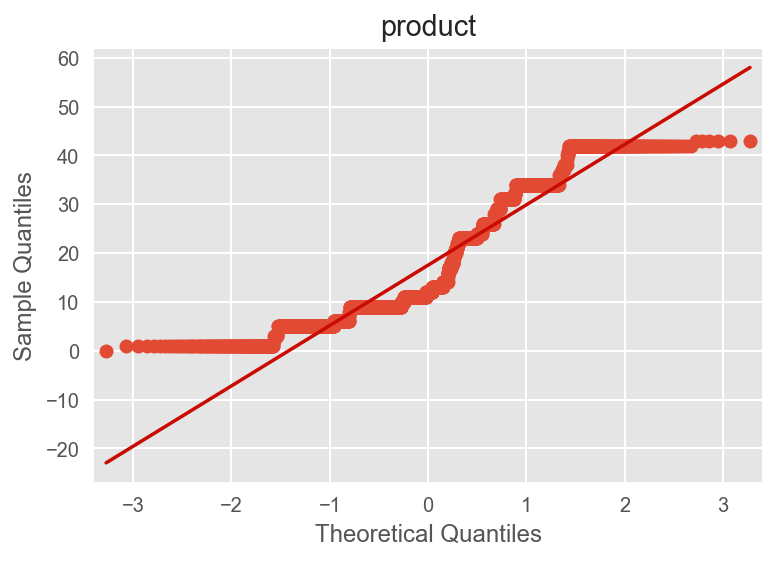

<Figure size 720x288 with 0 Axes>

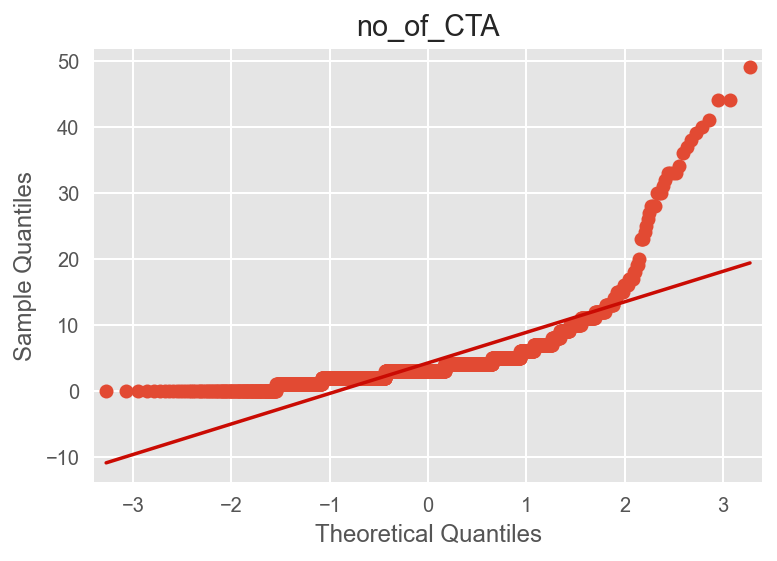

<Figure size 720x288 with 0 Axes>

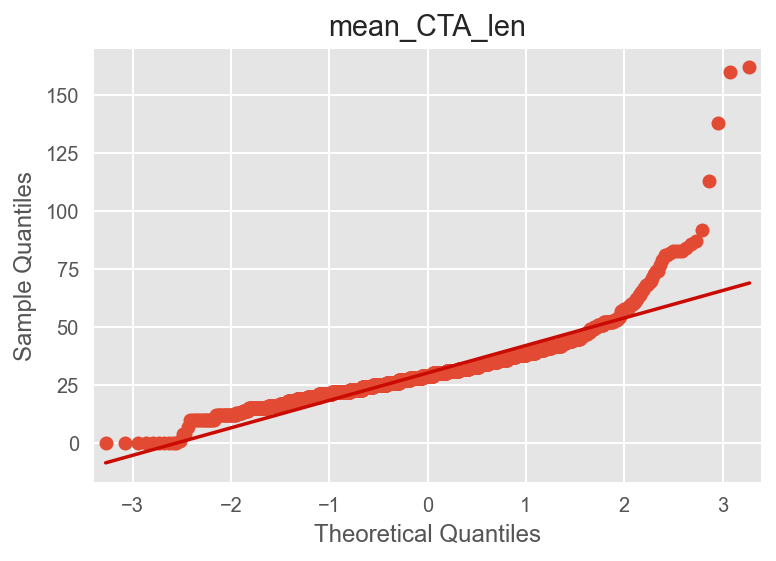

<Figure size 720x288 with 0 Axes>

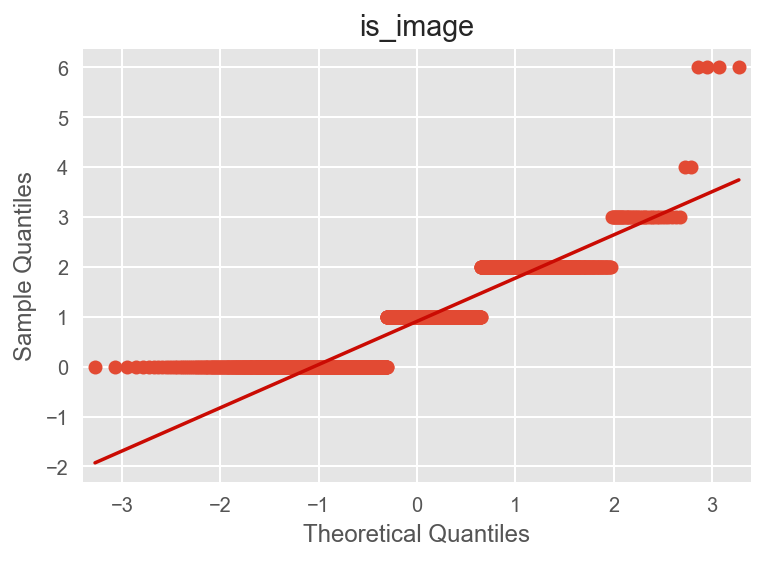

<Figure size 720x288 with 0 Axes>

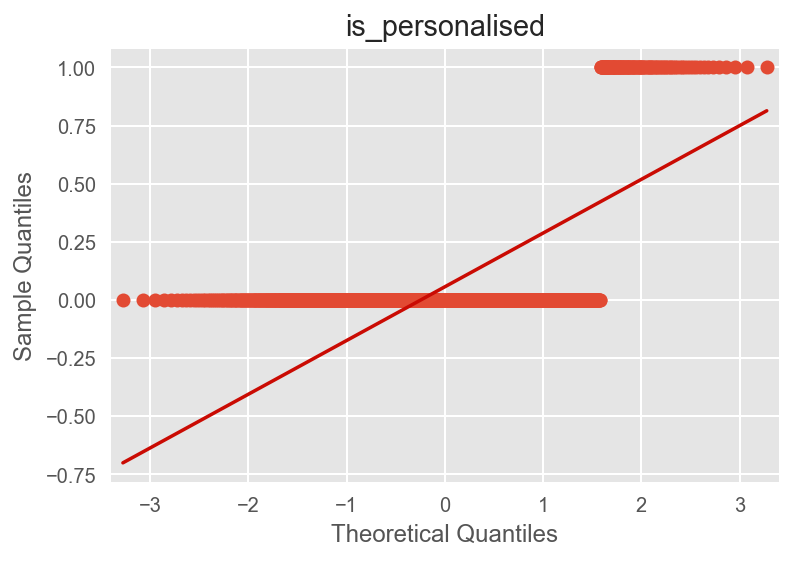

<Figure size 720x288 with 0 Axes>

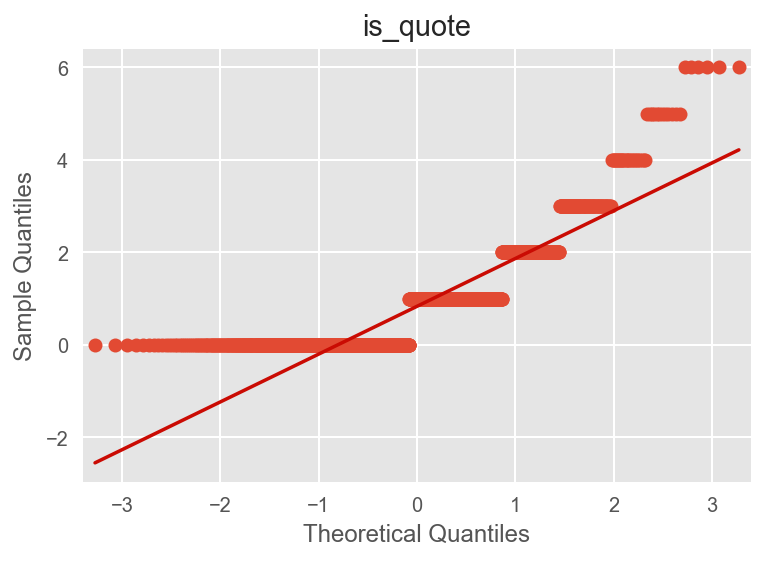

<Figure size 720x288 with 0 Axes>

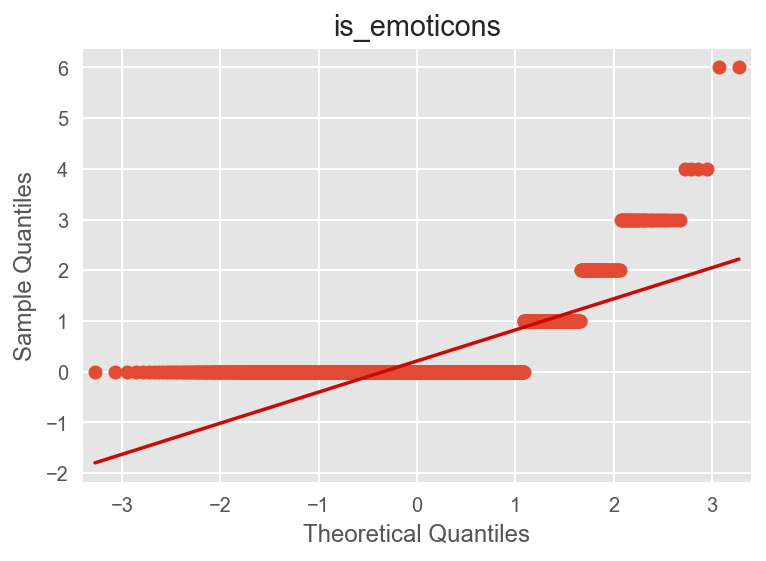

<Figure size 720x288 with 0 Axes>

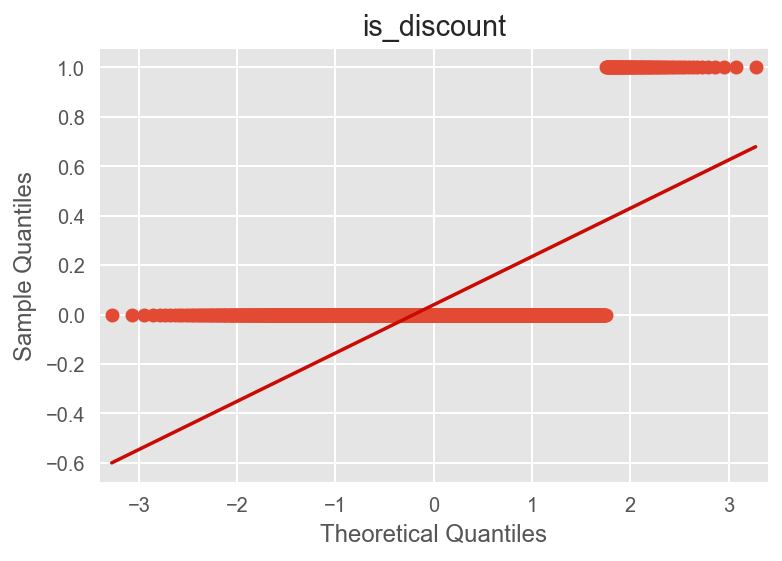

<Figure size 720x288 with 0 Axes>

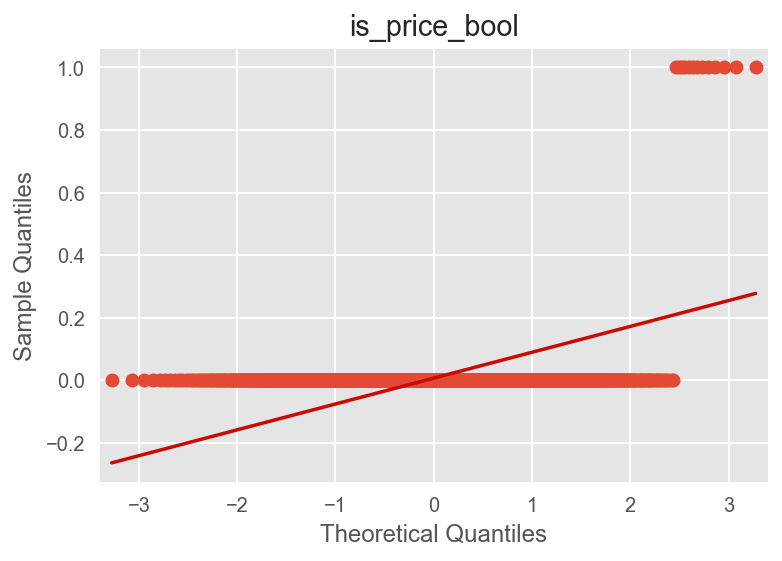

<Figure size 720x288 with 0 Axes>

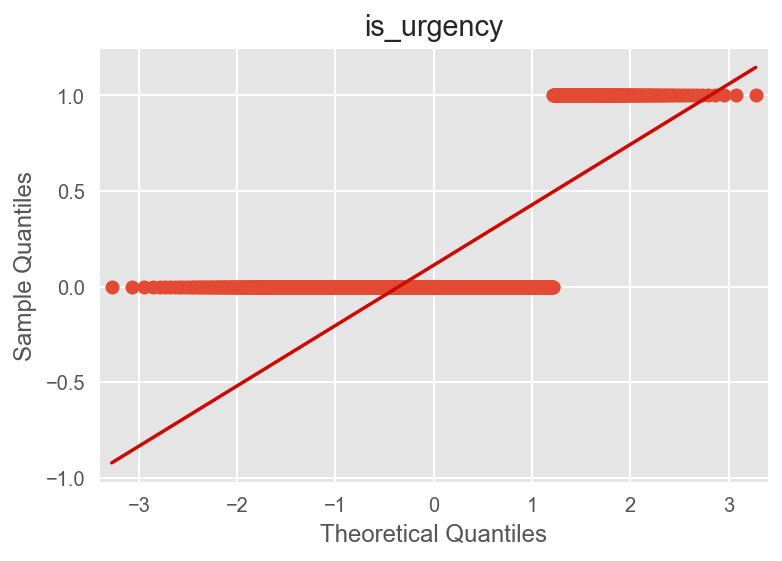

<Figure size 720x288 with 0 Axes>

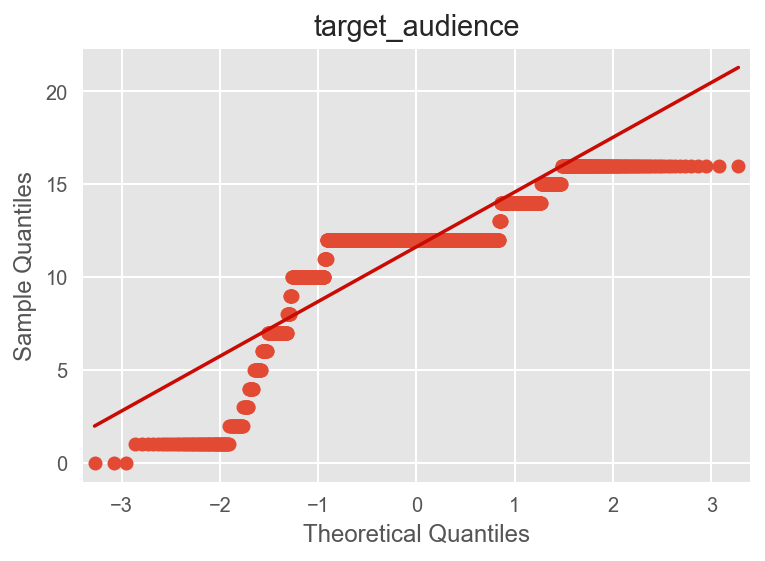

<Figure size 720x288 with 0 Axes>

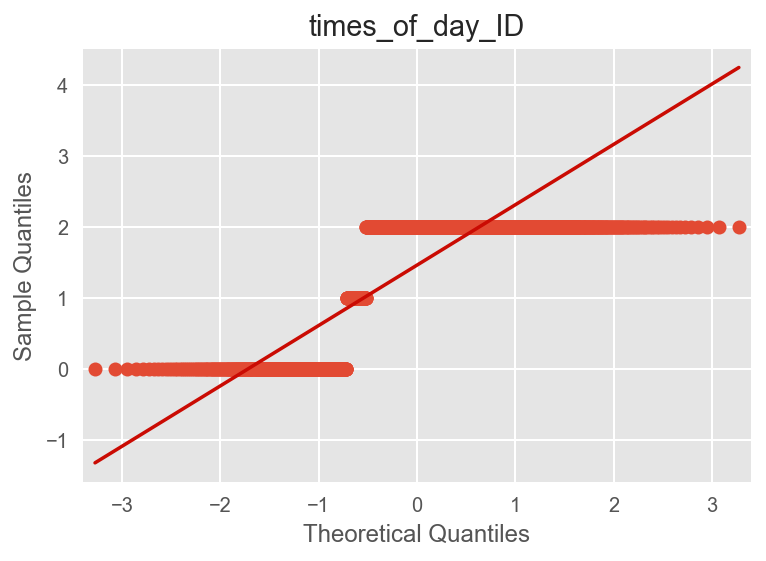

<Figure size 720x288 with 0 Axes>

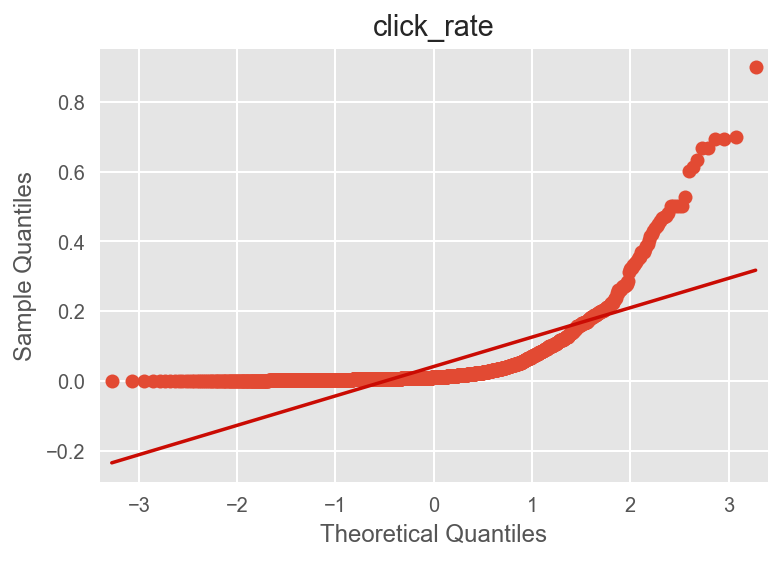

In [157]:
def qq_plots(x):
    plt.figure(figsize=(10, 4))
    qqplot(df_train[x],line='s')
    plt.title(x)
    plt.show()

for i in feats:
    qq_plots(i)    

#### Inference:
- We have used different types of techniques to visualize outliers on numerical fetures and the results are not good sice all the feature consists of alot of outliers and as the outliers are more we cannot remove them so we will try different techniques to eliminate them.
- The distribution plot and qqplot shows the variables are not normalliy distributed.
- Most of them have a positive skewness.

# Feature Exploration on Regplot

## Checking the objective with the features

In [158]:
feats=['sender', 'subject_len', 'body_len', 'mean_paragraph_len',
       'day_of_week', 'is_weekend', 'category', 'product', 'no_of_CTA',
       'mean_CTA_len', 'is_image', 'is_personalised', 'is_quote',
       'is_emoticons', 'is_discount', 'is_price_bool', 'is_urgency',
       'target_audience','times_of_day_ID']

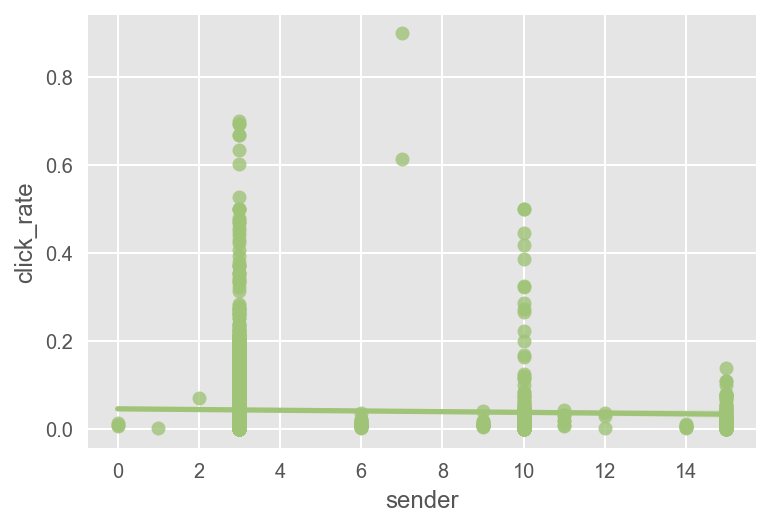

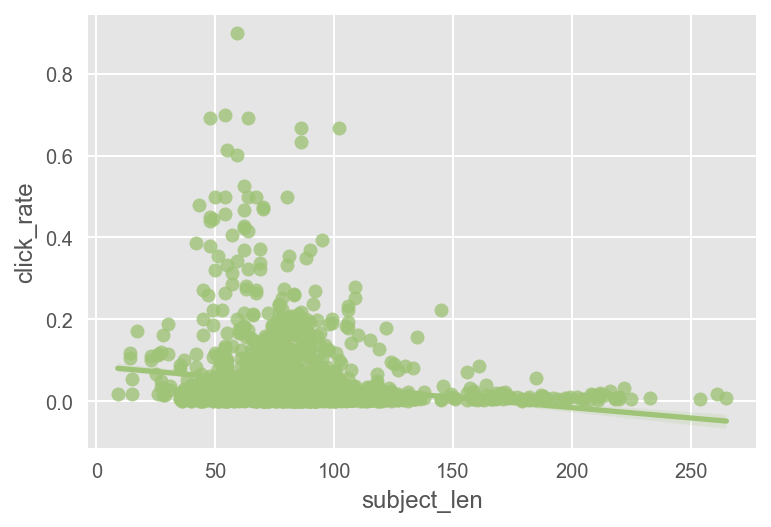

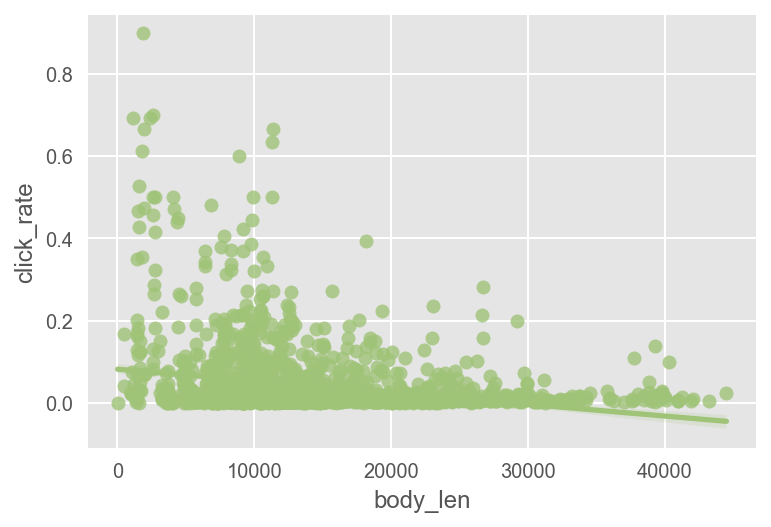

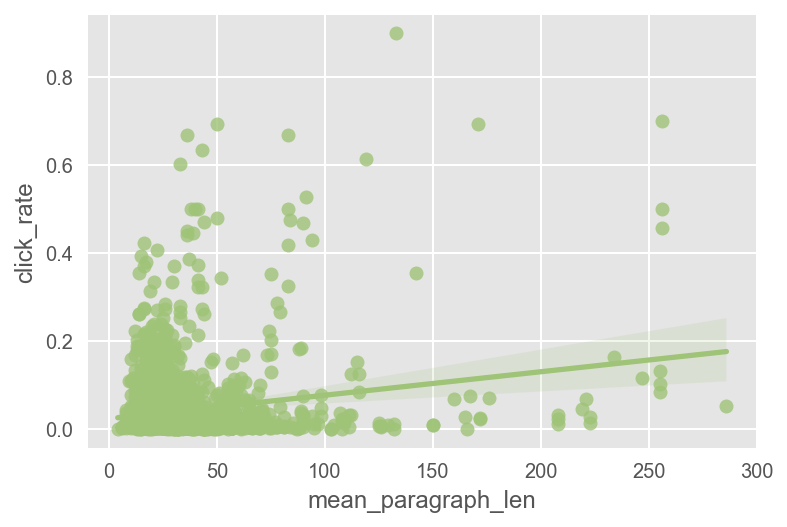

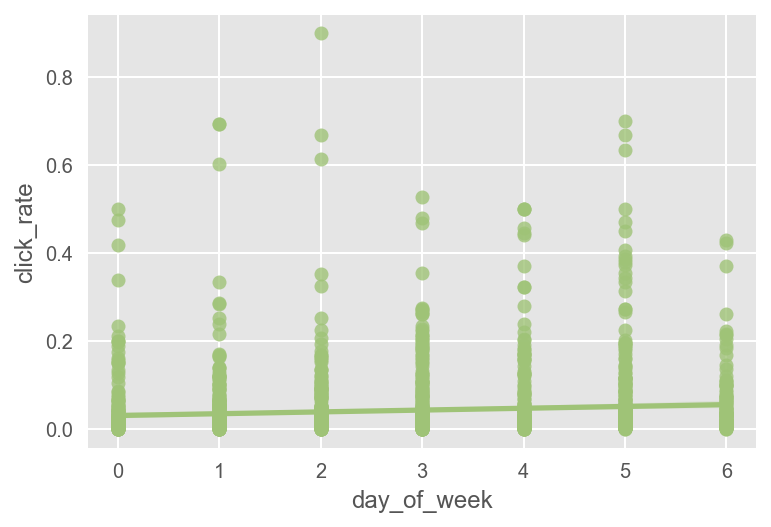

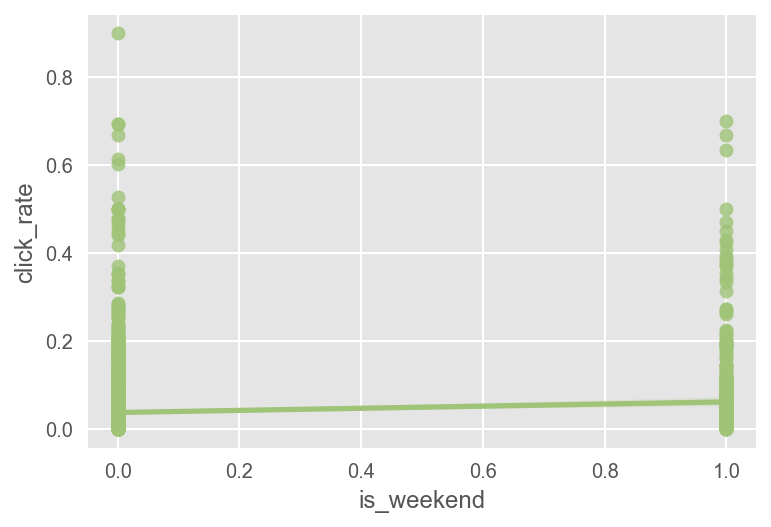

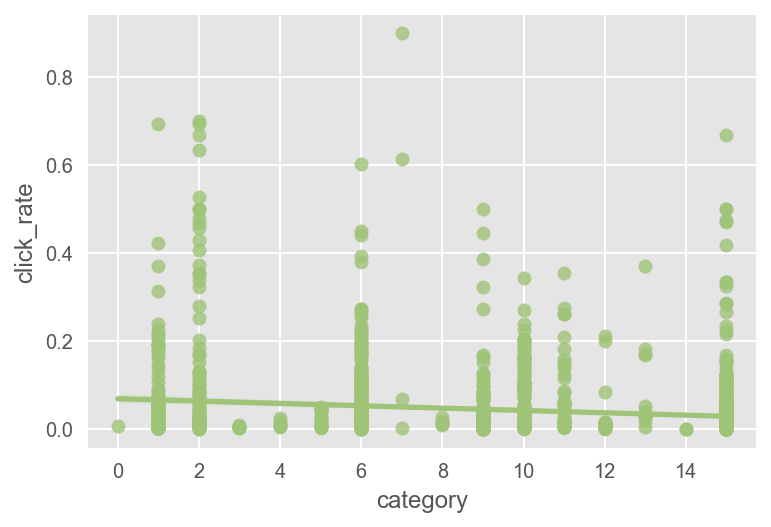

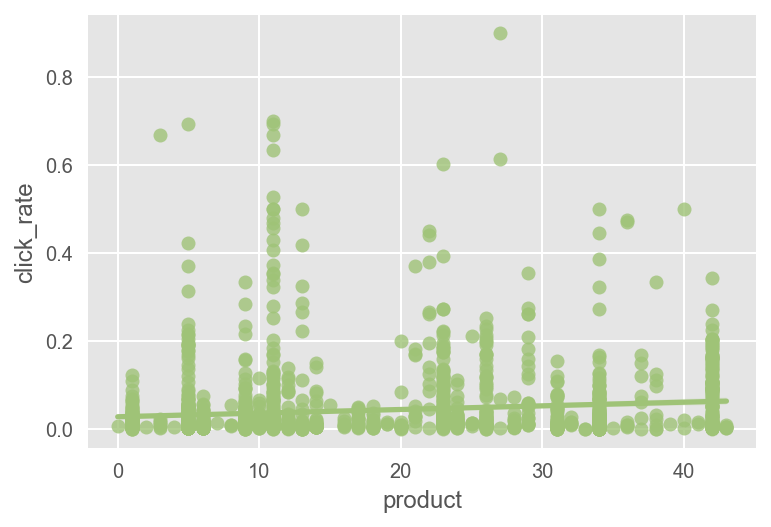

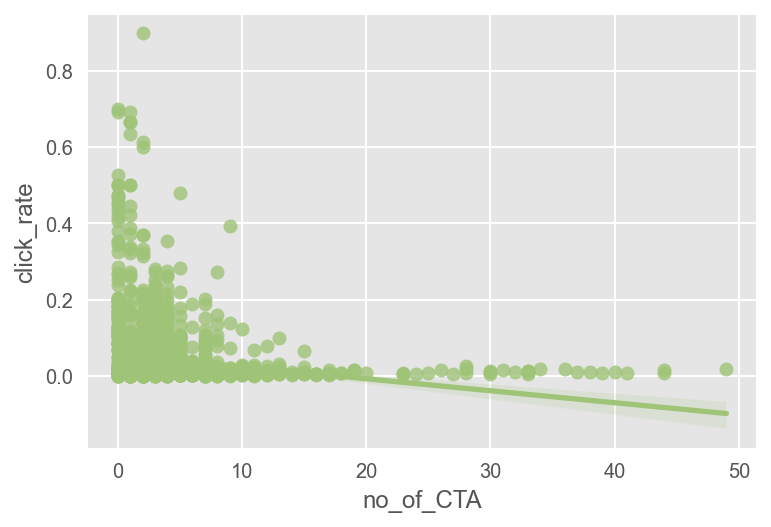

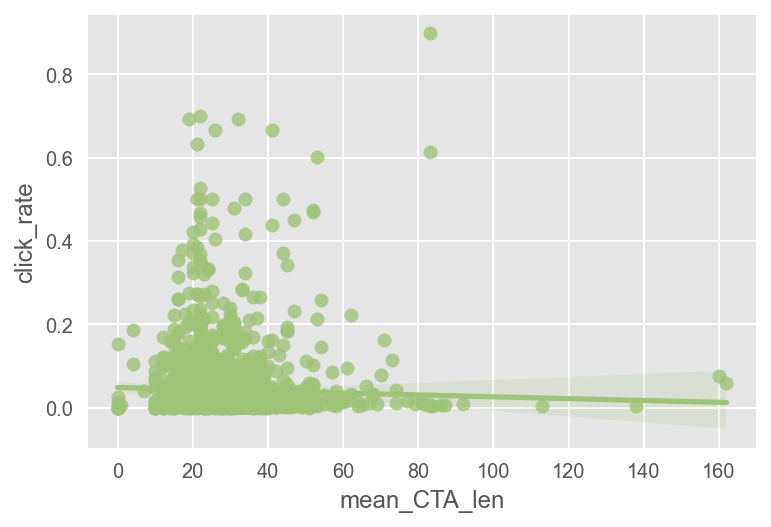

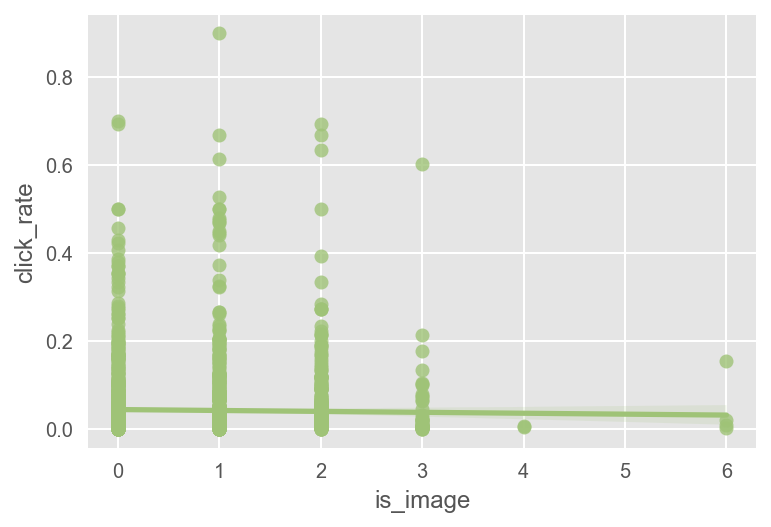

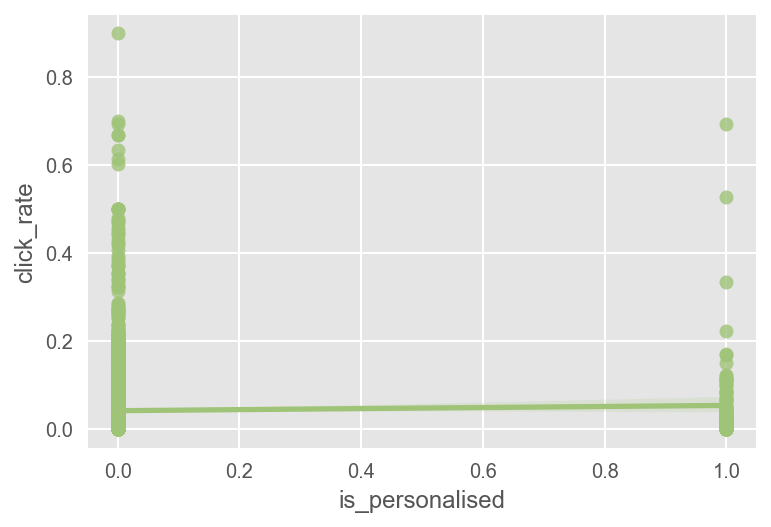

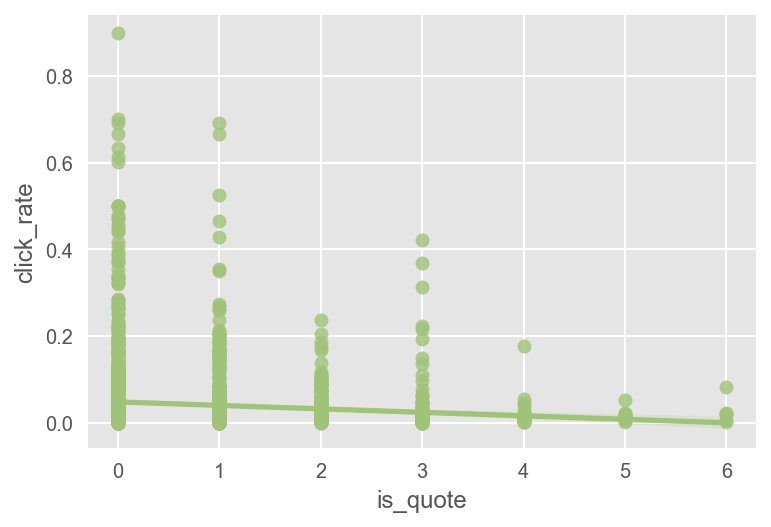

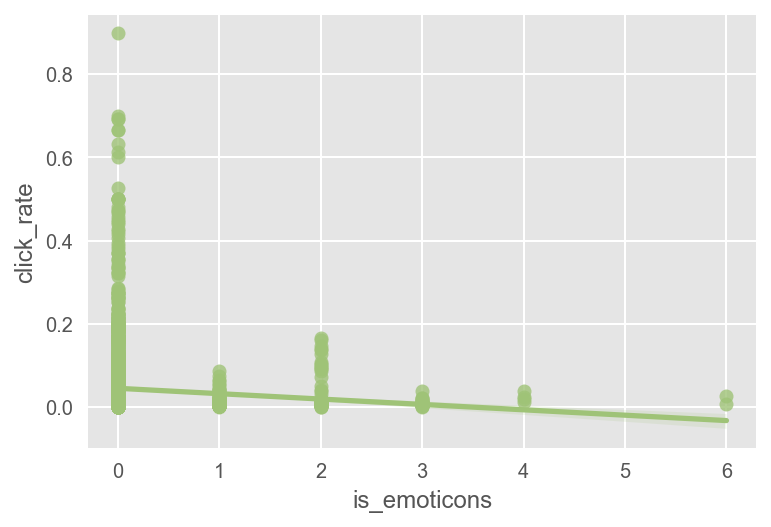

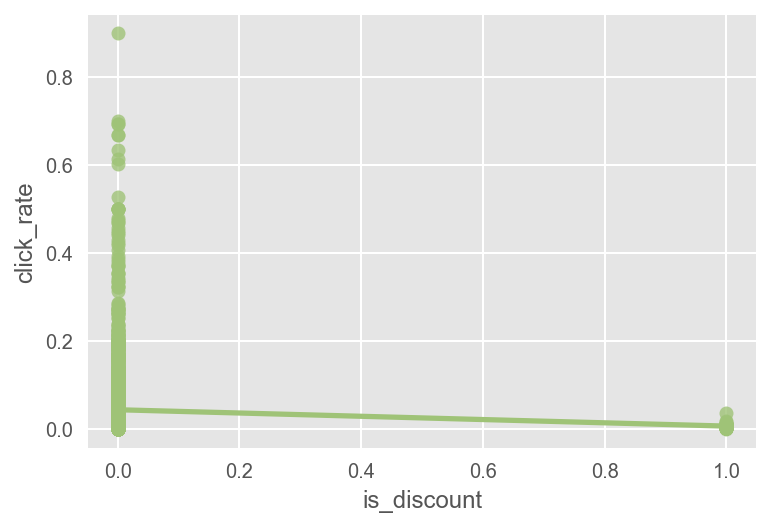

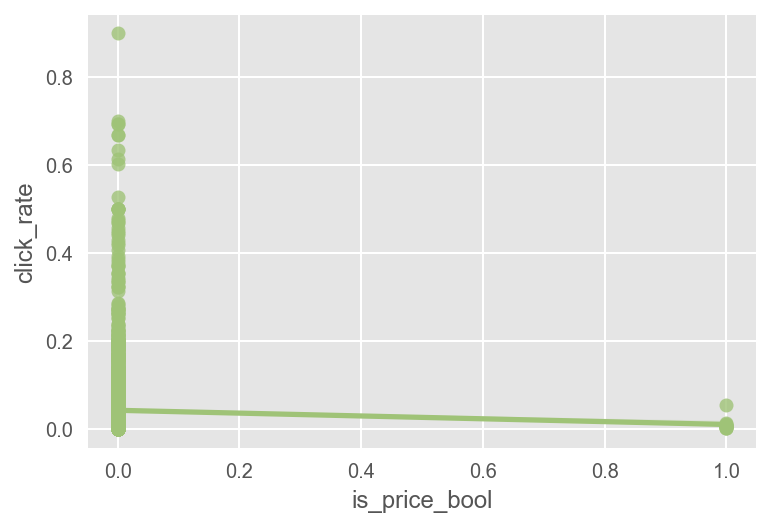

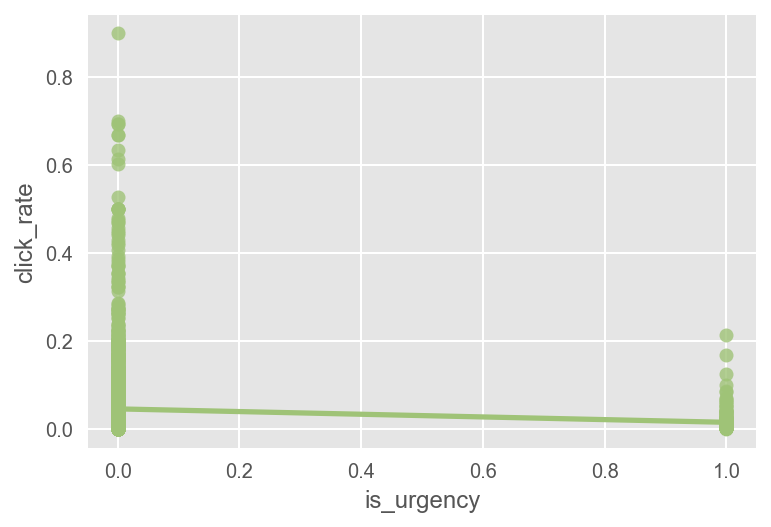

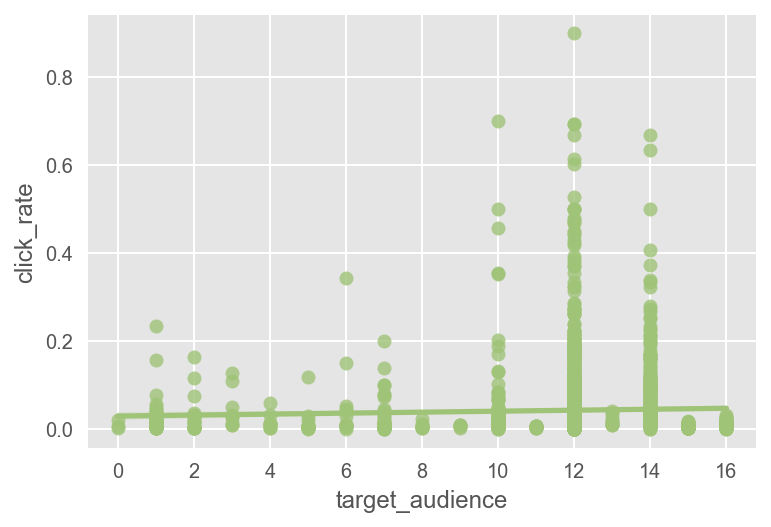

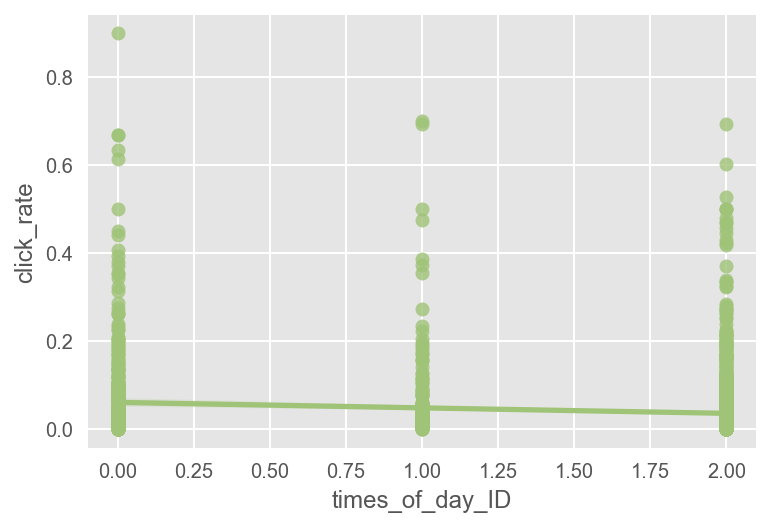

In [159]:
for i in feats:
    sns.regplot(x=df_train[i],y=df_train['click_rate'],data=df_train,color='g')
    plt.show()

#### Inference from Regplot
- From above regplot, we have compare each variables with the target variable. Only 'mean_paragraph_len' & 'product' are giving linear relation as it increases.'sender','day_of_week','is_weekend','is_image','is_personalised'& 'mean_CTA_len' is uniform to our target variable. Rest all other variables are showing negative relation with target variable.

# Feature Exploration On Barplot

In [160]:
df_train['sender'].unique()

array([ 3, 10,  0,  2, 14, 12, 15,  7, 11,  9,  1,  6], dtype=int64)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '6'),
  Text(5, 0, '7'),
  Text(6, 0, '9'),
  Text(7, 0, '10'),
  Text(8, 0, '11'),
  Text(9, 0, '12'),
  Text(10, 0, '14'),
  Text(11, 0, '15')])

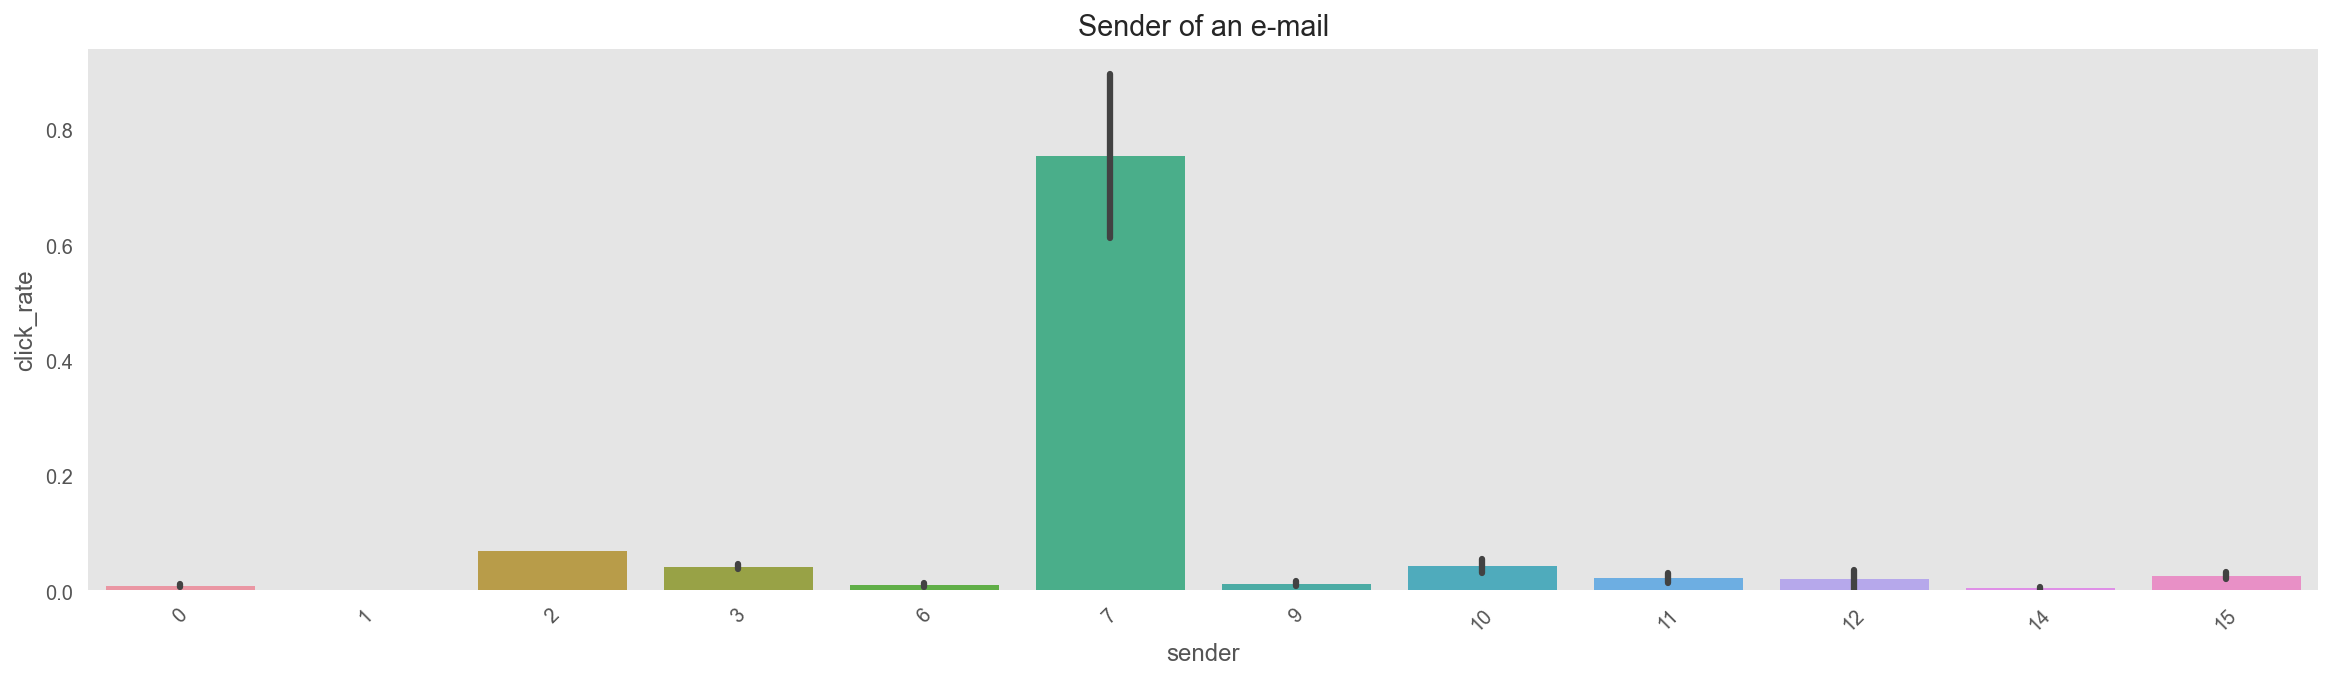

In [161]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='sender',y='click_rate',data=df_train)
plt.grid(axis='y')
plt.title('Sender of an e-mail')
plt.xlabel('sender')
plt.ylabel('click_rate')
plt.xticks(rotation=45)

#### Inference:
- The grouping of the sender are divided into 12 parts.
- On each different part we can see if sender of an email is 7 we can get a good click_rate.

In [162]:
df_train['day_of_week'].unique()

array([5, 4, 3, 2, 1, 0, 6], dtype=int64)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

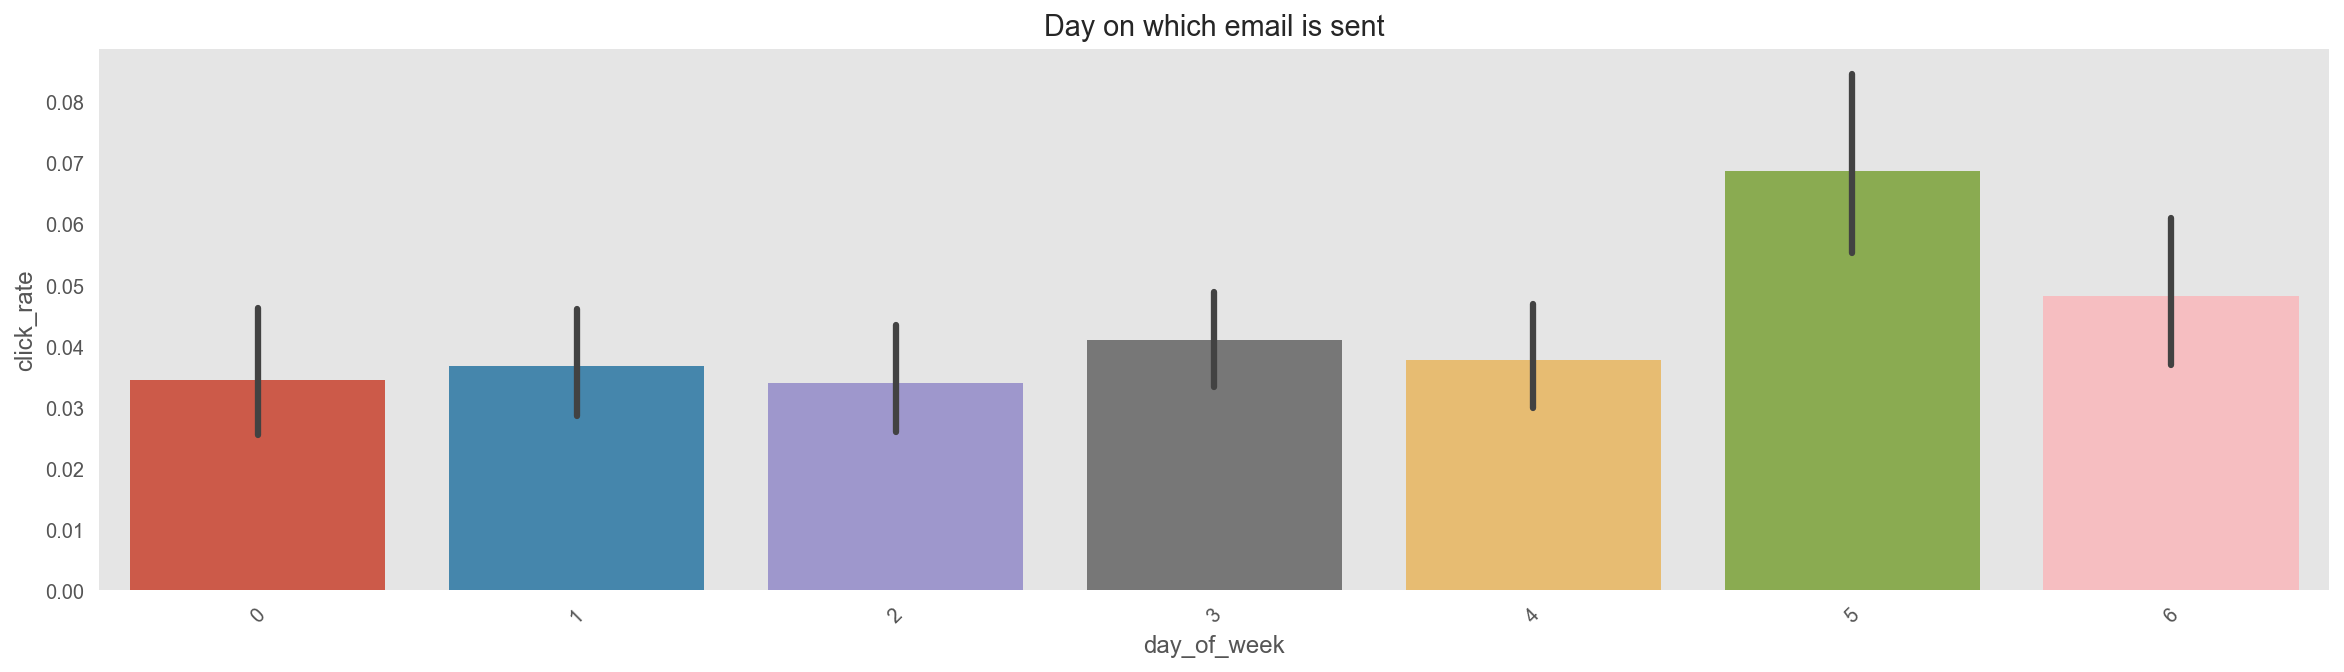

In [163]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='day_of_week',y='click_rate',data=df_train)
plt.grid(axis='y')
plt.title('Day on which email is sent')
plt.xlabel('day_of_week')
plt.ylabel('click_rate')
plt.xticks(rotation=45)

#### Inference:
- From the above bar plot if the email is sent on 5th day or the 6th day we can get good click rate.

In [164]:
df_train['is_weekend'].unique()

array([1, 0], dtype=int64)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

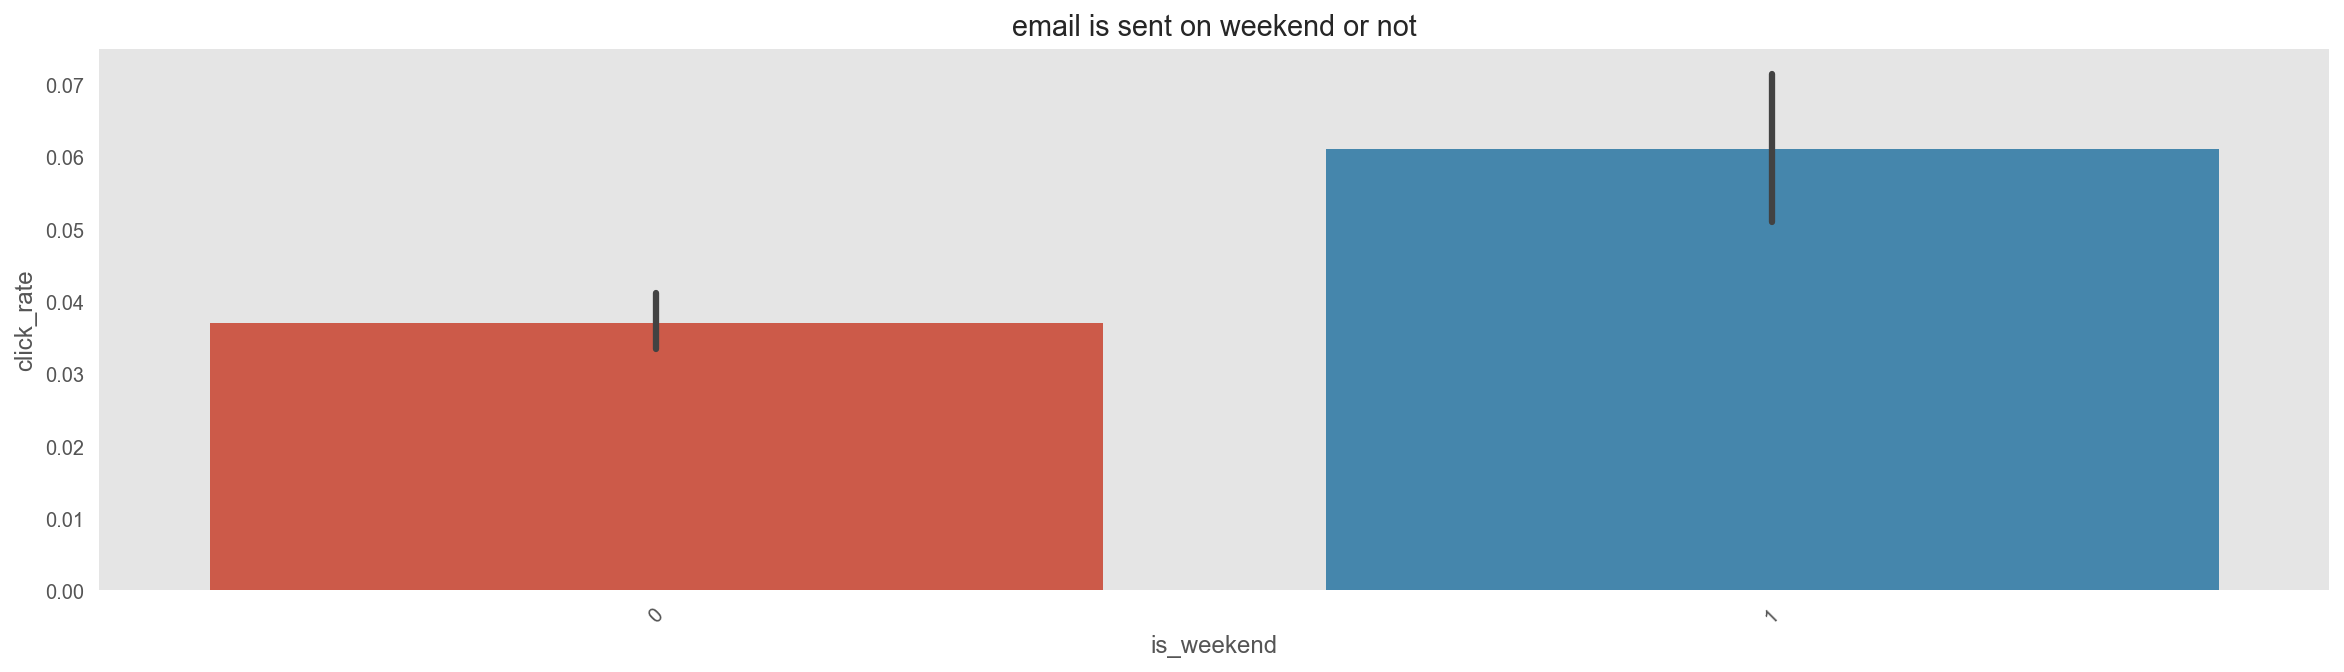

In [165]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='is_weekend',y='click_rate',data=df_train)
plt.grid(axis='y')
plt.title('email is sent on weekend or not')
plt.xlabel('is_weekend')
plt.ylabel('click_rate')
plt.xticks(rotation=45)

#### Inference:
- So yes, if the email is sent on weekend we are sure to get a good click_rate. That's what we have seen under the day of week as well.

In [166]:
df_train['category'].unique()

array([ 6,  2, 15,  1,  7, 10,  9, 12,  4,  3,  0, 13, 11, 14,  8,  5],
      dtype=int64)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15')])

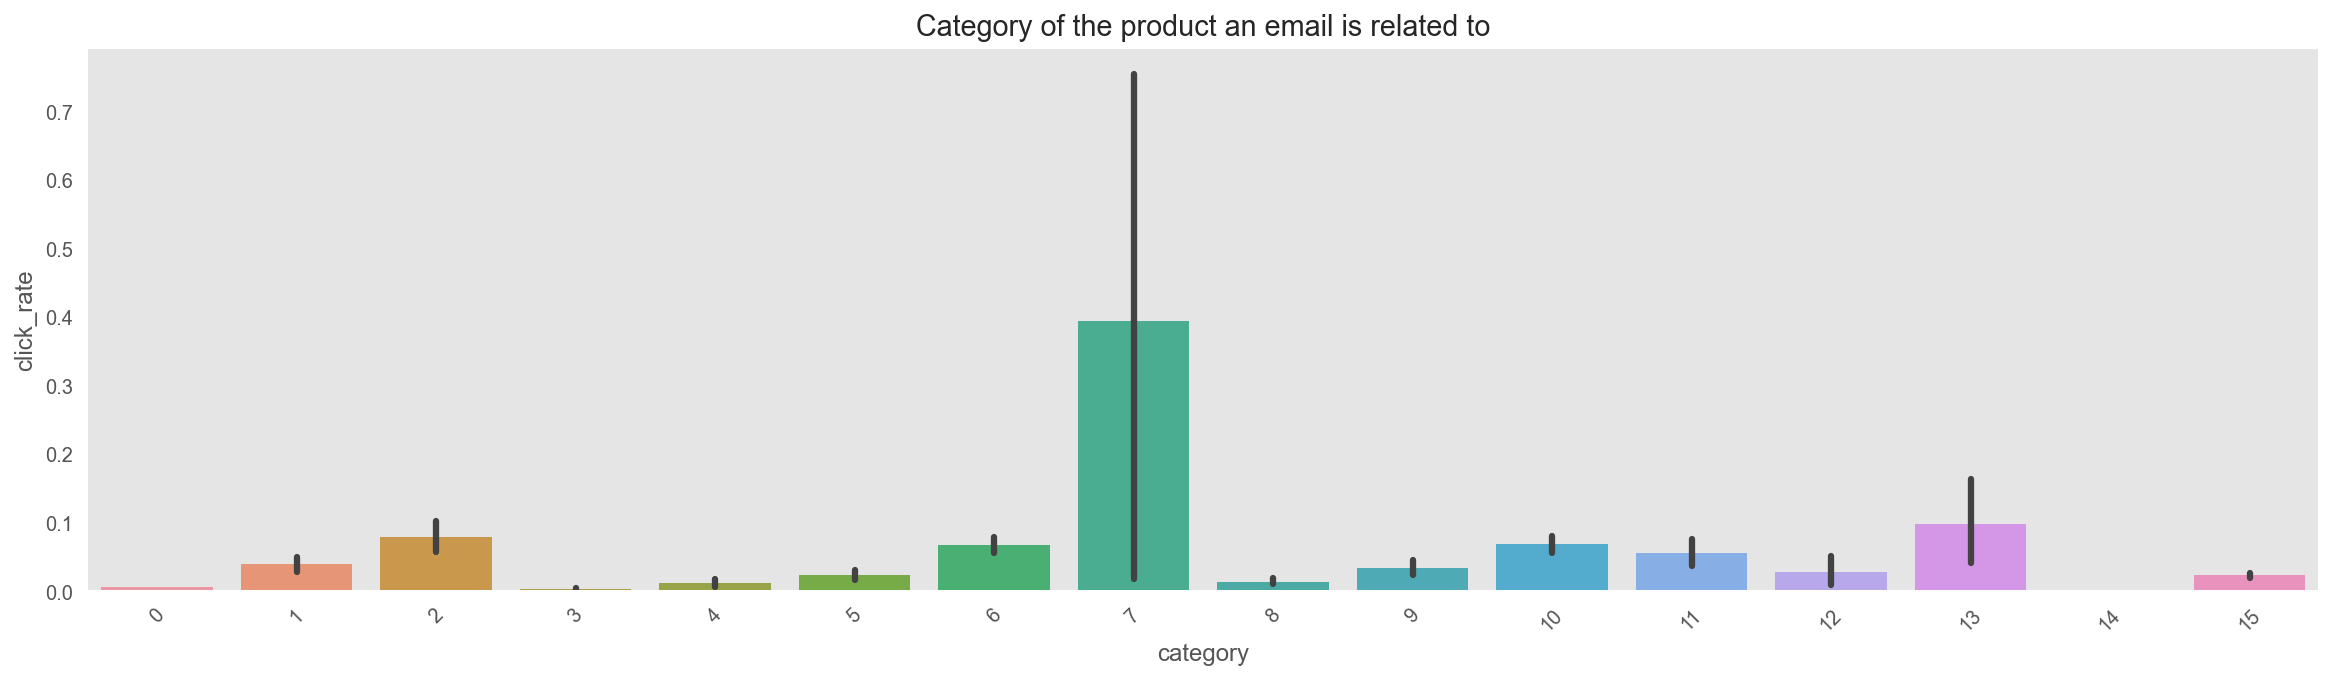

In [167]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='category',y='click_rate',data=df_train)
plt.grid(axis='y')
plt.title('Category of the product an email is related to')
plt.xlabel('category')
plt.ylabel('click_rate')
plt.xticks(rotation=45)

#### Inference:
- If the product is related to 7th category we can get good click_rate.

In [168]:
df_train['product'].unique()

array([26, 11,  9, 10,  5, 13, 12,  6,  1, 31, 27, 42, 34, 23, 19, 16, 22,
       28,  3,  7, 18, 20, 43,  0, 21, 39,  4,  2,  8, 41, 24, 36, 25, 35,
       40, 38, 14, 33, 37, 32, 17, 15, 29], dtype=int64)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '31'),
  Text(31, 0, '32'),
  Text(32, 0, '33'),
  Text(33, 0, '34'),
  Text(34, 0, '35'),
  Text(35, 0, '36'),
  Text(36, 0, '37'),
  Text(37, 0, '38'),
  Text(38, 0, '39'),
  T

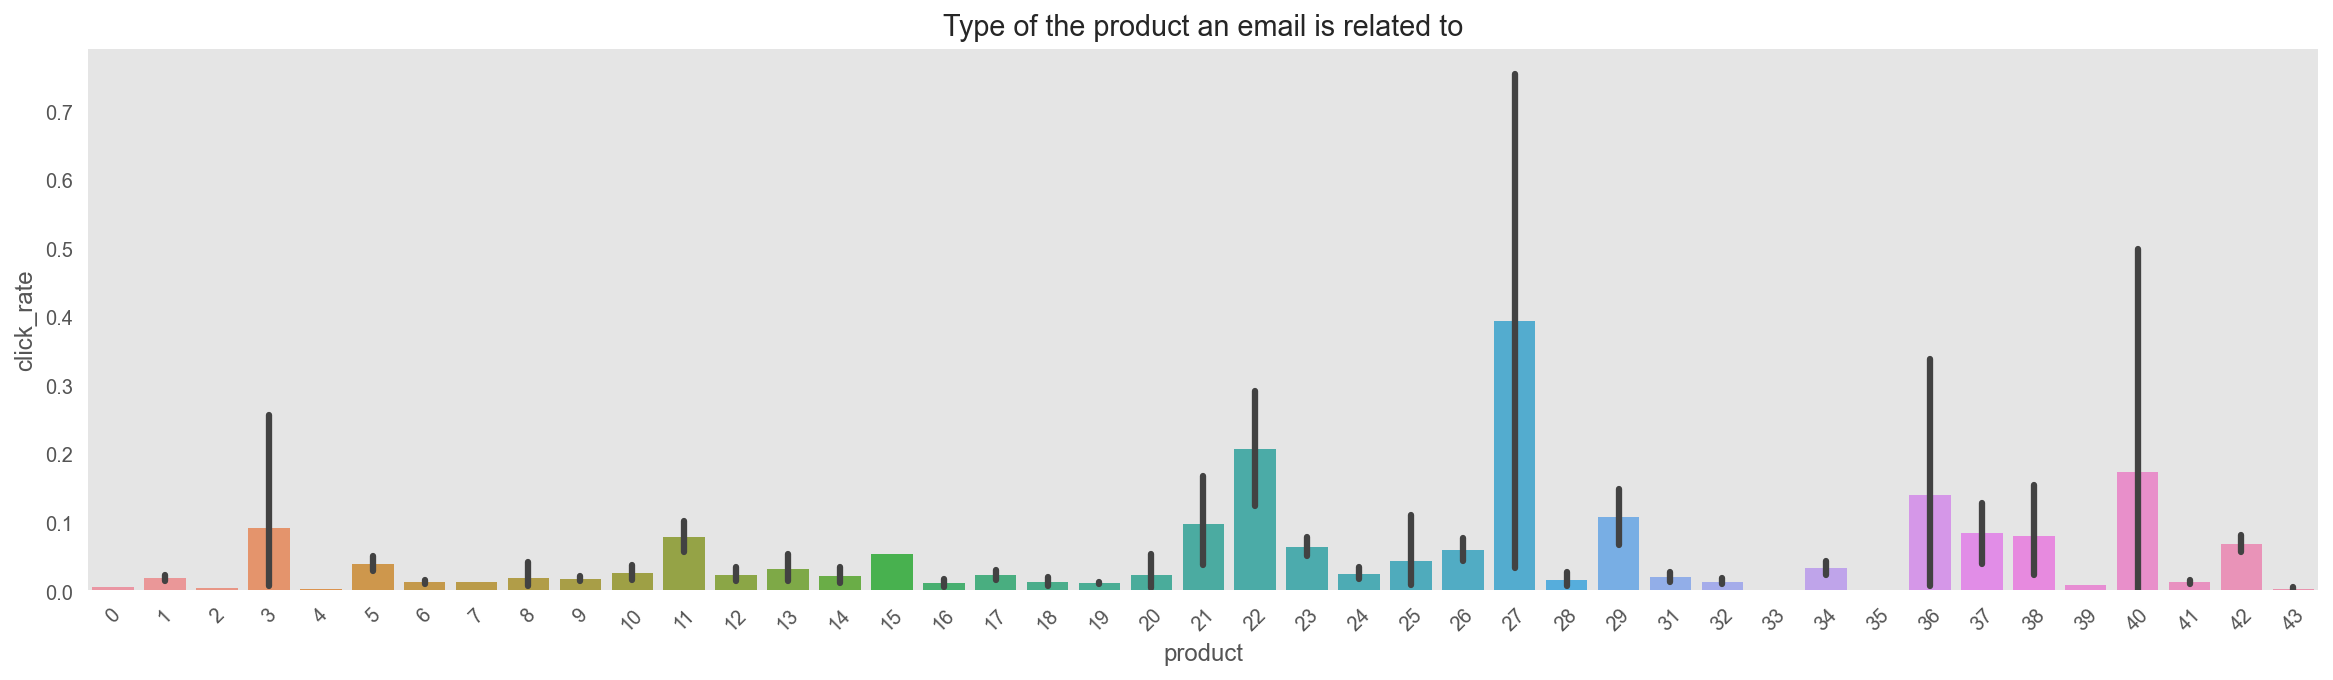

In [169]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='product',y='click_rate',data=df_train)
plt.grid(axis='y')
plt.title('Type of the product an email is related to')
plt.xlabel('product')
plt.ylabel('click_rate')
plt.xticks(rotation=45)

#### Inference:
- If the product of an email is related to 27th the click_rate will be high. Than on 22nd, 36th and 40th product we can get good amount of click_rate. The company should focus on these product to get good click_rate from the customer. 

In [170]:
df_train['is_image'].unique()

array([0, 1, 2, 6, 3, 4], dtype=int64)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '6')])

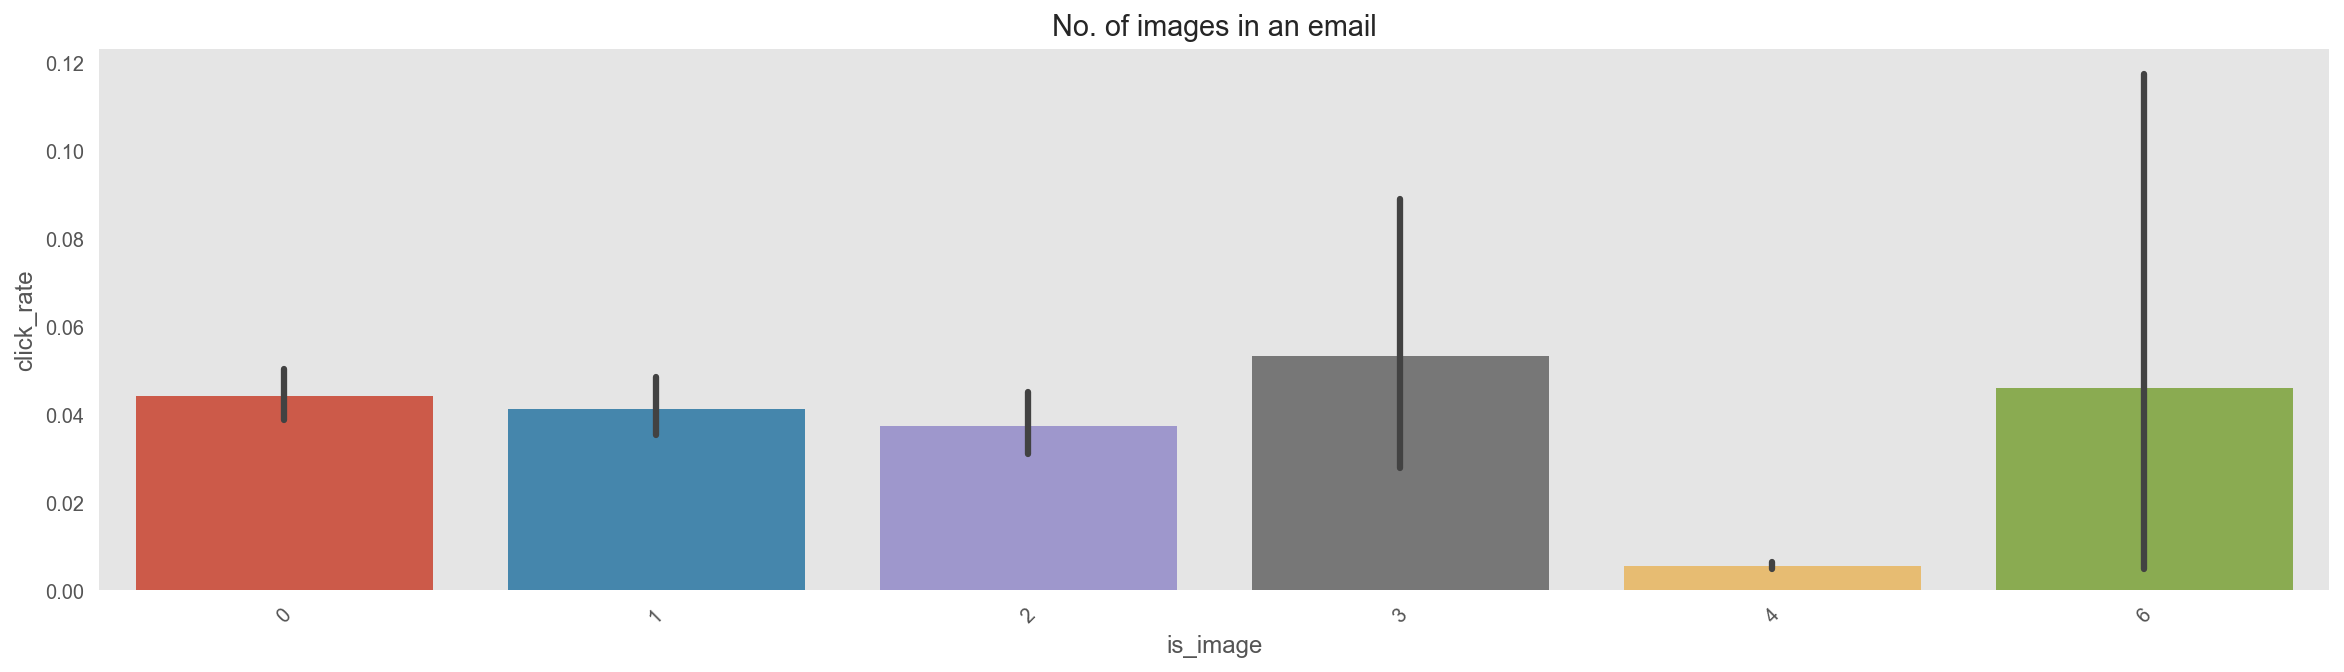

In [171]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='is_image',y='click_rate',data=df_train)
plt.grid(axis='y')
plt.title('No. of images in an email')
plt.xlabel('is_image')
plt.ylabel('click_rate')
plt.xticks(rotation=45)

#### Inference:
- On an average we can get good click rate except for the no of image is 4, we need to find why they are not giving us good result may be because of body len or some other factors. The company should change the structure of the email if it consists the 4 image to more fascinate the customer.   

In [172]:
df_train['is_personalised'].unique()

array([0, 1], dtype=int64)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

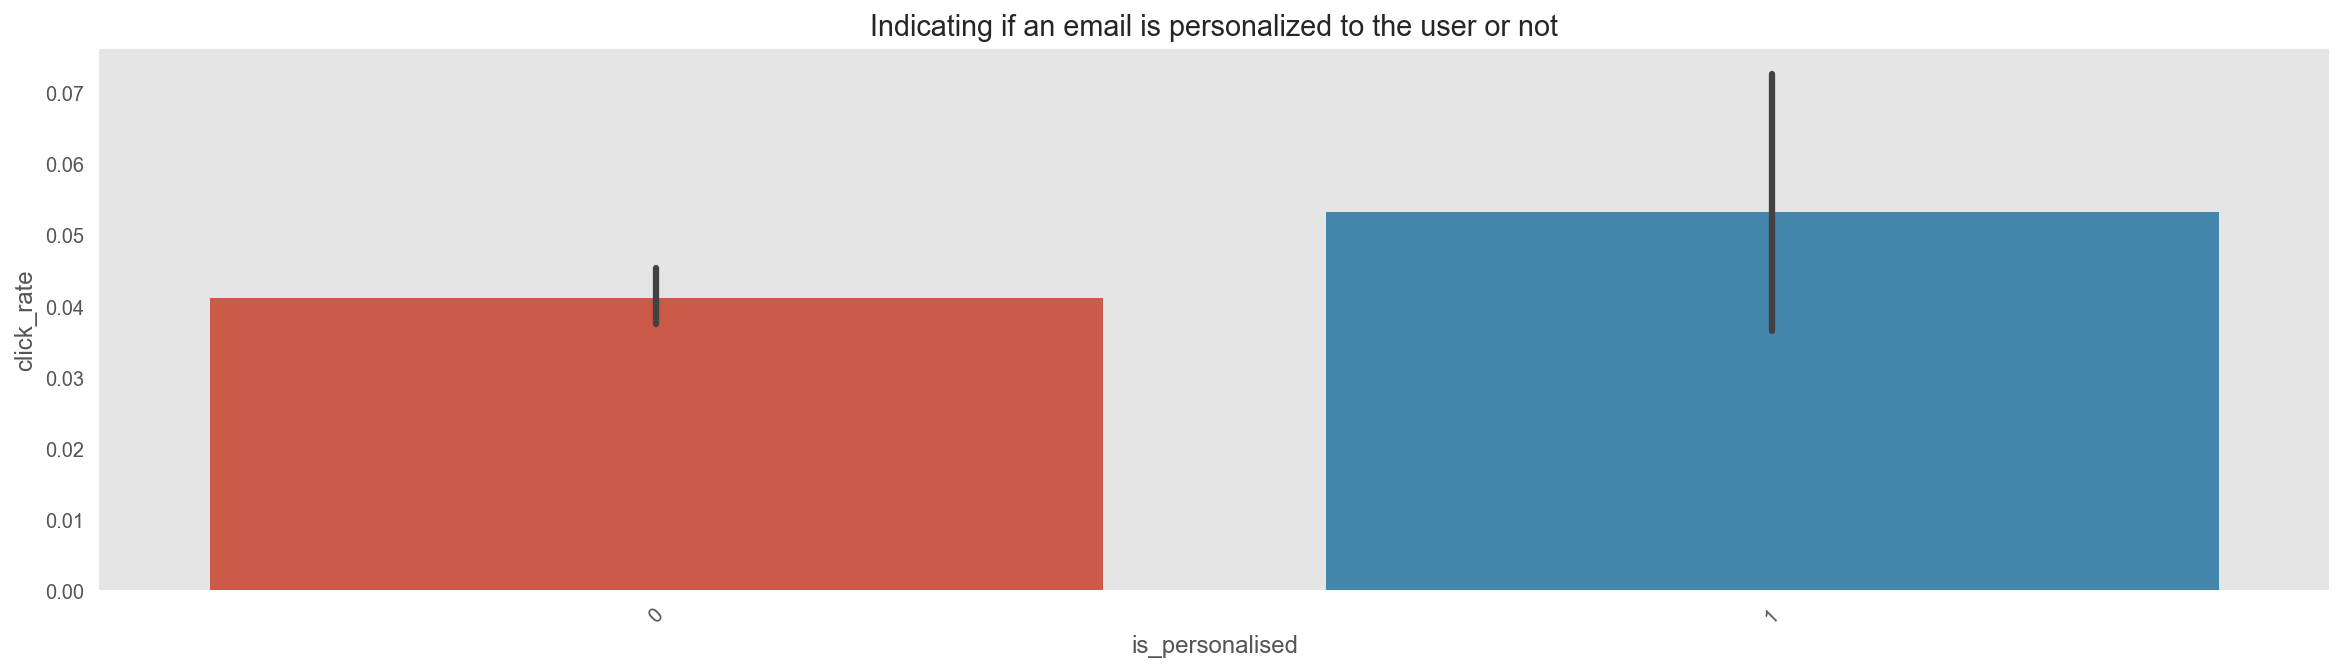

In [173]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='is_personalised',y='click_rate',data=df_train)
plt.grid(axis='y')
plt.title('Indicating if an email is personalized to the user or not')
plt.xlabel('is_personalised')
plt.ylabel('click_rate')
plt.xticks(rotation=45)

#### Inference:
- So the customer are keen towards there personalised email, this is the nature of human being the things interested to them will be good for the company.

In [174]:
df_train['is_quote'].unique()

array([0, 1, 2, 3, 4, 6, 5], dtype=int64)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

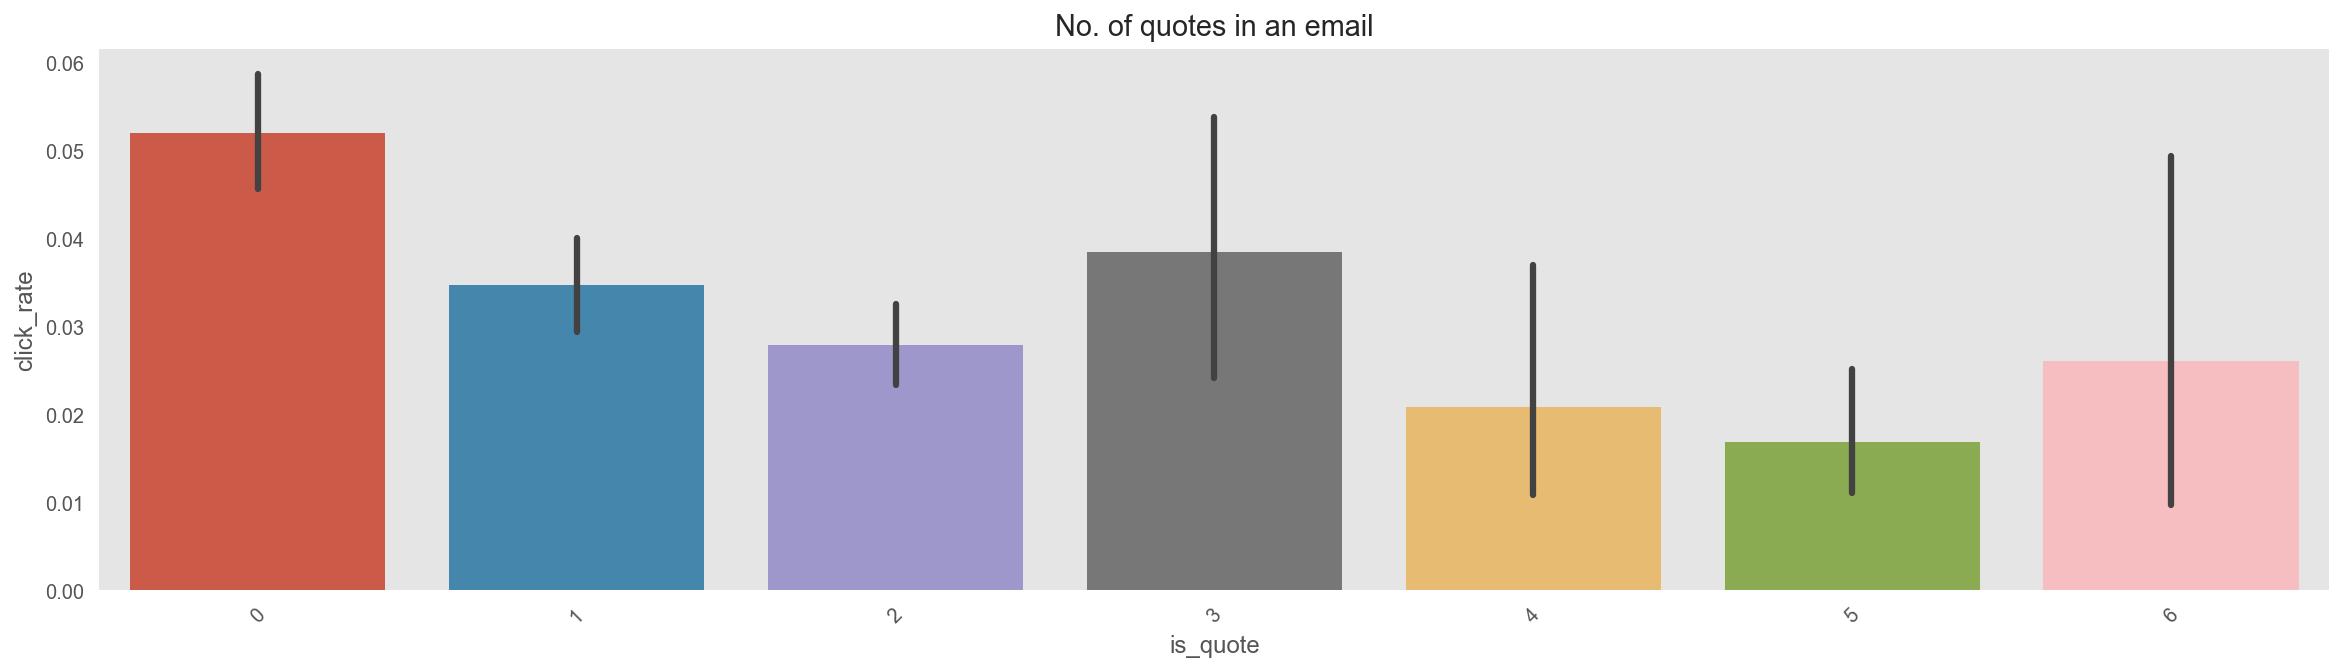

In [175]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='is_quote',y='click_rate',data=df_train)
plt.grid(axis='y')
plt.title('No. of quotes in an email')
plt.xlabel('is_quote')
plt.ylabel('click_rate')
plt.xticks(rotation=45)

#### Inference:
- Everything has been gone to worse, as i was thinking if there are more quote the people will enjoy more, but here its totally different the less the quotes in the email we can get good click_rate. 

In [176]:
df_train['is_emoticons'].unique()

array([0, 2, 1, 3, 4, 6], dtype=int64)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '6')])

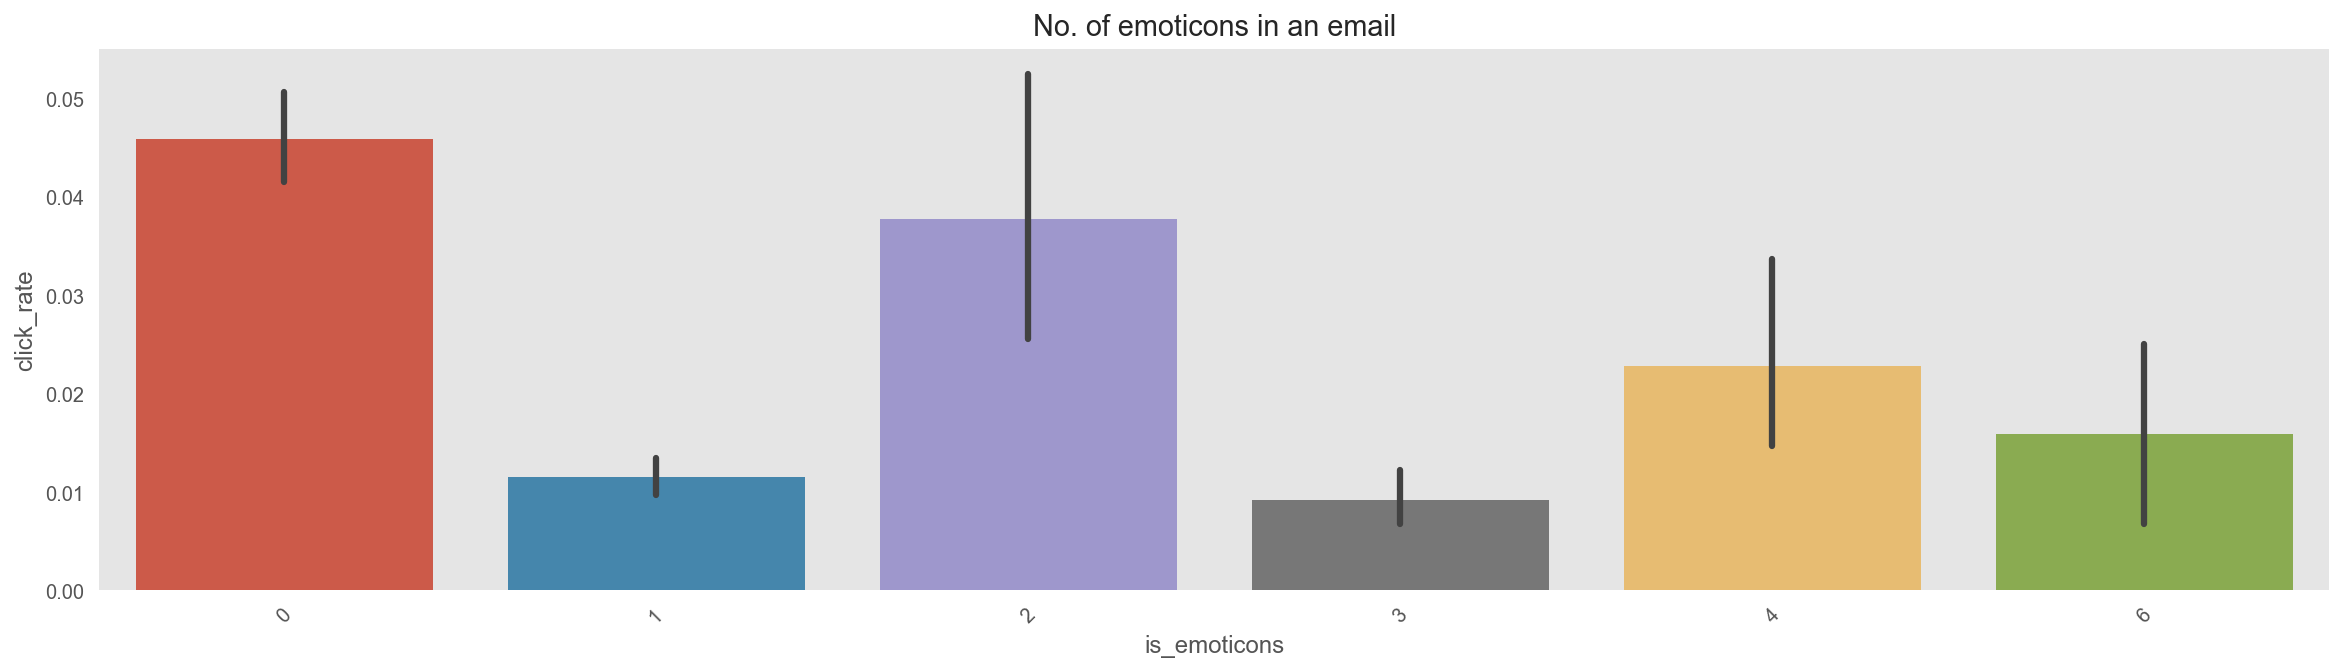

In [177]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='is_emoticons',y='click_rate',data=df_train)
plt.grid(axis='y')
plt.title('No. of emoticons in an email')
plt.xlabel('is_emoticons')
plt.ylabel('click_rate')
plt.xticks(rotation=45)

#### Inference:
- If the no. of emoticons in the email are nill thats good for us, by looking at the barplot we can say we need to be on average to get good click rate.

In [178]:
df_train['is_discount'].unique()

array([0, 1], dtype=int64)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

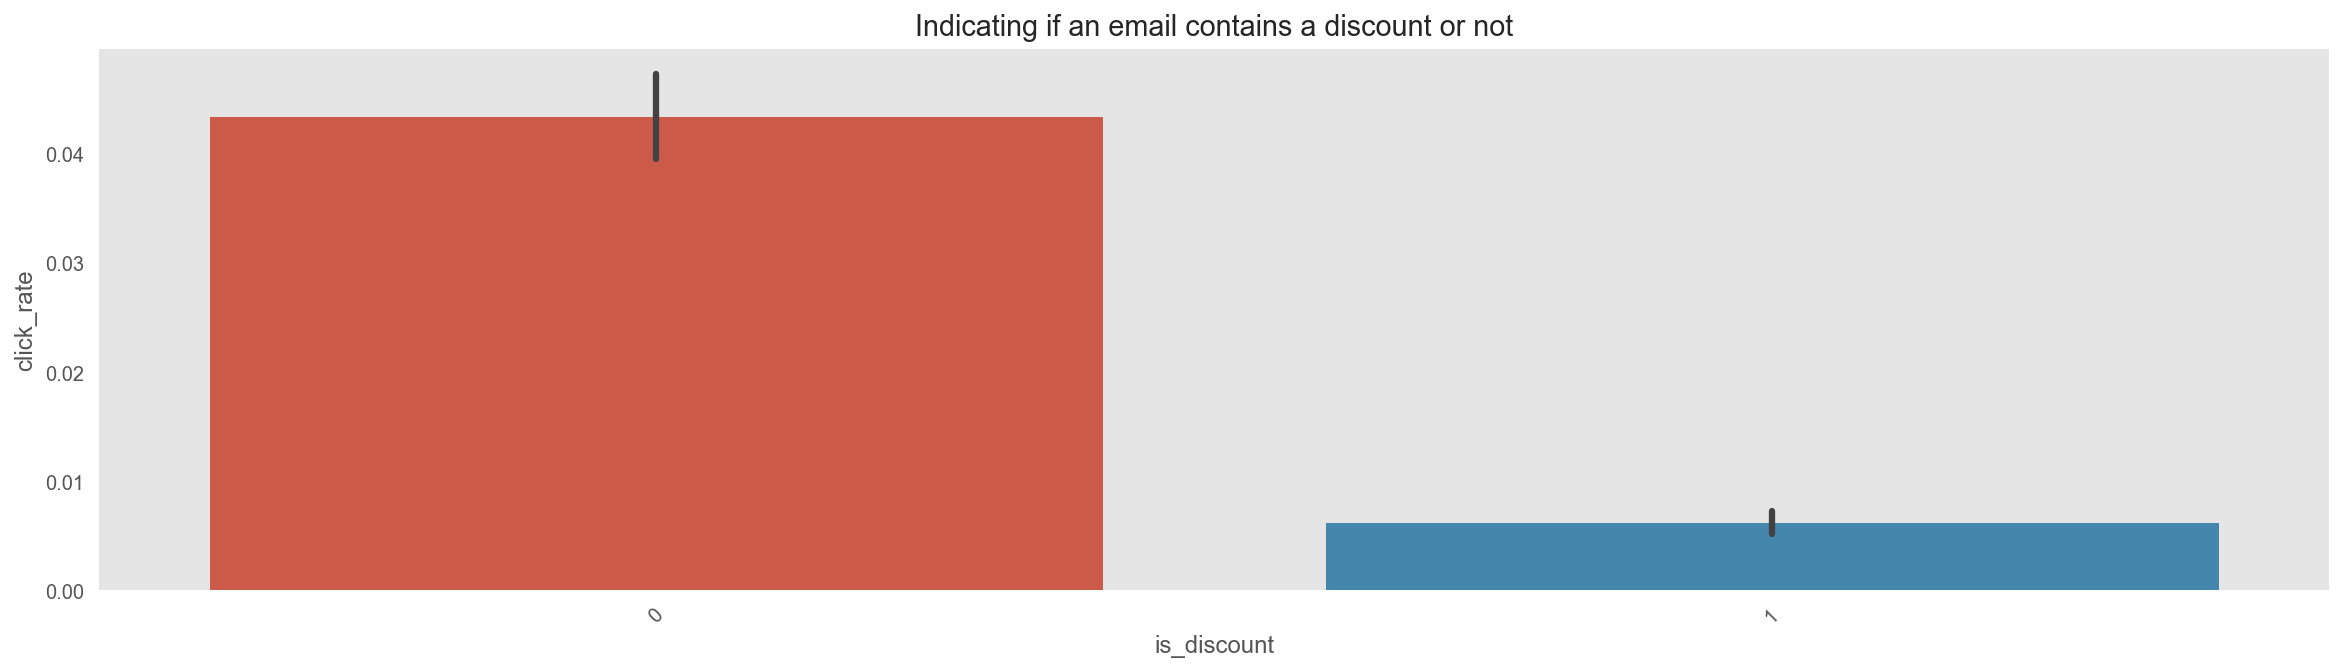

In [179]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='is_discount',y='click_rate',data=df_train)
plt.grid(axis='y')
plt.title('Indicating if an email contains a discount or not')
plt.xlabel('is_discount')
plt.ylabel('click_rate')
plt.xticks(rotation=45)

#### Inference:
- The barplot shows if the discount is not there in the email we can get very large click_rate. But to my personal thinking who don't like discount everybody does, the company needs to again recheck the data from the campaign.

In [180]:
df_train['is_price_bool'].unique()

array([0, 1])

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

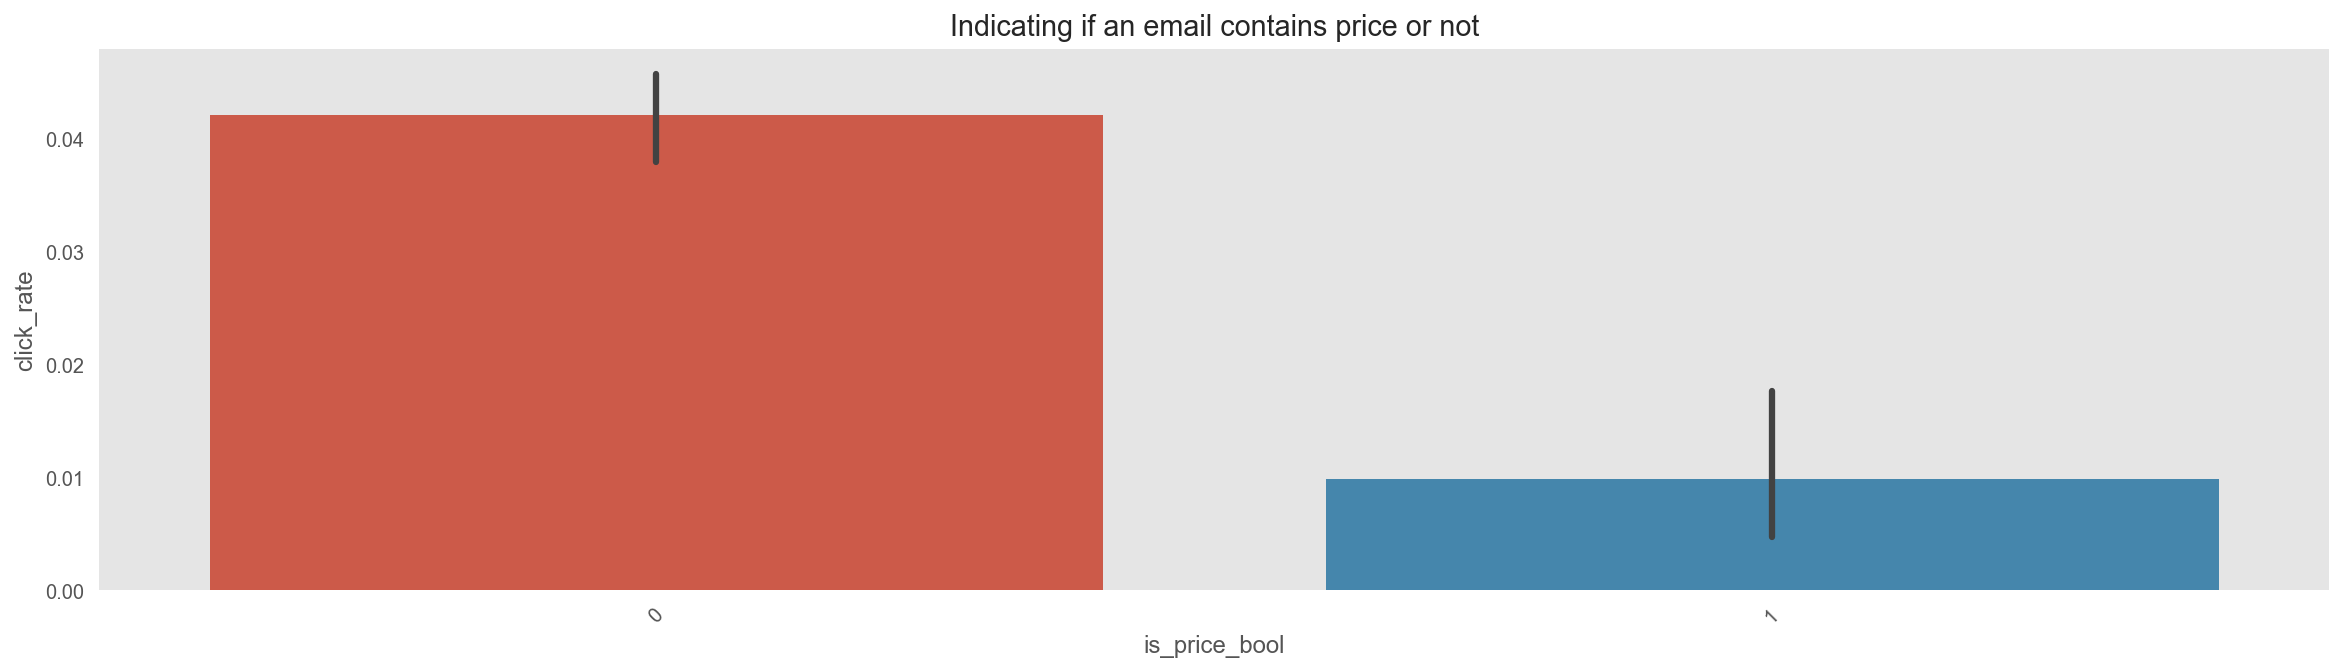

In [181]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='is_price_bool',y='click_rate',data=df_train)
plt.grid(axis='y')
plt.title('Indicating if an email contains price or not')
plt.xlabel('is_price_bool')
plt.ylabel('click_rate')
plt.xticks(rotation=45)

#### Inference:
- If the email do not contain price the click rate will be high.

In [182]:
df_train['is_urgency'].unique()

array([0, 1], dtype=int64)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

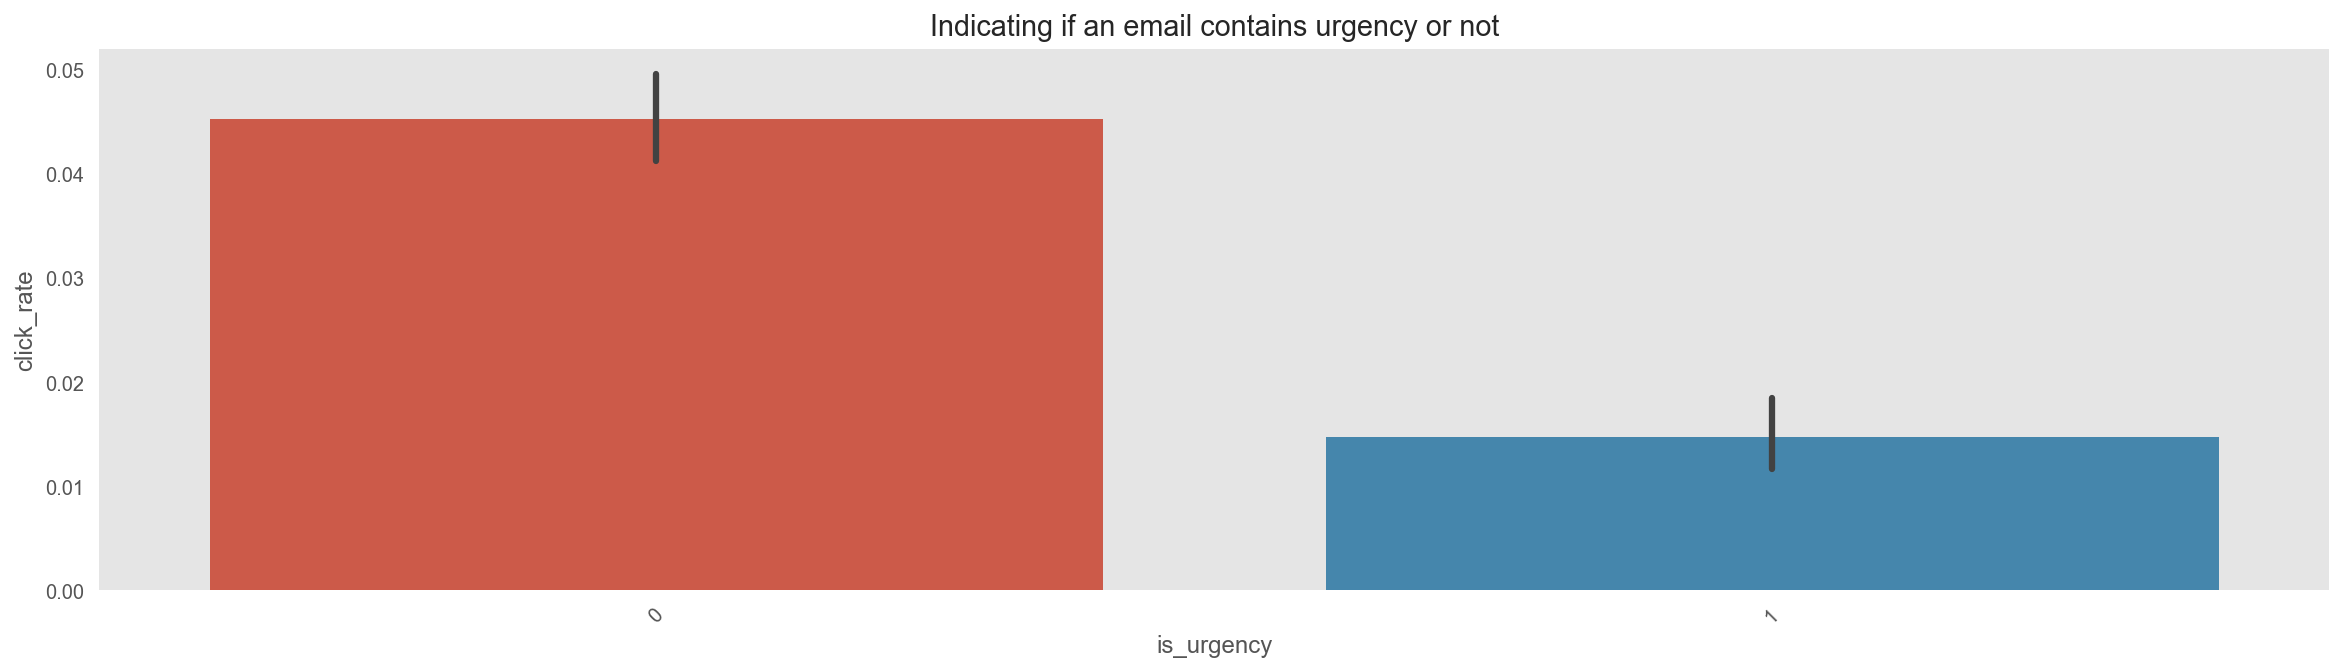

In [183]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='is_urgency',y='click_rate',data=df_train)
plt.grid(axis='y')
plt.title('Indicating if an email contains urgency or not')
plt.xlabel('is_urgency')
plt.ylabel('click_rate')
plt.xticks(rotation=45)

#### Inference:
- If the email doesn't consist urgency we can get higher click rate.

In [184]:
df_train['target_audience'].unique()

array([14, 10, 16, 13,  6, 15, 12,  0,  4, 11,  1,  5,  7,  2,  3,  8,  9],
      dtype=int64)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16')])

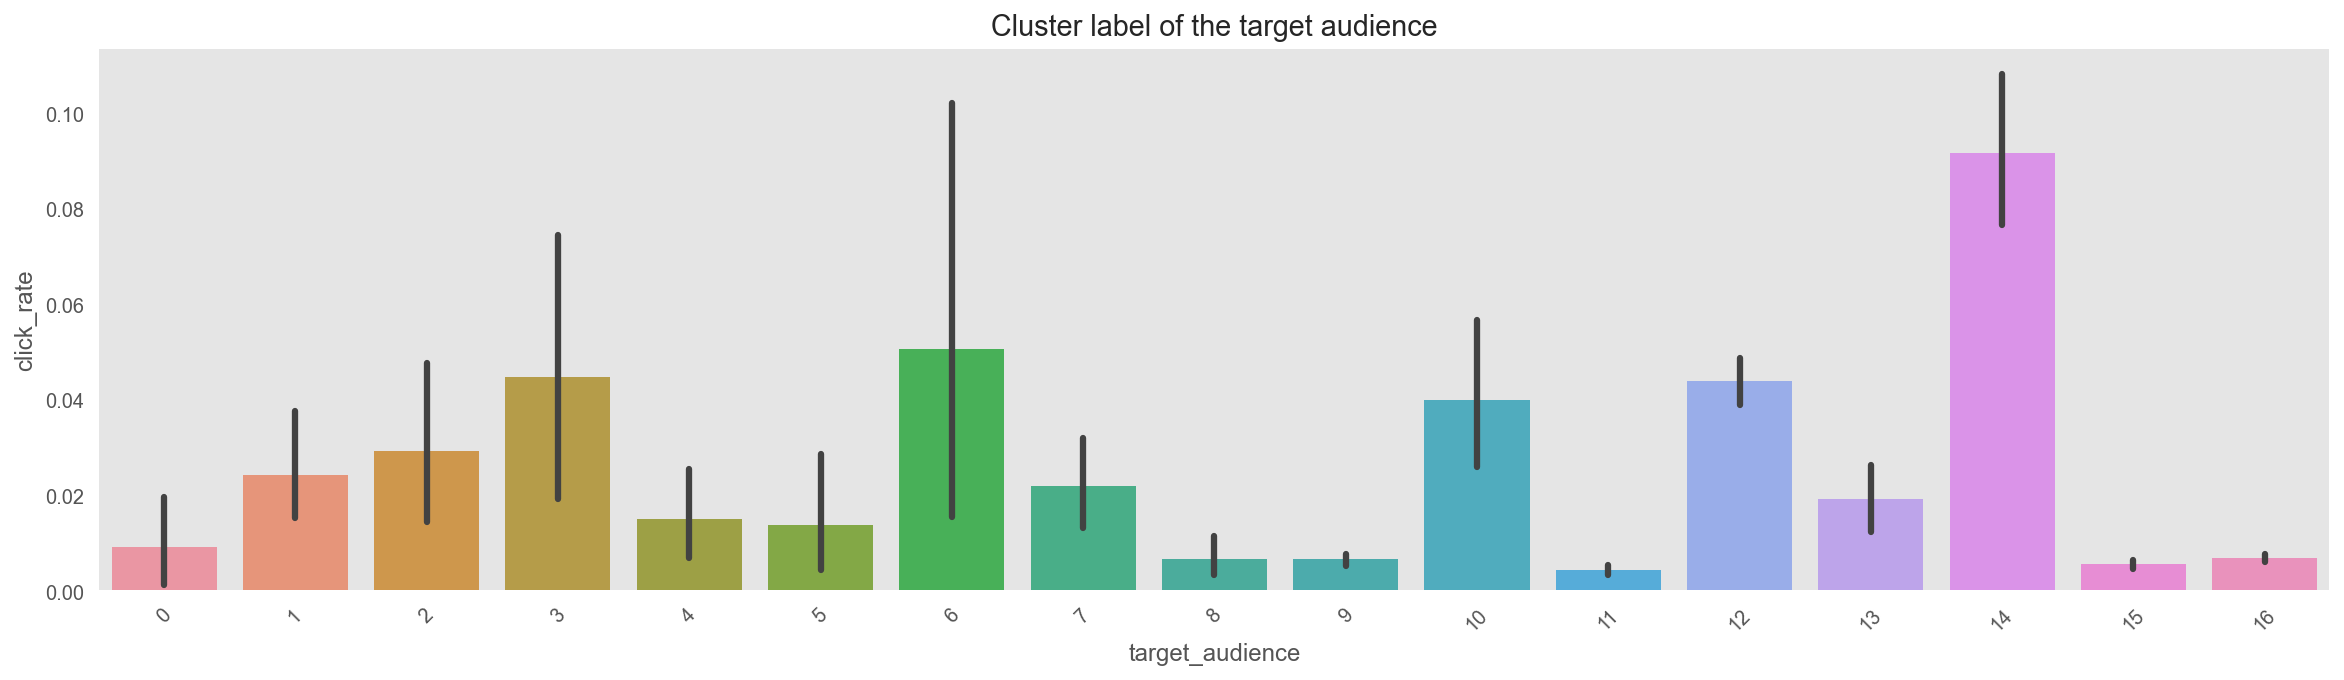

In [185]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='target_audience',y='click_rate',data=df_train)
plt.grid(axis='y')
plt.title('Cluster label of the target audience')
plt.xlabel('target_audience')
plt.ylabel('click_rate')
plt.xticks(rotation=45)

#### Inference:
- The cluster label of the target audience is 14 they are giving us good click rate. 

In [186]:
df_train['no_of_CTA'].unique()

array([ 3,  0,  4,  2,  9,  8,  6,  5, 11,  1, 12,  7, 10, 15, 16, 13, 17,
       23, 14, 41, 44, 30, 27, 25, 33, 24, 20, 19, 18, 26, 32, 39, 37, 38,
       40, 31, 28, 34, 49, 36], dtype=int64)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '23'),
  Text(22, 0, '24'),
  Text(23, 0, '25'),
  Text(24, 0, '26'),
  Text(25, 0, '27'),
  Text(26, 0, '28'),
  Text(27, 0, '30'),
  Text(28, 0, '31'),
  Text(29, 0, '32'),
  Text(30, 0, '33'),
  Text(31, 0, '34'),
  Text(32, 0, '36'),
  Text(33, 0, '37'),
  Text(34, 0, '38'),
  Text(35, 0, '39'),
  Text(36, 0, '40'),
  Text(37, 0, '41'),
  Text(38, 0, '44'),
  Text(39, 0, '

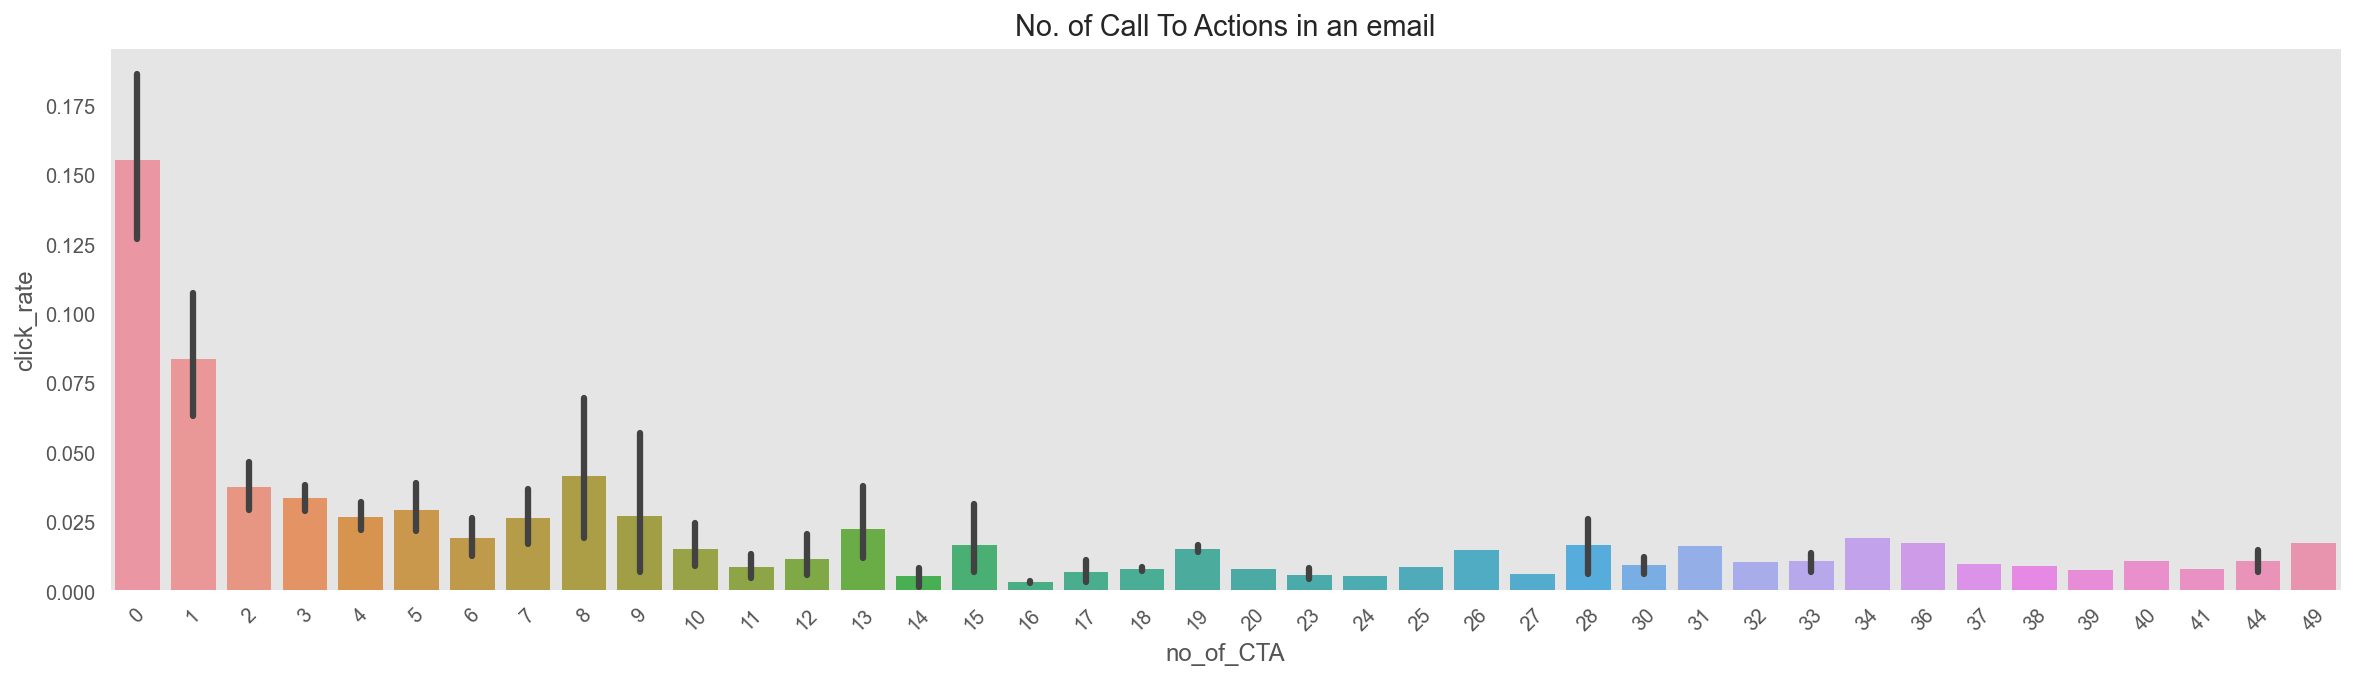

In [187]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='no_of_CTA',y='click_rate',data=df_train)
plt.grid(axis='y')
plt.title('No. of Call To Actions in an email')
plt.xlabel('no_of_CTA')
plt.ylabel('click_rate')
plt.xticks(rotation=45)

#### Inference:
- If the no of call to action in an email is less the click_rate is high.

Text(0.5, 1.0, 'times_of_day_ID')

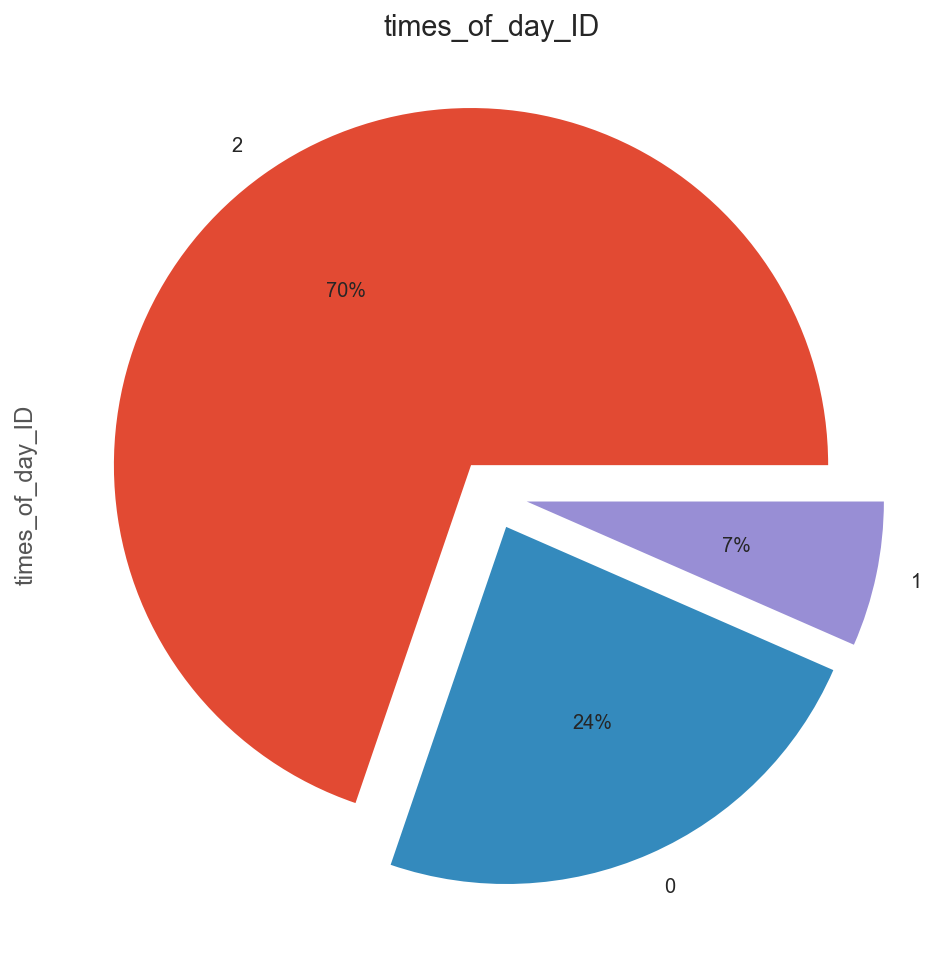

In [188]:
df_train['times_of_day_ID'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1))
plt.title('times_of_day_ID')

#### Inference:
- 0 represent Noon, 1 represent Morning, 2 represent Evening. From the above pie chart if the email are sent in the evening the click rate is high.

# Checking Skewness

In [189]:
numeric_feats=['sender', 'subject_len', 'body_len', 'mean_paragraph_len',
               'day_of_week', 'is_weekend', 'category', 'product', 'no_of_CTA',
               'mean_CTA_len', 'is_image', 'is_personalised', 'is_quote',
               'is_emoticons', 'is_discount', 'is_urgency', 'target_audience',
               'click_rate', 'times_of_day_ID', 'is_price_bool']

In [190]:
# Check the skew of all numerical features
skewed_feats = df_train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
is_price_bool,11.926345
is_discount,4.713247
no_of_CTA,4.477650
click_rate,4.314312
mean_paragraph_len,4.301295
is_personalised,3.834702
is_emoticons,3.754935
mean_CTA_len,2.884637
is_urgency,2.456044
sender,2.172929


#### Inference:
* As rule of thumb, skewness can be interpreted like this: 
|        |          |
| :--- | :--- |
| **Fairly Symmetrical** | -0.5 to 0.5 |
| **Moderate Skewed** | -0.5 to -1.0 and 0.5 to 1.0 |
| **Highly Skewed** | < -1.0 and > 1.0 |

- All the feature which are greater than 1.0 that means they are highly skewed. And less than -1.

# Calculate The VIF Value For Multicollinearity Check

Removing multicollinearity is an essential step before we can interpret the ML model. Multicollinearity is a condition where a predictor variable correlates with another predictor. Although multicollinearity doesn’t affect the model’s performance, it will affect the interpretability. If we don’t remove the multicollinearity, we will never know how much a variable contributes to the result. 

VIF is a number that determines whether a variable has multicollinearity or not. That number also represents how much a variable is inflated because of the linear dependence with other variables.

The VIF value starts from 1, and it has no upper limit. If the number gets larger, it means the variable has huge multicollinearity on it.

For calculating the VIF, we will do a linear regression process for each variable, where that variable will become a target variable. After we do that process, we calculate the R square from it. And finally, we calculate the VIF value with this formula VIF=1/(1-R^2)

In [191]:
X = df_train[list(df_train.columns)]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
16,11.866314,target_audience
1,11.798329,subject_len
2,9.642135,body_len
9,7.847777,mean_CTA_len
4,7.216812,day_of_week
6,5.515219,category
18,4.137857,times_of_day_ID
0,3.384522,sender
3,3.228488,mean_paragraph_len
7,3.153485,product


#### Inference:
- As we can see from above, almost top six variables have a VIF value above 5. To remove multicollinearities, we can do two things. We can create new features or remove them from our data. But over here we will keep this as it is as the multicollinearities are ok.

# WEIGHT OF EVIDENCE (WOE) AND INFORMATION VALUE (IV) 

### Importance of Feature Selection
In this digital era, we are equipped with a humongous amount of data. However, not all features available to us are useful in every model prediction. Choosing the right features for our model is of utmost importance. Features are selected based on the predictive strength of the feature. We can quantify the predictive power of a feature using the concept of information value. 

### What is Weight of Evidence (WOE)?
The weight of evidence tells the predictive power of an independent variable in relation to the dependent variable.The weight of evidence tells the predictive power of a single feature concerning its independent feature. If any of the categories/bins of a feature has a large proportion of events compared to the proportion of non-events, we will get a high value of WoE which in turn says that that class of the feature separates the events from non-events.
- WoE values for the various categories of a categorical variable can be used to impute a categorical feature and convert it into a numerical feature.
- if a continuous feature does not have a linear relationship with the log odds, the feature can be binned into groups and a new feature created by replaced each bin with its WoE value can be used instead of the original feature.
- WoE is better than one-hot encoding as one-hot encoding will need you to create h-1 new features to accommodate one categorical feature with h categories. This implies that the model will not have to predict h-1 coefficients (bi) instead of 1. However, in WoE variable transformation, we will need to calculate a single coefficient for the feature in consideration.


### What is Information Value (IV)?
The WoE value, the WoE value tells us the predictive power of each bin of a feature. However, a single value representing the entire feature’s predictive power will be useful in feature selection. Note that the term (percentage of events – the percentage of non-events) follows the same sign as WoE hence ensuring that the IV is always a positive number.

The IV value measures the variable's ability to predict.

Relationship between IV value and predictive power

|        |          |
| :--- | :---: |
|IV	|Ability to predict|
|<0.02|	Almost no predictive power|
|0.02~0.1|	weak predictive power|
|0.1~0.3|	Moderate predictive power|
|0.3~0.5|	Strong predictive power|
|>0.5	|Predictive power is too strong, need to check variables|

## Conclusion
1. WoE helps check the linear relationship of a feature with its dependent feature to be used in the model.
2. WoE is a good variable transformation method for both continuous and categorical features.
3. WoE is better than on-hot encoding as this method of variable transformation does not increase the complexity of the model.
4. IV is a good measure of the predictive power of a feature and it also helps point out the suspicious feature.


In [192]:
# Data Split for Predictors and Target
X = df_train.drop(['click_rate'], axis = 1)
y = df_train['click_rate']

print('X Shape:', X.shape)
print('y Shape:', y.shape)

X Shape: (1888, 19)
y Shape: (1888,)


In [193]:
timer_depth = -1
@contextmanager
def timer(name):
    t0 = time.time()
    global timer_depth
    timer_depth += 1
    yield
    pid = os.getpid()
    py = psutil.Process(pid)
    memoryUse = py.memory_info()[0] / 2. ** 30
    print('----'*timer_depth + f'>>[{name}] done in {time.time() - t0:.0f} s ---> memory used: {memoryUse:.4f} GB', '')
    if(timer_depth == 0):
        print('\n')
    timer_depth -= 1

In [194]:
def cal_woe(app_train, app_train_target):
    num_events = app_train_target.sum()
    num_non_events = app_train_target.shape[0] - app_train_target.sum()

    feature_list = []
    feature_iv_list = []
    for col in app_train.columns:
        if app_train[col].unique().shape[0] == 1:
            del app_train[col]
            print('remove constant col', col)

        with timer('cope with %s' % col):
            feature_list.append(col)

            woe_df = pd.DataFrame()
            woe_df[col] = app_train[col]
            woe_df['target'] = app_train_target
            events_df = woe_df.groupby(col)['target'].sum().reset_index().rename(columns={'target' : 'events'})
            events_df['non_events'] = woe_df.groupby(col).count().reset_index()['target'] - events_df['events']
            def cal_woe(x):
                return np.log( ((x['non_events']+0.5)/num_non_events) / ((x['events']+0.5)/num_events)  )
            events_df['WOE_'+col] = events_df.apply(cal_woe, axis=1)

            def cal_iv(x):
                return x['WOE_'+col]*(x['non_events'] / num_non_events - x['events'] / num_events)
            events_df['IV_'+col] = events_df.apply(cal_iv, axis=1)

            feature_iv = events_df['IV_'+col].sum()
            feature_iv_list.append(feature_iv)

            events_df = events_df.drop(['events', 'non_events', 'IV_'+col], axis=1)
            app_train = app_train.merge(events_df, how='left', on=col)
    iv_df = pd.DataFrame()
    iv_df['feature'] = feature_list
    iv_df['IV'] = feature_iv_list
    iv_df = iv_df.sort_values(by='IV', ascending=False)
    return app_train, iv_df

In [195]:
with timer('calculate WOE and IV'):
    app_train, iv_df = cal_woe(X, y)

---->>[cope with sender] done in 0 s ---> memory used: 0.5283 GB 
---->>[cope with subject_len] done in 0 s ---> memory used: 0.5283 GB 
---->>[cope with body_len] done in 0 s ---> memory used: 0.5283 GB 
---->>[cope with mean_paragraph_len] done in 0 s ---> memory used: 0.5284 GB 
---->>[cope with day_of_week] done in 0 s ---> memory used: 0.5284 GB 
---->>[cope with is_weekend] done in 0 s ---> memory used: 0.5284 GB 
---->>[cope with category] done in 0 s ---> memory used: 0.5284 GB 
---->>[cope with product] done in 0 s ---> memory used: 0.5284 GB 
---->>[cope with no_of_CTA] done in 0 s ---> memory used: 0.5284 GB 
---->>[cope with mean_CTA_len] done in 0 s ---> memory used: 0.5284 GB 
---->>[cope with is_image] done in 0 s ---> memory used: 0.5284 GB 
---->>[cope with is_personalised] done in 0 s ---> memory used: 0.5284 GB 
---->>[cope with is_quote] done in 0 s ---> memory used: 0.5284 GB 
---->>[cope with is_emoticons] done in 0 s ---> memory used: 0.5284 GB 
---->>[cope with 

In [196]:
iv_df

,feature,IV
2,body_len,0.454482
7,product,0.418261
3,mean_paragraph_len,0.392625
8,no_of_CTA,0.351376
9,mean_CTA_len,0.319496
6,category,0.303995
1,subject_len,0.230404
16,target_audience,0.220955
17,times_of_day_ID,0.101789
13,is_emoticons,0.088296


#### Inference:

|        |          |
| :--- | :---: |
|IV	|Ability to predict|
|<0.02|	Almost no predictive power|
|0.02~0.1|	weak predictive power|
|0.1~0.3|	Moderate predictive power|
|0.3~0.5|	Strong predictive power|
|>0.5	|Predictive power is too strong, need to check variables|

- Information Value (IV) is calculated for all features in the extended dataset in order to estimate their potential contribution to detectability
- This is an indicator of feature quality and reasoning for feature selection
- Is_image, is_personalised & is_price are having very less predictive power we can either remove them or use it in our model.

# Feature Importance using Random forest

In [197]:
rf = RandomForestRegressor(n_estimators=50, max_depth=8, min_samples_leaf=4, max_features=0.5, random_state=2018)
rf.fit(df_train.drop(['click_rate'],axis=1), df_train.click_rate)
features = df_train.drop(['click_rate'],axis=1).columns.values

In [198]:
x, y = (list(x) for x in zip(*sorted(zip(rf.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 900, height = 2000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ),
    margin=dict(
    l=300,
),
)

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

#### Inference:
- While comparing the Information value and feature importance, some of the variables are very important for model building. 

# Base Model

- **Ridge** is regression model applying l2 regularization technique.
- **Lasso** stands for Least Absolute Shrinkage and Selection Operator that is a linear regression model applied l1 regularization technique.
- **Elasticnet** is a penalized linear regression model that includes both the L1 and L2 penalties during training.
- **svr** stands for Support Vector Regression is a type of "SVM" model using for regression problem.
- **gbr** is gradient boosting model for regression problem.
- **lgbm** is a fast, distributed, high-performance gradient boosting framework that uses a tree-based learning algorithm.
- **xgboost** is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework.
- **Linear Regression** fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. 
- **RANSAC** is an iterative algorithm for the robust estimation of parameters from a subset of inliers from the complete data set. 
- **SGD** stands for Stochastic Gradient Descent: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate).
- **Decision tree** builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

Following are the algorithms I will use to make the model:

1. Model1: Simple Machine Learning Algorithms.
2. Model2: Cross Validation Technique On ML Algoritms.
3. Model3: Stacking model.
4. Model4: Blending Model.

# Model Evaluation

Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

1𝑛∑𝑖=1𝑛|𝑦𝑖−𝑦̂ 𝑖|

Mean Squared Error (MSE) is the mean of the squared errors:

1𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂ 𝑖)2

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

1𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂ 𝑖)

R2 Score  It is pronounced as R squared and is also known as the coefficient of determination. It works by measuring the amount of variance in the predictions explained by the dataset.If the value of the r squared score is 1, it means that the model is perfect and if its value is 0, it means that the model will perform badly on an unseen dataset.If your value of R2  is large, you have a better chance of your regression model fitting the observations. 

R2= Variance explained by the model/Total Variance

Comparing these metrics:

MAE is the easiest to understand, because it's the average error. MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world. RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units. All of these are loss functions, because we want to minimize them.


# Power Transformation & Data Splitting

## Train | Test Split and Scaling

**TASK: Separate the features from the labels into 2 objects, X and y.**

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [199]:
df_copy= df_train.copy()

In [200]:
X= df_copy.drop('click_rate', axis=1)
y= df_copy[['click_rate']]

In [201]:
col1=X.columns
col2=y.columns

In [202]:
# perform a box-cox transform of the dataset
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline1 = Pipeline(steps=[('s', scaler),('p', power)])
dataset1 = pipeline1.fit_transform(X)

In [203]:
# convert the array back to a dataframe
train = pd.DataFrame(dataset1, columns=col1)
train

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_urgency,target_audience,times_of_day_ID,is_price_bool
0,-0.392866,-0.242066,-0.429061,0.627285,1.212908,2.001988,-0.857339,0.843174,-0.120703,0.018627,-1.159572,-0.245109,-0.999015,-0.401409,-0.203391,-0.355657,0.960412,-1.628039,-0.083267
1,-0.392866,-1.266007,-2.204646,2.415267,1.212908,2.001988,-1.417931,-0.390021,-2.087462,-0.749373,-1.159572,-0.245109,-0.999015,-0.401409,-0.203391,-0.355657,-0.829449,-1.067975,-0.083267
2,-0.392866,-1.010141,-0.031599,-1.237258,1.212908,2.001988,-1.417931,-0.390021,-0.120703,-0.631101,0.277850,-0.245109,0.542263,-0.401409,-0.203391,-0.355657,2.266008,-1.628039,-0.083267
3,-0.392866,-0.325018,-0.323693,0.064933,0.683275,-0.499503,1.003446,-0.618355,0.311392,-0.515829,-1.159572,-0.245109,-0.999015,-0.401409,-0.203391,-0.355657,-0.829449,0.653122,-0.083267
4,-0.392866,-0.081521,-0.506581,-0.163708,1.212908,2.001988,-0.857339,0.843174,-0.120703,0.214377,-1.159572,-0.245109,0.542263,-0.401409,-0.203391,-0.355657,0.960412,-1.628039,-0.083267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,-0.392866,0.219478,-2.532564,1.775547,-0.438869,-0.499503,-1.417931,-0.390021,-2.087462,-0.749373,-1.159572,-0.245109,0.542263,-0.401409,-0.203391,-0.355657,-0.829449,-1.628039,-0.083267
1884,-0.392866,-1.060126,-0.411561,0.680016,-0.438869,-0.499503,-1.417931,-0.390021,0.666901,-0.187112,-1.159572,-0.245109,-0.999015,-0.401409,-0.203391,-0.355657,-0.469057,0.653122,-0.083267
1885,-0.392866,0.255329,-0.321440,-0.245276,-1.038539,-0.499503,1.003446,-0.618355,0.311392,-0.082956,-1.159572,-0.245109,-0.999015,-0.401409,-0.203391,-0.355657,-1.832085,0.653122,-0.083267
1886,-0.392866,-1.060126,-0.411561,0.680016,-1.038539,-0.499503,-1.417931,-0.390021,0.666901,-0.187112,-1.159572,-0.245109,-0.999015,-0.401409,-0.203391,-0.355657,2.266008,0.653122,-0.083267


In [204]:
# perform a box-cox transform of the dataset
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline2 = Pipeline(steps=[('s', scaler),('p', power)])
dataset2 = pipeline2.fit_transform(y)

In [205]:
# convert the array back to a dataframe
test_y = pd.DataFrame(dataset2, columns=col2)
test_y

,click_rate
0,1.755621
1,2.108672
2,-0.952782
3,-0.440526
4,1.949498
...,...
1883,2.104861
1884,-0.819688
1885,-0.593071
1886,-0.375659


In [206]:
X_train, X_test, y_train, y_test = train_test_split(train,test_y, test_size=0.3, random_state=101)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (1321, 19) (1321, 1)
Testing Data Shape: (567, 19) (567, 1)


# Model Building

# Model1- Simple Machine Learning Algorithms

In [207]:
# Choosing the best model among the tree based models
MAE_test_scale_2 = []
MAE_train_scale_2 = []
RMSE_test_scale_2 = []
RMSE_train_scale_2 =[]
R2_score_train_2=[]
R2_score_test_2=[]

params = {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 2,'learning_rate': 0.05, 'loss': 'ls'}
GBoostReg = ensemble.GradientBoostingRegressor(**params)

MLA= [LinearRegression(), RANSACRegressor(), Ridge(), Lasso(), ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01),
          SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000),
          DecisionTreeRegressor(random_state = 100), RandomForestRegressor(n_estimators=100, random_state = 0), SVR(kernel='rbf', C=1000000, epsilon=0.001), 
          XGBRegressor(), GBoostReg, lgb.LGBMRegressor(objective='regression',num_leaves=5,learning_rate=0.1, 
                                                         n_estimators=500,max_bin = 55, bagging_fraction = 0.8,
                                                         bagging_freq = 5, feature_fraction = 0.2319,
                                                         feature_fraction_seed=9, bagging_seed=9,
                                                         min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
     ]

for i in MLA:
    model2=i.fit(X_train ,y_train)
    
    # evaluate the model
    test_pred_scale_2 = model2.predict(X_test)
    test_pred_scale_2= test_pred_scale_2.reshape(-1,1)
    train_pred_scale_2 = model2.predict(X_train)
    train_pred_scale_2= train_pred_scale_2.reshape(-1,1)
    
    # evaluate predictions
    MAE_test_scale_2.append(metrics.mean_absolute_error(y_test,test_pred_scale_2))
    MAE_train_scale_2.append(metrics.mean_absolute_error(y_train, train_pred_scale_2))
    RMSE_test_scale_2.append(np.sqrt(metrics.mean_squared_error(y_test,test_pred_scale_2)))
    RMSE_train_scale_2.append(np.sqrt(metrics.mean_squared_error(y_train,train_pred_scale_2)))
    R2_score_test_2.append(metrics.r2_score(y_test,test_pred_scale_2))
    R2_score_train_2.append(metrics.r2_score(y_train,train_pred_scale_2))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


# Model1- Model Comparison or Model Evaluation on the Test & Train Set

In [208]:
result_df_scale_7= pd.DataFrame(MAE_test_scale_2, index= ['LinearRegression', 'RANSACRegressor', 'Ridge', 'Lasso', 
                                                          'ElasticNetCV','SGDRegressor','DecisionTreeRegressor',
                                                          'RandomForestRegressor', 'SVR','XGBRegressor', 'GBoostReg',
                                                          'LGBMRegressor'], 
                              columns=['MAE_test']) 
result_df_scale_8= pd.DataFrame(MAE_train_scale_2, index= ['LinearRegression', 'RANSACRegressor', 'Ridge', 'Lasso', 
                                                          'ElasticNetCV','SGDRegressor','DecisionTreeRegressor',
                                                          'RandomForestRegressor', 'SVR','XGBRegressor', 'GBoostReg',
                                                          'LGBMRegressor'], 
                              columns=['MAE_train'])
result_df_scale_9= pd.DataFrame(RMSE_test_scale_2, index= ['LinearRegression', 'RANSACRegressor', 'Ridge', 'Lasso', 
                                                          'ElasticNetCV','SGDRegressor','DecisionTreeRegressor',
                                                          'RandomForestRegressor', 'SVR','XGBRegressor', 'GBoostReg',
                                                          'LGBMRegressor'], 
                              columns=['RMSE_test'])
result_df_scale_10= pd.DataFrame(RMSE_train_scale_2, index= ['LinearRegression', 'RANSACRegressor', 'Ridge', 'Lasso', 
                                                          'ElasticNetCV','SGDRegressor','DecisionTreeRegressor',
                                                          'RandomForestRegressor', 'SVR','XGBRegressor', 'GBoostReg',
                                                          'LGBMRegressor'], 
                              columns=['RMSE_train'])
result_df_scale_11= pd.DataFrame(R2_score_test_2, index= ['LinearRegression', 'RANSACRegressor', 'Ridge', 'Lasso', 
                                                          'ElasticNetCV','SGDRegressor','DecisionTreeRegressor',
                                                          'RandomForestRegressor', 'SVR','XGBRegressor', 'GBoostReg',
                                                          'LGBMRegressor'], 
                              columns=['R2_Score_test'])
result_df_scale_12= pd.DataFrame(R2_score_train_2, index= ['LinearRegression', 'RANSACRegressor', 'Ridge', 'Lasso', 
                                                          'ElasticNetCV','SGDRegressor','DecisionTreeRegressor',
                                                          'RandomForestRegressor', 'SVR','XGBRegressor', 'GBoostReg',
                                                          'LGBMRegressor'], 
                              columns=['R2_Score_train'])

In [209]:
Model_scale1 = pd.concat([result_df_scale_7, result_df_scale_8, result_df_scale_9, result_df_scale_10, result_df_scale_11,
                        result_df_scale_12], axis=1)

In [210]:
Model_scale1.sort_values(ascending=False, by=['R2_Score_test'])

,MAE_test,MAE_train,RMSE_test,RMSE_train,R2_Score_test,R2_Score_train
RandomForestRegressor,0.531953,0.199878,0.711194,0.268129,0.489872,0.928363
GBoostReg,0.573779,0.456839,0.740473,0.595926,0.447005,0.646138
LGBMRegressor,0.581492,0.424193,0.763887,0.561136,0.411481,0.686248
XGBRegressor,0.550574,0.066325,0.774720,0.099079,0.394670,0.990218
ElasticNetCV,0.709379,0.679562,0.870775,0.842012,0.235258,0.293543
Ridge,0.709665,0.677350,0.871849,0.841134,0.233371,0.295016
LinearRegression,0.709688,0.677298,0.871895,0.841134,0.233291,0.295016
SGDRegressor,0.713926,0.692910,0.877324,0.851952,0.223712,0.276765
Lasso,0.839507,0.842638,0.995857,1.001787,-0.000222,0.000000
DecisionTreeRegressor,0.710002,0.000000,1.040286,0.000000,-0.091461,1.000000


#### Inference:
- We can say the best working model by loking MSE rates The best working model is Random Forest Regressor. The R2 Score of the model is quite satisfactory. Here the RMSE value is quite less before the first model.

# Model2- Cross Validation Technique On ML Algorithms

Cross-validation is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data. Use cross-validation to detect overfitting, ie, failing to generalize a pattern.

By using our base model we have construct our model. We need to fit the training data to the model and compute the root mean square error (rmse) & R2 Score result to validate models after the training

In [211]:
# Repeated K-fold cross validation
kfolds = KFold(n_splits=10, shuffle=True, random_state=SEED)

# Return root mean square error of model prediction (Used for test prediction)
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

# Return root mean square error applied cross validation (Used for training prediction)
def evaluate_model_cv(model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

def r2score(y,y_pred):
    r2score=metrics.r2_score(y,y_pred)
    return metrics.r2_score(y,y_pred)

def r2_evaluate_model_cv(model, X, y):
    r2evaluatecv=(cross_val_score(model, X, y, scoring = 'r2', cv=kfolds))
    return(r2evaluatecv)

In [212]:
def construct_models():
    # Initialize parameters for models
    alphas_ridge = [0.005, 0.01, 0.1, 1, 5, 10, 15]
    alphas_lasso = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
    e_alphas_elas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
    e_l1ratio_elas = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
    
    # Constructing the models
    models = dict()
    
    models['ridge'] = RidgeCV(alphas=alphas_ridge, cv=kfolds)
    models['lasso'] = LassoCV(alphas=alphas_lasso, random_state=SEED, cv=kfolds)
    models['elasticnet'] = ElasticNetCV(alphas=e_alphas_elas, cv=kfolds, l1_ratio=e_l1ratio_elas)
    models['svr'] = SVR(C = 20, epsilon = 0.008, gamma =0.0003)
    models['gbr'] = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,max_depth=4, max_features='sqrt',
                                              min_samples_leaf=15, min_samples_split=10,loss='huber',random_state =SEED) 
    models['lgbm'] = LGBMRegressor(objective='regression', num_leaves=4,learning_rate=0.01, n_estimators=5000,
                                   max_bin=200, bagging_fraction=0.75,bagging_freq=5, bagging_seed=7,
                                   feature_fraction=0.2,feature_fraction_seed=7, verbose=-1,
                                   colsample_bytree=None, subsample=None, subsample_freq=None)
    models['xgboost'] = XGBRegressor(learning_rate=0.01, n_estimators=3460,max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,colsample_bytree=0.7, verbosity = 0,
                                     objective='reg:squarederror', nthread=-1,scale_pos_weight=1, seed=SEED, reg_alpha=0.00006)
    models['LinearReg'] = LinearRegression()
    models['RANdom_Sample_Consensus']= RANSACRegressor()
    models['SGD'] = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
    models['decisiontreereg'] = DecisionTreeRegressor(random_state = 100)
    models['randomforest'] = RandomForestRegressor(n_estimators=100, random_state = 0)
        
    return models

# Construct the set of model
models = construct_models()

In [213]:
for name, model in models.items():
    
    model = model.fit(np.array(train), np.array(test_y))
    
    rmse_result = rmse(test_y, model.predict(np.array(train)))
    print(f'{name}\'s rmse after training: {rmse_result}')
    
    r2score_result = r2score(test_y, model.predict(np.array(train)))
    print(f'{name}\'s r2score after training: {r2score_result}')

ridge's rmse after training: 0.8494244599745417
ridge's r2score after training: 0.27847808679695796
lasso's rmse after training: 0.8494044902583492
lasso's r2score after training: 0.2785120119289537
elasticnet's rmse after training: 0.8494021566834474
elasticnet's r2score after training: 0.2785159762215079
svr's rmse after training: 0.8740286986559311
svr's r2score after training: 0.23607383392581938
gbr's rmse after training: 0.31216710069900677
gbr's r2score after training: 0.9025517012411761
lgbm's rmse after training: 0.6245974447312684
lgbm's r2score after training: 0.60987803203517
xgboost's rmse after training: 0.48049752320422484
xgboost's r2score after training: 0.7691221301946054
LinearReg's rmse after training: 0.849394507677381
LinearReg's r2score after training: 0.27852897032749935
RANdom_Sample_Consensus's rmse after training: 1.1656192426780516
RANdom_Sample_Consensus's r2score after training: -0.35866821890135525
SGD's rmse after training: 0.8564251817836354
SGD's r2sco

- "Overfitting" problem happens when the model overlearns the detail of training dataset so that it'll negatively impact the performance of model on the testing dataset. In short, when the performance on training dataset is much more higher than performance on testing dataset. Over here Decision Tree Regression is overfitting model.

- Computing rmse and r2 score applying cross validation technique is effective to prevent the "Overfitting" problem

In [214]:
cv_rmse_result = dict()
cv_rmse_mean = dict()
cv_rmse_std = dict()
cv_r2score_result = dict()
cv_r2score_mean = dict()
cv_r2score_std = dict()

for name, model in models.items():
    
    cv_rmse_result[name] = evaluate_model_cv(model, np.array(train), np.array(test_y))
    cv_rmse_mean[name] = cv_rmse_result[name].mean()
    cv_rmse_std[name] = cv_rmse_result[name].std()
    cv_r2score_result[name] = r2_evaluate_model_cv(model, np.array(train), np.array(test_y))
    cv_r2score_mean[name] = cv_r2score_result[name].mean()
    cv_r2score_std[name] = cv_r2score_result[name].std()
    print(f'Finish {name}\'s model')
    

Finish ridge's model
Finish lasso's model
Finish elasticnet's model
Finish svr's model
Finish gbr's model
Finish lgbm's model
Finish xgboost's model
Finish LinearReg's model
Finish RANdom_Sample_Consensus's model
Finish SGD's model
Finish decisiontreereg's model
Finish randomforest's model


In [215]:
ML_cv = pd.DataFrame({'cv_rmse_mean' : cv_rmse_mean, 'cv_rmse_std' : cv_rmse_std, 'cv_r2score_mean' : cv_r2score_mean,
                      'cv_r2score_std' : cv_r2score_std})
ML_cv

,cv_rmse_mean,cv_rmse_std,cv_r2score_mean,cv_r2score_std
ridge,0.856879,0.021694,0.261488,0.042115
lasso,0.856851,0.021712,0.261509,0.042632
elasticnet,0.856862,0.021714,0.261487,0.042669
svr,0.881451,0.031337,0.219477,0.035127
gbr,0.704495,0.048742,0.498938,0.067567
lgbm,0.740674,0.042590,0.446725,0.064044
xgboost,0.699464,0.049654,0.506261,0.066085
LinearReg,0.856943,0.021739,0.261333,0.042943
RANdom_Sample_Consensus,1.235457,0.116094,-0.442588,0.293620
SGD,0.863398,0.021794,0.250648,0.033636


#### Inference:
- Applying the Stratified K-fold Cross-Validation technique, helped us to predicting the best model but we need much more better accuracy.
- RMSE mean need to be more lower down. 

# Model3- Stacking model

- Stacking consider heterogeneous weak leaner prediction. Learn them in parallel and combine them by learning meta learners to output prediction based on different weak learner's.
- Ensemble methods use multiple learning algorithms to obtain better predictive performance than the learning algorithm alone. Stacking model is an ensemble one.
- Stacking: Stacking-type ensemble where the meta-model is trained on out-of-fold predictions made during k-fold cross-validation

In [291]:
stack_model = StackingCVRegressor(regressors=(models['gbr'],models['lgbm'], models['randomforest'], models['xgboost']),
                                  meta_regressor=models['randomforest'], use_features_in_secondary=True)

In [292]:
stack_model = stack_model.fit(np.array(train), np.array(test_y))
print('Finish training')

# Compute rmse without cross-validation technique
rmse_stack = rmse(test_y, stack_model.predict(np.array(train)))
print(f'stack_model\'s rmse (without cv) after training: {rmse_stack}')

# Compute r2score without cross-validation technique
r2score_stack = r2score(test_y, stack_model.predict(np.array(train)))
print(f'{name}\'s r2score (without cv) after training: {r2score_stack}')

Finish training
stack_model's rmse (without cv) after training: 0.37183188688419033
randomforest's r2score (without cv) after training: 0.8617410478961427


#### Inference:
- The model had predicted quite well with this technique. We have got better r2Score and the least RMSE value.

Lets try on Blending model as Blending is simpler than stacking and prevents leakage of information in the model.

# Model4- Blending model

- Blending is an ensemble machine learning technique that uses a machine learning model to learn how to best combine the predictions from multiple contributing ensemble member models.
- Blending Ensemble: Use of a linear model, such as linear regression or logistic regression, as the meta-model in a stacking ensemble.
- Blending Stacking-type ensemble where the meta-model is trained on predictions made on a holdout dataset.

In [293]:
def blend_models_predict(X):
    return ((0.10 * models['gbr'].predict(np.array(X))) + \
            (0.60 * models['randomforest'].predict(np.array(X))) + \
            (0.10 * models['xgboost'].predict(np.array(X))) + \
            (0.20 * stack_model.predict(np.array(X))))           #0.9177002230071727  0.2868793770782892

In [294]:
print('RMSE score on train data:')
print(rmse(test_y, blend_models_predict(np.array(train))))

print('R2Score on train data:')
print(r2score(test_y, blend_models_predict(np.array(train))))

RMSE score on train data:
0.28897914320391405
R2Score on train data:
0.9164910547931318


#### Inference:
- Very nice we got the Accuracy of 90% in r2score. Which is the highest of all.

# Finalizing with Test Data

In [220]:
a = pd.read_csv('test_dat.csv')

In [221]:
test_id = a['campaign_id']
a = pd.DataFrame(test_id, columns=['campaign_id'])

In [222]:
col3=df_test.columns

In [223]:
# perform a box-cox transform of the dataset
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline3 = Pipeline(steps=[('s', scaler),('p', power)])
dataset = pipeline3.fit_transform(df_test)

In [224]:
# convert the array back to a dataframe
test = pd.DataFrame(dataset, columns=col3)
test

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_urgency,target_audience,times_of_day_ID,is_price_bool
0,-0.38912,-0.924555,-0.026621,-1.813811,1.688999,1.939716,-0.752466,0.823747,-0.193962,0.730349,0.229529,-0.212762,-1.022378,2.301568,-0.180334,-0.359011,0.918000,-1.640181,-0.072643
1,-0.38912,-1.284992,-2.291479,2.564504,1.183895,1.939716,-1.375598,-0.478121,-2.187082,-0.757528,-1.187922,-0.212762,-1.022378,-0.427993,-0.180334,-0.359011,-0.822654,-1.087714,-0.072643
2,-0.38912,0.218133,-2.626385,1.955858,0.661741,-0.515539,-1.375598,-0.478121,-2.187082,-0.757528,0.229529,-0.212762,0.493106,-0.427993,-0.180334,-0.359011,-0.822654,0.651985,-0.072643
3,-0.38912,0.218133,-2.626385,1.955858,0.120161,-0.515539,-1.375598,-0.478121,-2.187082,-0.757528,0.229529,-0.212762,0.493106,-0.427993,-0.180334,-0.359011,-0.822654,0.651985,-0.072643
4,-0.38912,-0.164476,-0.721050,0.045821,0.120161,-0.515539,-0.752466,0.823747,-0.731108,0.979062,-1.187922,-0.212762,-1.022378,-0.427993,-0.180334,-0.359011,0.918000,-1.640181,-0.072643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,-0.38912,-0.415727,-0.708863,1.045691,-1.656367,-0.515539,1.056404,-0.712701,0.248755,-0.107946,-1.187922,-0.212762,-1.022378,-0.427993,-0.180334,-0.359011,-1.615682,0.651985,-0.072643
758,-0.38912,-1.075286,-0.429960,0.751968,0.120161,-0.515539,-1.375598,-0.478121,0.615182,-0.210689,-1.187922,-0.212762,-1.022378,-0.427993,-0.180334,-0.359011,2.179810,0.651985,-0.072643
759,-0.38912,0.624986,-0.698706,-0.851955,-0.443863,-0.515539,1.056404,-0.712701,-0.731108,-0.643525,-1.187922,-0.212762,-1.022378,-0.427993,-0.180334,-0.359011,1.511141,0.651985,-0.072643
760,-0.38912,0.218133,-2.633355,1.902607,-1.034267,-0.515539,-1.375598,-0.478121,-2.187082,-0.757528,-1.187922,-0.212762,0.493106,-0.427993,-0.180334,-0.359011,-0.822654,-1.640181,-0.072643


In [295]:
test_prediction=blend_models_predict(test)
test_prediction= test_prediction.reshape(-1,1)

In [296]:
test_prediction.shape

(762, 1)

In [297]:
test_prediction =pipeline2.inverse_transform(test_prediction)

In [298]:
test_prediction = pd.DataFrame(test_prediction, columns=['click_rate'])

In [299]:
test_prediction

,click_rate
0,0.026384
1,0.133742
2,0.091770
3,0.092583
4,0.109953
...,...
757,0.010379
758,0.009017
759,0.010160
760,0.114491


In [300]:
result = pd.concat([a,test_prediction], axis=1)
result

,campaign_id,click_rate
0,1889,0.026384
1,1890,0.133742
2,1891,0.091770
3,1892,0.092583
4,1893,0.109953
...,...,...
757,2646,0.010379
758,2647,0.009017
759,2648,0.010160
760,2649,0.114491


In [301]:
result.to_csv('submission.csv',index=False)

# Conclusion & Recommendation

- While working on the dataset, there were alot of outliers if it were less we would have imputate it, removing or imputation in our case is not possible as that will disturb our prediction.
- To increase the CTR the company has to keep mind on some of the feature like discount in the email should not be there, image should be less, clearing the customer with the price in the email will help in rising the CTR.
- The email sent on weekends and at evening are giving much CTR.
- The company has to maintain each and every features on an average to achieve more CTR.
- Lastly, the click rate is not so much linear with other variables adding more data and feature may give us good result. 